In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np



import matplotlib.pyplot as plt 
import seaborn as sns   


In [129]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [130]:
def id_seperate(df):
    group=[]
    group_num=[]
    for i in df.index:
        id_=df.loc[i]['PassengerId']
        temp=id_.split('_')
        group.append(temp[0])
        group_num.append(temp[1])
        
    df['group']=group
    df['group_num']=group_num
    return df

def cabin_seperate(df):
    deck=[]
    num=[]
    side=[]
    for i in df.index:
        id_=df.loc[i]['Cabin']
        if type(id_)==float :
            deck.append('0')
            num.append('0')
            side.append('0')
        else:
            temp=id_.split('/')
            deck.append(temp[0])
            num.append(temp[1])
            side.append(temp[2])
        
    df['Cabin_deck']=deck
    df['Cabin_num']=num
    df['Cabin_side']=side
    return df


def name_seperate(df):
    first=[]
    last=[]

    for i in df.index:
        id_=df.loc[i]['Name']
        if type(id_)==float :
            first.append('0')
            last.append('0')
        else:
            temp=id_.split(' ')
            first.append(temp[0])
            last.append(temp[1])
        
    df['Name_first']=first
    df['Name_last']=last
    return df

def labeling_code(df,col):
    encoder=LabelEncoder()
    encoder.fit(df[col])
    enco=encoder.transform(df[col])
    df[col]=enco
    return df


In [192]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,group_num,Cabin_deck,Cabin_num,Cabin_side
8497,0,1.0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9074,4,7,1460,2
6810,0,0.0,2,14.0,0.0,0.0,0.0,766.0,0.0,0.0,0,7191,1,6,1490,1
197,0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,220,2,7,37,1
5360,0,0.0,2,24.0,0.0,156.0,0.0,364.0,489.0,383.0,1,5725,1,6,1094,2
5482,0,0.0,3,28.0,0.0,229.0,761.0,0.0,0.0,6.0,1,5848,1,5,377,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,0,1.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2006,3,7,317,2
2144,0,0.0,2,23.0,0.0,1010.0,0.0,33.0,10.0,0.0,1,2301,1,6,449,2
6394,0,0.0,2,23.0,0.0,0.0,0.0,12.0,726.0,19.0,0,6756,1,6,1402,1
2235,0,0.0,2,46.0,0.0,0.0,557.0,0.0,287.0,781.0,0,2396,1,5,168,2


In [132]:


train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)



,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


HomePlanet


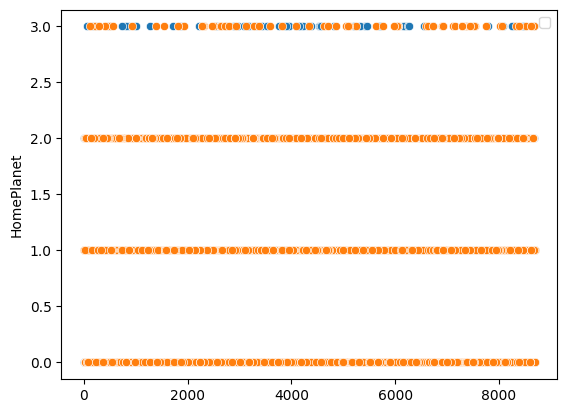

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CryoSleep


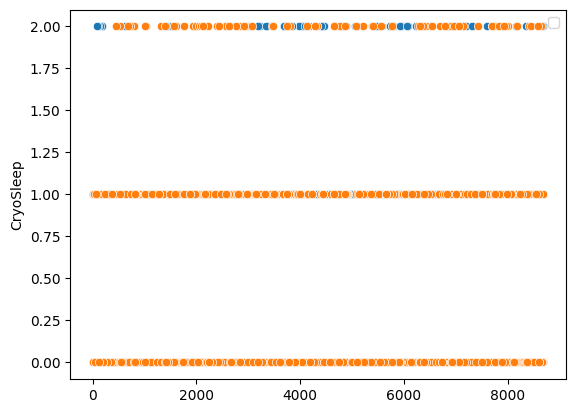

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Destination


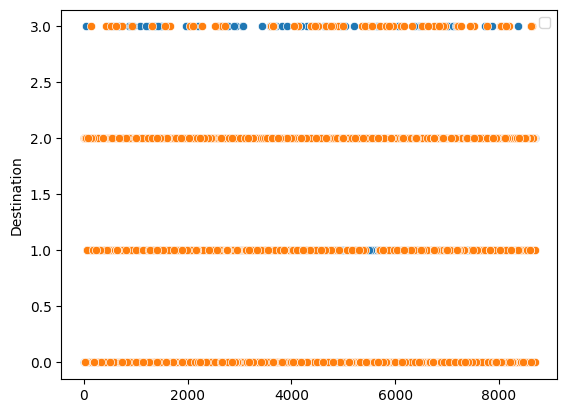

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Age


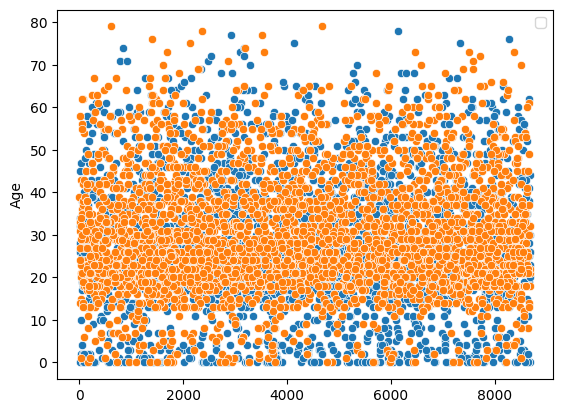

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


VIP


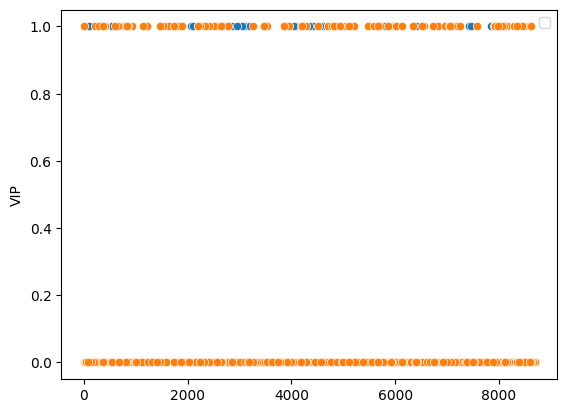

RoomService


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


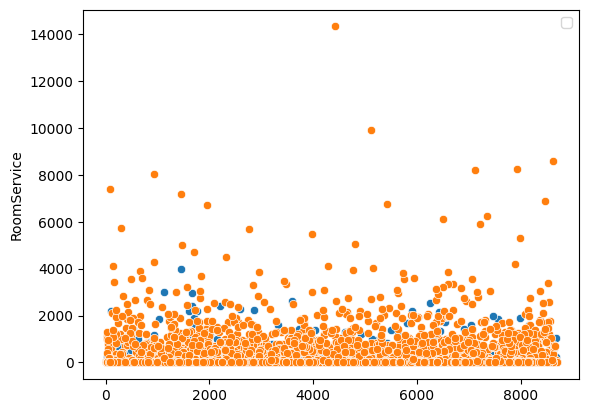

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FoodCourt


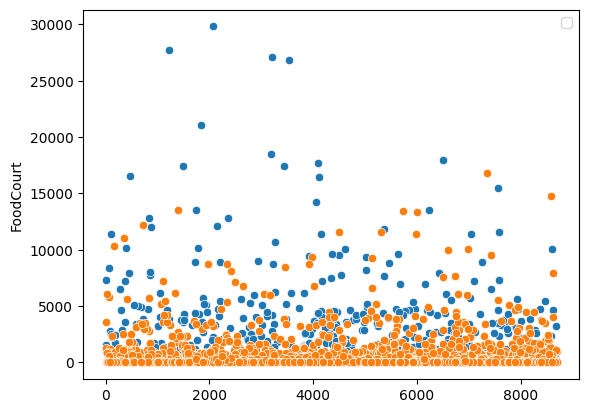

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ShoppingMall


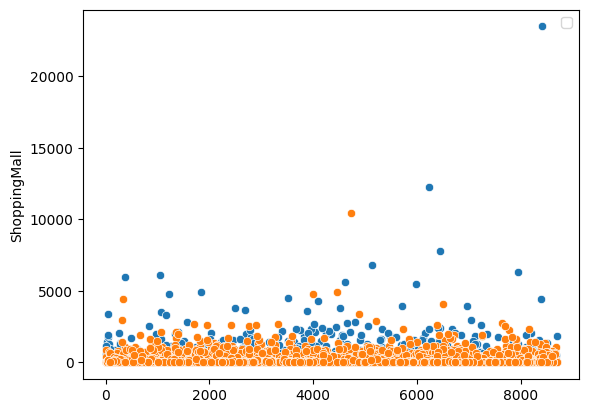

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Spa


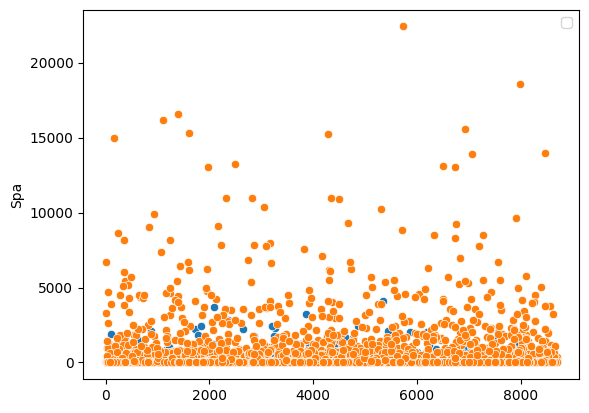

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


VRDeck


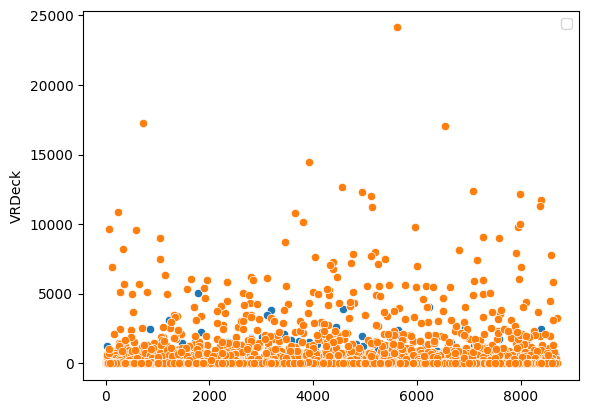

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Transported


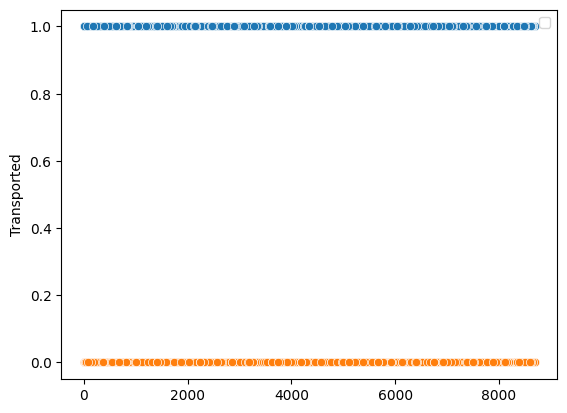

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


group


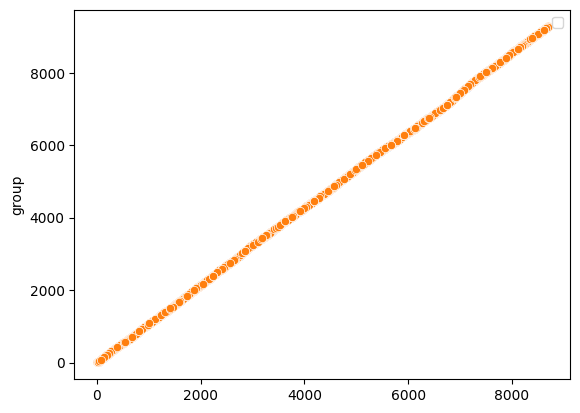

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


group_num


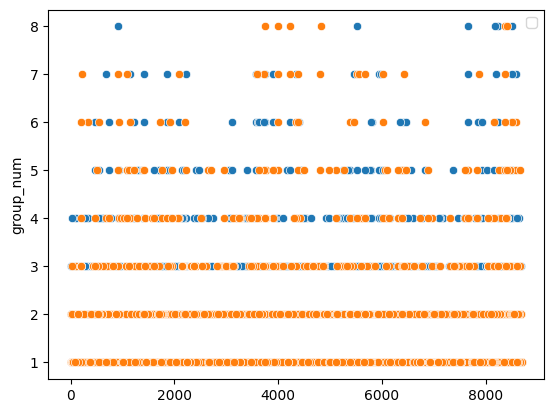

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cabin_deck


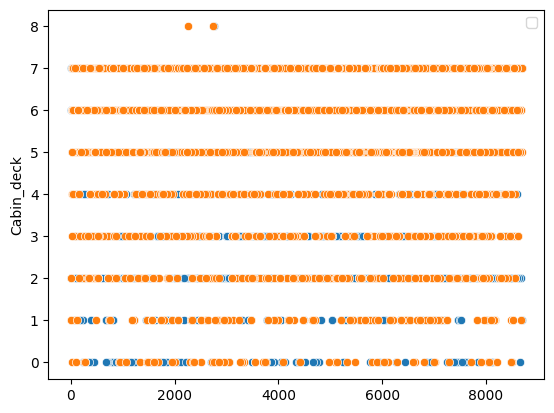

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cabin_num


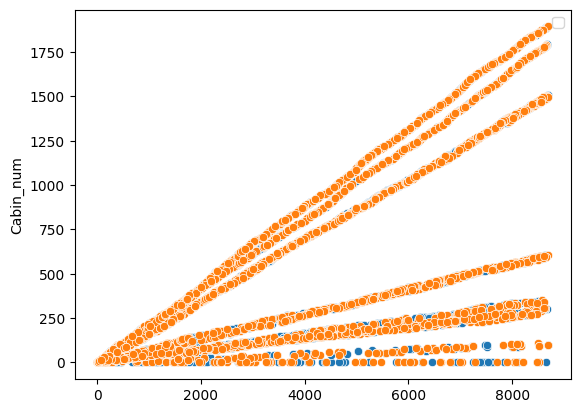

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cabin_side


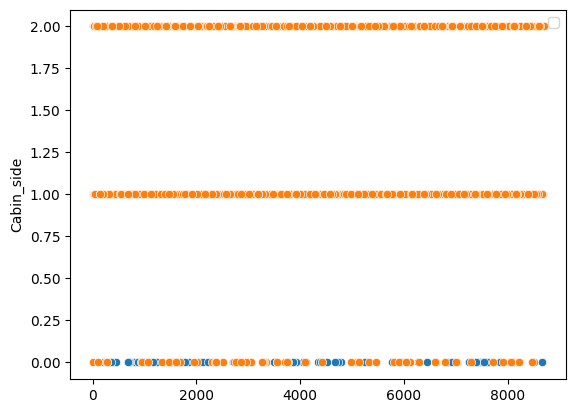

In [191]:
for i in train:
    print(i)
    grap1=train[train['Transported']==1]
    grap2=train[train['Transported']==0]
    sns.scatterplot(grap1[i])
    sns.scatterplot(grap2[i])
    plt.legend()
    plt.show()

<AxesSubplot: >

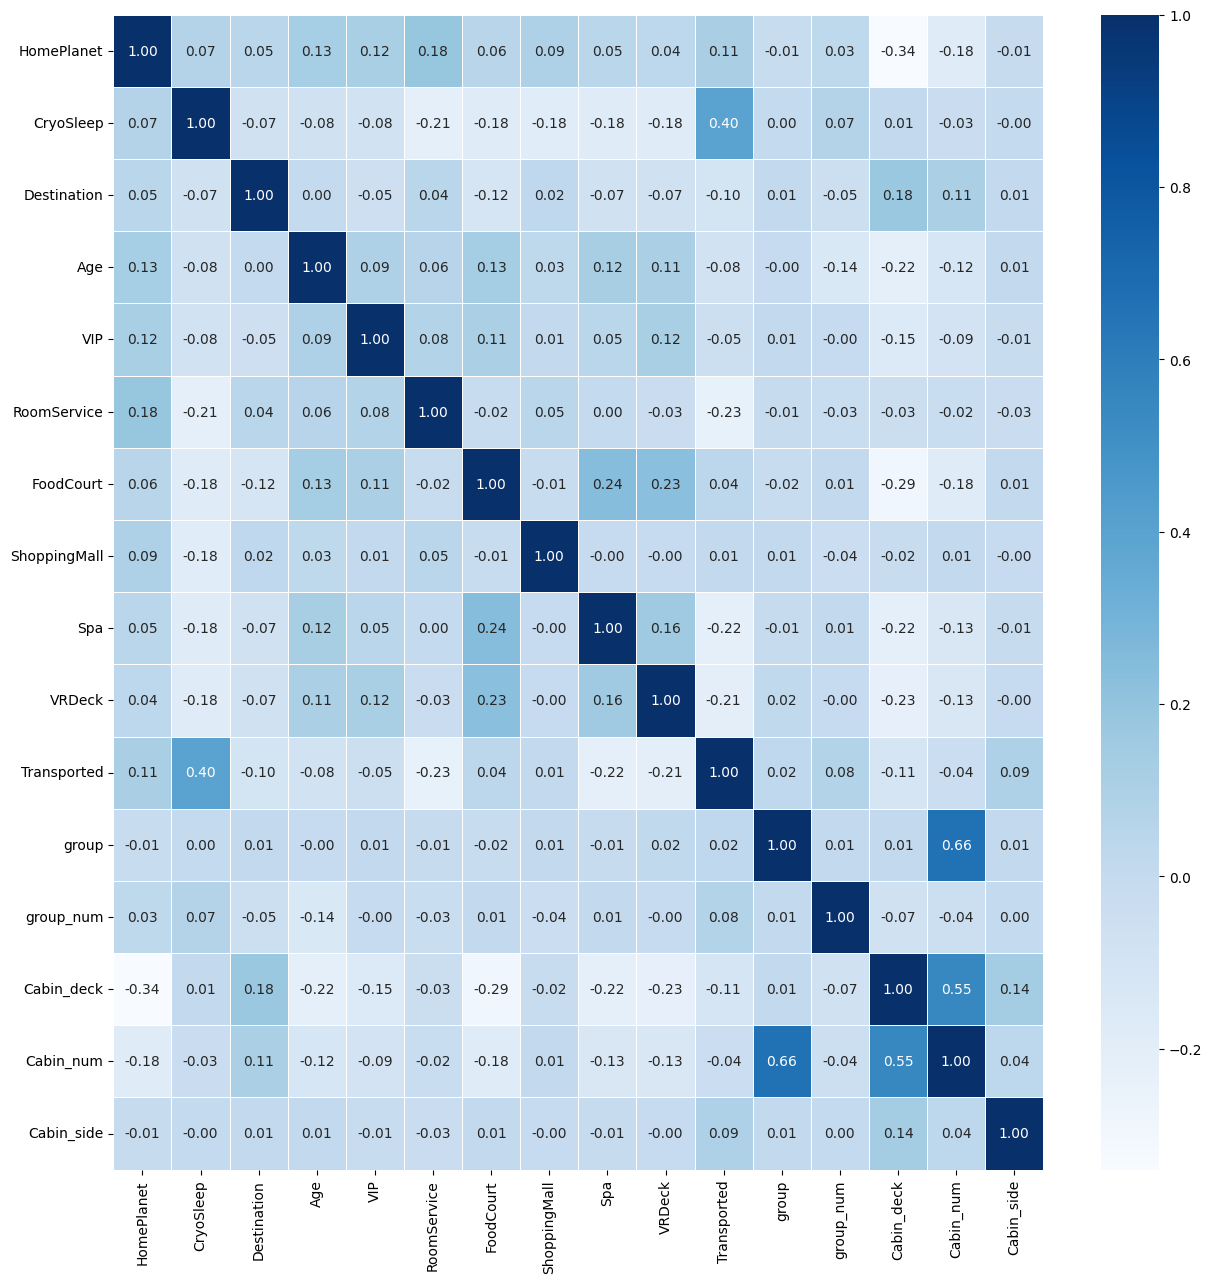

In [185]:

import matplotlib.pyplot as plt 
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# preprocessing

In [135]:
train=id_seperate(train)
test=id_seperate(test)

train=cabin_seperate(train)
test=cabin_seperate(test)


#train=name_seperate(train)
#test=name_seperate(test)

In [136]:
train=train.drop('PassengerId',axis=1)
test=test.drop('PassengerId',axis=1)

train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [137]:
train=labeling_code(train,'HomePlanet')
train=labeling_code(train,'Destination')
test=labeling_code(test,'HomePlanet')
test=labeling_code(test,'Destination')


In [138]:
train=labeling_code(train,'Cabin_deck')
test=labeling_code(test,'Cabin_deck')
train=labeling_code(train,'Cabin_side')
test=labeling_code(test,'Cabin_side')

# 결측치 처리


In [139]:
train=labeling_code(train,'CryoSleep')
test=labeling_code(test,'CryoSleep')
train['CryoSleep']=train['CryoSleep'].astype(float)
test['CryoSleep']=test['CryoSleep'].astype(float)

In [140]:
train['VIP']=train['VIP'].astype(float)
test['VIP']=test['VIP'].astype(float)

In [141]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP','CryoSleep']]=train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP','CryoSleep']].fillna(0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP','CryoSleep']]=test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP','CryoSleep']].fillna(0)



In [142]:
train['group']=train['group'].astype(int)
test['group']=test['group'].astype(int)
train['group_num']=train['group_num'].astype(int)
test['group_num']=test['group_num'].astype(int)
train['Cabin_num']=train['Cabin_num'].astype(int)
test['Cabin_num']=test['Cabin_num'].astype(int)




In [143]:
pd.get_dummies(train,columns=['Cabin_side'])
pd.get_dummies(test,columns=['Cabin_side'])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,group_num,Cabin_deck,Cabin_num,Cabin_side_0,Cabin_side_1,Cabin_side_2
0,0,1.0,2,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,13,1,7,3,0,0,1
1,0,0.0,2,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0,18,1,6,4,0,0,1
2,1,1.0,0,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,19,1,3,0,0,0,1
3,1,0.0,2,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0,21,1,3,1,0,0,1
4,0,0.0,2,20.000000,0.0,10.0,0.0,635.0,0.0,0.0,23,1,6,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1.0,2,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,9266,2,7,1496,0,0,1
4273,0,0.0,2,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,9269,1,0,0,1,0,0
4274,2,1.0,0,28.658146,0.0,0.0,0.0,0.0,0.0,0.0,9271,1,4,296,0,1,0
4275,1,0.0,3,28.658146,0.0,0.0,2680.0,0.0,0.0,523.0,9273,1,4,297,0,1,0


In [144]:
train['Transported']=train['Transported'].astype(int)

In [145]:
y=train['Transported']
x=train.drop('Transported',axis=1)


In [146]:
from xgboost import XGBClassifier
{'eta': 0.05, 'gamma': 0.55, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 200.0, 'subsample': 0.65}

{'colsample_bytree': 0.6000000000000001,
 'eta': 0.025,
 'gamma': 1.0,
 'max_depth': 5,
 'min_child_weight': 1.0,
 'n_estimators': 590.0,
 'subsample': 0.75}

In [180]:
model = XGBClassifier(colsample_bytree= 0.60, eta= 0.05, gamma= 0.55, max_depth= 5, min_child_weight=3.0, 
                      n_estimators= 200, subsample=0.65)
model.fit(x,y)
pred = model.predict(test)

In [181]:
#colsample_bytree= 0.65, eta= 0.125, gamma= 0.5, max_depth= 4, min_child_weight=1.0, n_estimators= 465, subsample=0.8
       

In [182]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [183]:

sub['Transported']=pred.astype(bool)

sub.to_csv('result.csv', index=False)


In [184]:

sub['Transported'].value_counts()
# 0.80313
#True     2210
#False    2067


#Score: 0.80804
#True     2221
#False    2056


#Score: 0.80430
#이름추가
#True     2207
#False    2070


#Score: 0.80687
#{'eta': 0.05, 'gamma': 0.55, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 200.0, 'subsample': 0.65}
#True     2186
#False    2091




True     2227
False    2050
Name: Transported, dtype: int64

In [152]:
# Data wrangling

import pandas as pd

# Scientific 

import numpy as np


# Machine learning

import xgboost as xgb
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

# Hyperparameters tuning

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Some constants

SEED = 314159265
VALID_SIZE = 0.3
TARGET = 'outcome'

def optimize(
             #trials, 
             random_state=SEED):
    """
    This is the optimization function that given a space (space here) of 
    hyperparameters and a scoring function (score here), finds the best hyperparameters.
    """
    # To learn more about XGBoost parameters, head to this page: 
    # https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=50)
    return best

def score(params):
    print("Training with params: ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(train_features, label=y_train)
    dvalid = xgb.DMatrix(valid_features, label=y_valid)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                          evals=watchlist,
                          verbose_eval=True)
    predictions = gbm_model.predict(dvalid,
                                    ntree_limit=gbm_model.best_iteration + 1)
    score = roc_auc_score(y_valid, predictions)
    # TODO: Add the importance for the selected features
    print("\tScore {0}\n\n".format(score))
    # The score function should return the loss (1-score)
    # since the optimize function looks for the minimum
    loss = 1 - score
    return {'loss': loss, 'status': STATUS_OK}


In [153]:
from sklearn.model_selection import train_test_split
hy_train_df=train.copy()

train, valid = train_test_split(hy_train_df, test_size=VALID_SIZE,
                                random_state=SEED)


y_train = train['Transported']
y_valid = valid['Transported']
train_features = train.drop('Transported',axis=1)
valid_features = valid.drop('Transported',axis=1)

In [154]:
best_hyperparams = optimize(
                            #trials
                            )
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.4, 'eval_metric': 'auc', 'gamma': 0.65, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 300.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.9500000000000001, 'tree_method': 'exact'}
[09:48:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.86155	train-auc:0.92183                                                 
[1]	eval-auc:0.87337	train-auc:0.93793                                                 
[2]	eval-auc

[83]	eval-auc:0.88885	train-auc:0.99985                                                
[84]	eval-auc:0.88870	train-auc:0.99985                                                
[85]	eval-auc:0.88909	train-auc:0.99986                                                
[86]	eval-auc:0.88891	train-auc:0.99989                                                
[87]	eval-auc:0.88891	train-auc:0.99989                                                
[88]	eval-auc:0.88901	train-auc:0.99989                                                
[89]	eval-auc:0.88915	train-auc:0.99990                                                
[90]	eval-auc:0.88905	train-auc:0.99991                                                
[91]	eval-auc:0.88918	train-auc:0.99992                                                
[92]	eval-auc:0.88915	train-auc:0.99992                                                
[93]	eval-auc:0.88883	train-auc:0.99992                                                
[94]	eval-auc:0.88883	train-auc:

[176]	eval-auc:0.88666	train-auc:0.99999                                               
[177]	eval-auc:0.88673	train-auc:0.99999                                               
[178]	eval-auc:0.88673	train-auc:0.99999                                               
[179]	eval-auc:0.88673	train-auc:0.99999                                               
[180]	eval-auc:0.88662	train-auc:0.99999                                               
[181]	eval-auc:0.88651	train-auc:0.99999                                               
[182]	eval-auc:0.88659	train-auc:0.99999                                               
[183]	eval-auc:0.88659	train-auc:0.99999                                               
[184]	eval-auc:0.88659	train-auc:0.99999                                               
[185]	eval-auc:0.88659	train-auc:0.99999                                               
[186]	eval-auc:0.88647	train-auc:0.99999                                               
[187]	eval-auc:0.88625	train-auc

[269]	eval-auc:0.88581	train-auc:1.00000                                               
[270]	eval-auc:0.88581	train-auc:1.00000                                               
[271]	eval-auc:0.88596	train-auc:0.99999                                               
[272]	eval-auc:0.88587	train-auc:0.99999                                               
[273]	eval-auc:0.88587	train-auc:0.99999                                               
[274]	eval-auc:0.88587	train-auc:0.99999                                               
[275]	eval-auc:0.88588	train-auc:1.00000                                               
[276]	eval-auc:0.88588	train-auc:1.00000                                               
[277]	eval-auc:0.88597	train-auc:1.00000                                               
[278]	eval-auc:0.88613	train-auc:1.00000                                               
[279]	eval-auc:0.88625	train-auc:1.00000                                               
[280]	eval-auc:0.88625	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[18]	eval-auc:0.89268	train-auc:0.90681                                                
[19]	eval-auc:0.89270	train-auc:0.90751                                                
[20]	eval-auc:0.89336	train-auc:0.90889                                                
[21]	eval-auc:0.89436	train-auc:0.90971                                                
[22]	eval-auc:0.89484	train-auc:0.91003                                                
[23]	eval-auc:0.89474	train-auc:0.91037                                                
[24]	eval-auc:0.89494	train-auc:0.91084                                                
[25]	eval-auc:0.89598	train-auc:0.91199                                                
[26]	eval-auc:0.89626	train-auc:0.91354                                                
[27]	eval-auc:0.89617	train-auc:0.91372                                                
[28]	eval-auc:0.89638	train-auc:0.91472                                                
[29]	eval-auc:0.89701	train-auc:

[111]	eval-auc:0.89320	train-auc:0.95162                                               
[112]	eval-auc:0.89342	train-auc:0.95167                                               
[113]	eval-auc:0.89317	train-auc:0.95180                                               
[114]	eval-auc:0.89281	train-auc:0.95236                                               
[115]	eval-auc:0.89319	train-auc:0.95271                                               
[116]	eval-auc:0.89314	train-auc:0.95288                                               
[117]	eval-auc:0.89304	train-auc:0.95288                                               
[118]	eval-auc:0.89320	train-auc:0.95278                                               
[119]	eval-auc:0.89343	train-auc:0.95289                                               
[120]	eval-auc:0.89320	train-auc:0.95301                                               
[121]	eval-auc:0.89325	train-auc:0.95350                                               
[122]	eval-auc:0.89325	train-auc

[204]	eval-auc:0.89124	train-auc:0.97004                                               
[205]	eval-auc:0.89074	train-auc:0.97053                                               
[206]	eval-auc:0.89023	train-auc:0.97077                                               
[207]	eval-auc:0.89023	train-auc:0.97100                                               
[208]	eval-auc:0.89042	train-auc:0.97099                                               
[209]	eval-auc:0.89026	train-auc:0.97122                                               
[210]	eval-auc:0.88995	train-auc:0.97136                                               
[211]	eval-auc:0.88956	train-auc:0.97162                                               
[212]	eval-auc:0.88952	train-auc:0.97164                                               
[213]	eval-auc:0.88916	train-auc:0.97209                                               
[214]	eval-auc:0.88911	train-auc:0.97236                                               
[215]	eval-auc:0.88918	train-auc

[297]	eval-auc:0.88801	train-auc:0.98114                                               
[298]	eval-auc:0.88750	train-auc:0.98143                                               
[299]	eval-auc:0.88757	train-auc:0.98165                                               
[300]	eval-auc:0.88741	train-auc:0.98174                                               
[301]	eval-auc:0.88752	train-auc:0.98161                                               
[302]	eval-auc:0.88743	train-auc:0.98167                                               
[303]	eval-auc:0.88709	train-auc:0.98159                                               
[304]	eval-auc:0.88732	train-auc:0.98176                                               
[305]	eval-auc:0.88742	train-auc:0.98190                                               
[306]	eval-auc:0.88759	train-auc:0.98204                                               
[307]	eval-auc:0.88742	train-auc:0.98216                                               
[308]	eval-auc:0.88746	train-auc

[390]	eval-auc:0.88434	train-auc:0.98700                                               
[391]	eval-auc:0.88426	train-auc:0.98712                                               
[392]	eval-auc:0.88432	train-auc:0.98723                                               
[393]	eval-auc:0.88361	train-auc:0.98731                                               
[394]	eval-auc:0.88348	train-auc:0.98735                                               
[395]	eval-auc:0.88324	train-auc:0.98748                                               
[396]	eval-auc:0.88328	train-auc:0.98752                                               
[397]	eval-auc:0.88340	train-auc:0.98753                                               
[398]	eval-auc:0.88336	train-auc:0.98765                                               
[399]	eval-auc:0.88354	train-auc:0.98770                                               
[400]	eval-auc:0.88386	train-auc:0.98795                                               
[401]	eval-auc:0.88376	train-auc

[483]	eval-auc:0.88284	train-auc:0.99150                                               
[484]	eval-auc:0.88273	train-auc:0.99152                                               
[485]	eval-auc:0.88277	train-auc:0.99156                                               
[486]	eval-auc:0.88263	train-auc:0.99169                                               
[487]	eval-auc:0.88262	train-auc:0.99164                                               
[488]	eval-auc:0.88252	train-auc:0.99168                                               
[489]	eval-auc:0.88257	train-auc:0.99176                                               
[490]	eval-auc:0.88249	train-auc:0.99177                                               
[491]	eval-auc:0.88226	train-auc:0.99190                                               
[492]	eval-auc:0.88240	train-auc:0.99191                                               
[493]	eval-auc:0.88210	train-auc:0.99205                                               
[494]	eval-auc:0.88237	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[13]	eval-auc:0.88776	train-auc:0.93281                                                
[14]	eval-auc:0.88894	train-auc:0.93442                                                
[15]	eval-auc:0.88930	train-auc:0.93653                                                
[16]	eval-auc:0.88993	train-auc:0.93912                                                
[17]	eval-auc:0.88964	train-auc:0.94110                                                
[18]	eval-auc:0.88912	train-auc:0.94214                                                
[19]	eval-auc:0.88992	train-auc:0.94290                                                
[20]	eval-auc:0.88941	train-auc:0.94376                                                
[21]	eval-auc:0.88894	train-auc:0.94486                                                
[22]	eval-auc:0.88860	train-auc:0.94610                                                
[23]	eval-auc:0.88781	train-auc:0.94682                                                
[24]	eval-auc:0.88769	train-auc:

[106]	eval-auc:0.87929	train-auc:0.98564                                               
[107]	eval-auc:0.87835	train-auc:0.98590                                               
[108]	eval-auc:0.87860	train-auc:0.98603                                               
[109]	eval-auc:0.87853	train-auc:0.98618                                               
[110]	eval-auc:0.87893	train-auc:0.98618                                               
[111]	eval-auc:0.87938	train-auc:0.98637                                               
[112]	eval-auc:0.87887	train-auc:0.98664                                               
[113]	eval-auc:0.87923	train-auc:0.98663                                               
[114]	eval-auc:0.87915	train-auc:0.98683                                               
[115]	eval-auc:0.87892	train-auc:0.98703                                               
[116]	eval-auc:0.87827	train-auc:0.98738                                               
[117]	eval-auc:0.87815	train-auc

[199]	eval-auc:0.87703	train-auc:0.99523                                               
[200]	eval-auc:0.87639	train-auc:0.99535                                               
[201]	eval-auc:0.87632	train-auc:0.99548                                               
[202]	eval-auc:0.87675	train-auc:0.99544                                               
[203]	eval-auc:0.87623	train-auc:0.99553                                               
[204]	eval-auc:0.87630	train-auc:0.99562                                               
[205]	eval-auc:0.87658	train-auc:0.99566                                               
[206]	eval-auc:0.87652	train-auc:0.99562                                               
[207]	eval-auc:0.87670	train-auc:0.99563                                               
[208]	eval-auc:0.87635	train-auc:0.99573                                               
[209]	eval-auc:0.87591	train-auc:0.99577                                               
[210]	eval-auc:0.87576	train-auc

[292]	eval-auc:0.87281	train-auc:0.99809                                               
[293]	eval-auc:0.87351	train-auc:0.99807                                               
[294]	eval-auc:0.87355	train-auc:0.99808                                               
[295]	eval-auc:0.87347	train-auc:0.99809                                               
[296]	eval-auc:0.87382	train-auc:0.99808                                               
[297]	eval-auc:0.87359	train-auc:0.99816                                               
[298]	eval-auc:0.87366	train-auc:0.99816                                               
[299]	eval-auc:0.87352	train-auc:0.99825                                               
[300]	eval-auc:0.87324	train-auc:0.99822                                               
[301]	eval-auc:0.87368	train-auc:0.99822                                               
[302]	eval-auc:0.87337	train-auc:0.99823                                               
[303]	eval-auc:0.87324	train-auc

[385]	eval-auc:0.87260	train-auc:0.99920                                               
[386]	eval-auc:0.87276	train-auc:0.99920                                               
[387]	eval-auc:0.87249	train-auc:0.99922                                               
[388]	eval-auc:0.87217	train-auc:0.99925                                               
[389]	eval-auc:0.87211	train-auc:0.99921                                               
[390]	eval-auc:0.87169	train-auc:0.99921                                               
[391]	eval-auc:0.87189	train-auc:0.99923                                               
[392]	eval-auc:0.87169	train-auc:0.99924                                               
[393]	eval-auc:0.87190	train-auc:0.99923                                               
[394]	eval-auc:0.87166	train-auc:0.99927                                               
[395]	eval-auc:0.87174	train-auc:0.99926                                               
[396]	eval-auc:0.87164	train-auc

[478]	eval-auc:0.87093	train-auc:0.99962                                               
[479]	eval-auc:0.87109	train-auc:0.99963                                               
[480]	eval-auc:0.87092	train-auc:0.99962                                               
[481]	eval-auc:0.87082	train-auc:0.99964                                               
[482]	eval-auc:0.87094	train-auc:0.99962                                               
[483]	eval-auc:0.87101	train-auc:0.99962                                               
[484]	eval-auc:0.87084	train-auc:0.99963                                               
[485]	eval-auc:0.87106	train-auc:0.99962                                               
[486]	eval-auc:0.87086	train-auc:0.99962                                               
[487]	eval-auc:0.87126	train-auc:0.99963                                               
[488]	eval-auc:0.87103	train-auc:0.99964                                               
[489]	eval-auc:0.87067	train-auc

[571]	eval-auc:0.87041	train-auc:0.99975                                               
[572]	eval-auc:0.87064	train-auc:0.99975                                               
[573]	eval-auc:0.87109	train-auc:0.99976                                               
[574]	eval-auc:0.87081	train-auc:0.99975                                               
[575]	eval-auc:0.87098	train-auc:0.99975                                               
[576]	eval-auc:0.87055	train-auc:0.99976                                               
[577]	eval-auc:0.87068	train-auc:0.99976                                               
[578]	eval-auc:0.87059	train-auc:0.99978                                               
[579]	eval-auc:0.87078	train-auc:0.99978                                               
[580]	eval-auc:0.87083	train-auc:0.99979                                               
[581]	eval-auc:0.87053	train-auc:0.99980                                               
[582]	eval-auc:0.87058	train-auc

[664]	eval-auc:0.87038	train-auc:0.99989                                               
[665]	eval-auc:0.87039	train-auc:0.99989                                               
[666]	eval-auc:0.87081	train-auc:0.99988                                               
[667]	eval-auc:0.87089	train-auc:0.99989                                               
[668]	eval-auc:0.87075	train-auc:0.99989                                               
[669]	eval-auc:0.87080	train-auc:0.99989                                               
[670]	eval-auc:0.87067	train-auc:0.99990                                               
[671]	eval-auc:0.87037	train-auc:0.99989                                               
[672]	eval-auc:0.87027	train-auc:0.99990                                               
[673]	eval-auc:0.87036	train-auc:0.99990                                               
[674]	eval-auc:0.87032	train-auc:0.99990                                               
[675]	eval-auc:0.87032	train-auc

[757]	eval-auc:0.86972	train-auc:0.99993                                               
[758]	eval-auc:0.86950	train-auc:0.99993                                               
[759]	eval-auc:0.86988	train-auc:0.99992                                               
[760]	eval-auc:0.86963	train-auc:0.99992                                               
[761]	eval-auc:0.86976	train-auc:0.99992                                               
[762]	eval-auc:0.87028	train-auc:0.99991                                               
[763]	eval-auc:0.87028	train-auc:0.99992                                               
[764]	eval-auc:0.87030	train-auc:0.99992                                               
[765]	eval-auc:0.87010	train-auc:0.99992                                               
[766]	eval-auc:0.87003	train-auc:0.99993                                               
[767]	eval-auc:0.87018	train-auc:0.99993                                               
[768]	eval-auc:0.86991	train-auc

[850]	eval-auc:0.86997	train-auc:0.99996                                               
[851]	eval-auc:0.87008	train-auc:0.99995                                               
[852]	eval-auc:0.87002	train-auc:0.99995                                               
[853]	eval-auc:0.86996	train-auc:0.99996                                               
[854]	eval-auc:0.87008	train-auc:0.99996                                               
[855]	eval-auc:0.87012	train-auc:0.99996                                               
[856]	eval-auc:0.87001	train-auc:0.99996                                               
[857]	eval-auc:0.87005	train-auc:0.99996                                               
[858]	eval-auc:0.87018	train-auc:0.99996                                               
[859]	eval-auc:0.87016	train-auc:0.99996                                               
[860]	eval-auc:0.87028	train-auc:0.99996                                               
[861]	eval-auc:0.87028	train-auc

[943]	eval-auc:0.86999	train-auc:0.99997                                               
[944]	eval-auc:0.87009	train-auc:0.99996                                               
[945]	eval-auc:0.87002	train-auc:0.99997                                               
[946]	eval-auc:0.87002	train-auc:0.99997                                               
[947]	eval-auc:0.87029	train-auc:0.99997                                               
[948]	eval-auc:0.87045	train-auc:0.99997                                               
[949]	eval-auc:0.87021	train-auc:0.99997                                               
[950]	eval-auc:0.86995	train-auc:0.99997                                               
[951]	eval-auc:0.86973	train-auc:0.99997                                               
[952]	eval-auc:0.86985	train-auc:0.99997                                               
[953]	eval-auc:0.86985	train-auc:0.99997                                               
[954]	eval-auc:0.86986	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[15]	eval-auc:0.88607	train-auc:0.89334
[16]	eval-auc:0.88657	train-auc:0.89427                                                
[17]	eval-auc:0.88871	train-auc:0.89681                                                
[18]	eval-auc:0.88972	train-auc:0.89813                                                
[19]	eval-auc:0.89041	train-auc:0.89830                                                
[20]	eval-auc:0.89070	train-auc:0.89910                                                
[21]	eval-auc:0.89056	train-auc:0.89921                                                
[22]	eval-auc:0.89125	train-auc:0.89987                                                
[23]	eval-auc:0.89184	train-auc:0.90086                                                
[24]	eval-auc:0.89324	train-auc:0.90248                                                
[25]	eval-auc:0.89378	train-auc:0.90338                                                
[26]	eval-auc:0.89370	train-auc:0.90373                                         

[108]	eval-auc:0.89834	train-auc:0.93414                                               
[109]	eval-auc:0.89861	train-auc:0.93437                                               
[110]	eval-auc:0.89844	train-auc:0.93445                                               
[111]	eval-auc:0.89849	train-auc:0.93487                                               
[112]	eval-auc:0.89879	train-auc:0.93508                                               
[113]	eval-auc:0.89878	train-auc:0.93506                                               
[114]	eval-auc:0.89879	train-auc:0.93527                                               
[115]	eval-auc:0.89857	train-auc:0.93575                                               
[116]	eval-auc:0.89850	train-auc:0.93625                                               
[117]	eval-auc:0.89856	train-auc:0.93638                                               
[118]	eval-auc:0.89860	train-auc:0.93657                                               
[119]	eval-auc:0.89879	train-auc

[201]	eval-auc:0.89846	train-auc:0.95405                                               
[202]	eval-auc:0.89829	train-auc:0.95420                                               
[203]	eval-auc:0.89813	train-auc:0.95465                                               
[204]	eval-auc:0.89822	train-auc:0.95470                                               
[205]	eval-auc:0.89835	train-auc:0.95486                                               
[206]	eval-auc:0.89847	train-auc:0.95495                                               
[207]	eval-auc:0.89857	train-auc:0.95522                                               
[208]	eval-auc:0.89854	train-auc:0.95534                                               
[209]	eval-auc:0.89837	train-auc:0.95571                                               
[210]	eval-auc:0.89835	train-auc:0.95575                                               
[211]	eval-auc:0.89821	train-auc:0.95598                                               
[212]	eval-auc:0.89822	train-auc

[294]	eval-auc:0.89781	train-auc:0.96593                                               
[295]	eval-auc:0.89786	train-auc:0.96608                                               
[296]	eval-auc:0.89776	train-auc:0.96616                                               
[297]	eval-auc:0.89793	train-auc:0.96634                                               
[298]	eval-auc:0.89795	train-auc:0.96654                                               
[299]	eval-auc:0.89795	train-auc:0.96660                                               
	Score 0.8979511572358125                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.47500000000000003, 'eval_metric': 'auc', 'gamma': 1.0, 'max_depth': 4, 'min_child_weight': 4.0, 'n_estimators': 900.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.8500000000000001, 'tree_method': 'exact'}
[09:48:40

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[19]	eval-auc:0.89579	train-auc:0.92253                                                
[20]	eval-auc:0.89530	train-auc:0.92346                                                
[21]	eval-auc:0.89560	train-auc:0.92383                                                
[22]	eval-auc:0.89545	train-auc:0.92436                                                
[23]	eval-auc:0.89643	train-auc:0.92573                                                
[24]	eval-auc:0.89670	train-auc:0.92732                                                
[25]	eval-auc:0.89804	train-auc:0.92873                                                
[26]	eval-auc:0.89788	train-auc:0.92921                                                
[27]	eval-auc:0.89792	train-auc:0.92970                                                
[28]	eval-auc:0.89811	train-auc:0.93011                                                
[29]	eval-auc:0.89837	train-auc:0.93098                                                
[30]	eval-auc:0.89841	train-auc:

[112]	eval-auc:0.89128	train-auc:0.97255                                               
[113]	eval-auc:0.89122	train-auc:0.97285                                               
[114]	eval-auc:0.89122	train-auc:0.97304                                               
[115]	eval-auc:0.89121	train-auc:0.97329                                               
[116]	eval-auc:0.89075	train-auc:0.97403                                               
[117]	eval-auc:0.89087	train-auc:0.97384                                               
[118]	eval-auc:0.88993	train-auc:0.97439                                               
[119]	eval-auc:0.88991	train-auc:0.97455                                               
[120]	eval-auc:0.88985	train-auc:0.97487                                               
[121]	eval-auc:0.88990	train-auc:0.97503                                               
[122]	eval-auc:0.88978	train-auc:0.97546                                               
[123]	eval-auc:0.88937	train-auc

[205]	eval-auc:0.88510	train-auc:0.98766                                               
[206]	eval-auc:0.88463	train-auc:0.98789                                               
[207]	eval-auc:0.88443	train-auc:0.98793                                               
[208]	eval-auc:0.88481	train-auc:0.98794                                               
[209]	eval-auc:0.88462	train-auc:0.98800                                               
[210]	eval-auc:0.88412	train-auc:0.98815                                               
[211]	eval-auc:0.88440	train-auc:0.98822                                               
[212]	eval-auc:0.88444	train-auc:0.98838                                               
[213]	eval-auc:0.88401	train-auc:0.98863                                               
[214]	eval-auc:0.88450	train-auc:0.98878                                               
[215]	eval-auc:0.88429	train-auc:0.98875                                               
[216]	eval-auc:0.88466	train-auc

[298]	eval-auc:0.88298	train-auc:0.99328                                               
[299]	eval-auc:0.88289	train-auc:0.99326                                               
[300]	eval-auc:0.88288	train-auc:0.99328                                               
[301]	eval-auc:0.88236	train-auc:0.99337                                               
[302]	eval-auc:0.88236	train-auc:0.99342                                               
[303]	eval-auc:0.88235	train-auc:0.99344                                               
[304]	eval-auc:0.88229	train-auc:0.99352                                               
[305]	eval-auc:0.88205	train-auc:0.99355                                               
[306]	eval-auc:0.88198	train-auc:0.99357                                               
[307]	eval-auc:0.88207	train-auc:0.99365                                               
[308]	eval-auc:0.88193	train-auc:0.99364                                               
[309]	eval-auc:0.88187	train-auc

[391]	eval-auc:0.87959	train-auc:0.99562                                               
[392]	eval-auc:0.87965	train-auc:0.99560                                               
[393]	eval-auc:0.87965	train-auc:0.99560                                               
[394]	eval-auc:0.87975	train-auc:0.99563                                               
[395]	eval-auc:0.87945	train-auc:0.99565                                               
[396]	eval-auc:0.87947	train-auc:0.99565                                               
[397]	eval-auc:0.87888	train-auc:0.99576                                               
[398]	eval-auc:0.87901	train-auc:0.99574                                               
[399]	eval-auc:0.87919	train-auc:0.99578                                               
[400]	eval-auc:0.87918	train-auc:0.99575                                               
[401]	eval-auc:0.87912	train-auc:0.99582                                               
[402]	eval-auc:0.87933	train-auc

[484]	eval-auc:0.87794	train-auc:0.99710                                               
[485]	eval-auc:0.87794	train-auc:0.99710                                               
[486]	eval-auc:0.87790	train-auc:0.99715                                               
[487]	eval-auc:0.87834	train-auc:0.99715                                               
[488]	eval-auc:0.87854	train-auc:0.99715                                               
[489]	eval-auc:0.87836	train-auc:0.99713                                               
[490]	eval-auc:0.87841	train-auc:0.99708                                               
[491]	eval-auc:0.87847	train-auc:0.99712                                               
[492]	eval-auc:0.87845	train-auc:0.99714                                               
[493]	eval-auc:0.87845	train-auc:0.99714                                               
[494]	eval-auc:0.87868	train-auc:0.99710                                               
[495]	eval-auc:0.87861	train-auc

[577]	eval-auc:0.87790	train-auc:0.99777                                               
[578]	eval-auc:0.87784	train-auc:0.99779                                               
[579]	eval-auc:0.87784	train-auc:0.99779                                               
[580]	eval-auc:0.87787	train-auc:0.99781                                               
[581]	eval-auc:0.87782	train-auc:0.99779                                               
[582]	eval-auc:0.87782	train-auc:0.99779                                               
[583]	eval-auc:0.87788	train-auc:0.99779                                               
[584]	eval-auc:0.87781	train-auc:0.99779                                               
[585]	eval-auc:0.87774	train-auc:0.99782                                               
[586]	eval-auc:0.87784	train-auc:0.99784                                               
[587]	eval-auc:0.87734	train-auc:0.99791                                               
[588]	eval-auc:0.87753	train-auc

[670]	eval-auc:0.87787	train-auc:0.99841                                               
[671]	eval-auc:0.87787	train-auc:0.99841                                               
[672]	eval-auc:0.87807	train-auc:0.99840                                               
[673]	eval-auc:0.87807	train-auc:0.99839                                               
[674]	eval-auc:0.87801	train-auc:0.99841                                               
[675]	eval-auc:0.87801	train-auc:0.99841                                               
[676]	eval-auc:0.87787	train-auc:0.99841                                               
[677]	eval-auc:0.87749	train-auc:0.99843                                               
[678]	eval-auc:0.87749	train-auc:0.99843                                               
[679]	eval-auc:0.87751	train-auc:0.99849                                               
[680]	eval-auc:0.87768	train-auc:0.99848                                               
[681]	eval-auc:0.87746	train-auc

[763]	eval-auc:0.87784	train-auc:0.99873                                               
[764]	eval-auc:0.87784	train-auc:0.99873                                               
[765]	eval-auc:0.87784	train-auc:0.99873                                               
[766]	eval-auc:0.87796	train-auc:0.99874                                               
[767]	eval-auc:0.87796	train-auc:0.99874                                               
[768]	eval-auc:0.87796	train-auc:0.99874                                               
[769]	eval-auc:0.87803	train-auc:0.99875                                               
[770]	eval-auc:0.87792	train-auc:0.99875                                               
[771]	eval-auc:0.87792	train-auc:0.99875                                               
[772]	eval-auc:0.87792	train-auc:0.99875                                               
[773]	eval-auc:0.87765	train-auc:0.99877                                               
[774]	eval-auc:0.87765	train-auc

[856]	eval-auc:0.87712	train-auc:0.99890                                               
[857]	eval-auc:0.87712	train-auc:0.99890                                               
[858]	eval-auc:0.87712	train-auc:0.99890                                               
[859]	eval-auc:0.87724	train-auc:0.99893                                               
[860]	eval-auc:0.87724	train-auc:0.99893                                               
[861]	eval-auc:0.87721	train-auc:0.99893                                               
[862]	eval-auc:0.87755	train-auc:0.99890                                               
[863]	eval-auc:0.87759	train-auc:0.99891                                               
[864]	eval-auc:0.87759	train-auc:0.99891                                               
[865]	eval-auc:0.87759	train-auc:0.99891                                               
[866]	eval-auc:0.87759	train-auc:0.99891                                               
[867]	eval-auc:0.87753	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[19]	eval-auc:0.89171	train-auc:0.89999                                                
[20]	eval-auc:0.89179	train-auc:0.90040                                                
[21]	eval-auc:0.89198	train-auc:0.90068                                                
[22]	eval-auc:0.89285	train-auc:0.90135                                                
[23]	eval-auc:0.89267	train-auc:0.90183                                                
[24]	eval-auc:0.89382	train-auc:0.90300                                                
[25]	eval-auc:0.89374	train-auc:0.90347                                                
[26]	eval-auc:0.89387	train-auc:0.90398                                                
[27]	eval-auc:0.89450	train-auc:0.90446                                                
[28]	eval-auc:0.89492	train-auc:0.90499                                                
[29]	eval-auc:0.89487	train-auc:0.90552                                                
[30]	eval-auc:0.89501	train-auc:

[112]	eval-auc:0.90011	train-auc:0.93814                                               
[113]	eval-auc:0.90012	train-auc:0.93812                                               
[114]	eval-auc:0.89999	train-auc:0.93824                                               
[115]	eval-auc:0.89983	train-auc:0.93869                                               
[116]	eval-auc:0.89988	train-auc:0.93929                                               
[117]	eval-auc:0.89992	train-auc:0.93936                                               
[118]	eval-auc:0.89970	train-auc:0.93948                                               
[119]	eval-auc:0.89991	train-auc:0.93965                                               
[120]	eval-auc:0.89964	train-auc:0.94015                                               
[121]	eval-auc:0.89961	train-auc:0.94045                                               
[122]	eval-auc:0.89929	train-auc:0.94096                                               
[123]	eval-auc:0.89943	train-auc

[205]	eval-auc:0.89561	train-auc:0.95748                                               
[206]	eval-auc:0.89575	train-auc:0.95786                                               
[207]	eval-auc:0.89571	train-auc:0.95807                                               
[208]	eval-auc:0.89592	train-auc:0.95835                                               
[209]	eval-auc:0.89573	train-auc:0.95858                                               
[210]	eval-auc:0.89578	train-auc:0.95886                                               
[211]	eval-auc:0.89587	train-auc:0.95899                                               
[212]	eval-auc:0.89618	train-auc:0.95907                                               
[213]	eval-auc:0.89595	train-auc:0.95926                                               
[214]	eval-auc:0.89599	train-auc:0.95949                                               
[215]	eval-auc:0.89581	train-auc:0.95955                                               
[216]	eval-auc:0.89567	train-auc

[298]	eval-auc:0.89528	train-auc:0.97045                                               
[299]	eval-auc:0.89526	train-auc:0.97052                                               
	Score 0.8952563333215668                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.1, 'eval_metric': 'auc', 'gamma': 0.5, 'max_depth': 8, 'min_child_weight': 3.0, 'n_estimators': 300.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.9500000000000001, 'tree_method': 'exact'}
[09:48:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getti

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[13]	eval-auc:0.88990	train-auc:0.93218                                                
[14]	eval-auc:0.89046	train-auc:0.93307                                                
[15]	eval-auc:0.89081	train-auc:0.93381                                                
[16]	eval-auc:0.89154	train-auc:0.93583                                                
[17]	eval-auc:0.89192	train-auc:0.93684                                                
[18]	eval-auc:0.89215	train-auc:0.93703                                                
[19]	eval-auc:0.89222	train-auc:0.93760                                                
[20]	eval-auc:0.89320	train-auc:0.93906                                                
[21]	eval-auc:0.89384	train-auc:0.94006                                                
[22]	eval-auc:0.89425	train-auc:0.94047                                                
[23]	eval-auc:0.89467	train-auc:0.94233                                                
[24]	eval-auc:0.89522	train-auc:

[106]	eval-auc:0.89940	train-auc:0.97889                                               
[107]	eval-auc:0.89924	train-auc:0.97904                                               
[108]	eval-auc:0.89920	train-auc:0.97913                                               
[109]	eval-auc:0.89916	train-auc:0.97937                                               
[110]	eval-auc:0.89895	train-auc:0.97969                                               
[111]	eval-auc:0.89893	train-auc:0.97997                                               
[112]	eval-auc:0.89888	train-auc:0.98012                                               
[113]	eval-auc:0.89872	train-auc:0.98036                                               
[114]	eval-auc:0.89853	train-auc:0.98062                                               
[115]	eval-auc:0.89859	train-auc:0.98074                                               
[116]	eval-auc:0.89855	train-auc:0.98092                                               
[117]	eval-auc:0.89843	train-auc

[199]	eval-auc:0.89733	train-auc:0.99148                                               
[200]	eval-auc:0.89719	train-auc:0.99167                                               
[201]	eval-auc:0.89716	train-auc:0.99178                                               
[202]	eval-auc:0.89717	train-auc:0.99186                                               
[203]	eval-auc:0.89719	train-auc:0.99186                                               
[204]	eval-auc:0.89719	train-auc:0.99190                                               
[205]	eval-auc:0.89716	train-auc:0.99194                                               
[206]	eval-auc:0.89703	train-auc:0.99202                                               
[207]	eval-auc:0.89690	train-auc:0.99212                                               
[208]	eval-auc:0.89690	train-auc:0.99218                                               
[209]	eval-auc:0.89678	train-auc:0.99229                                               
[210]	eval-auc:0.89668	train-auc

[292]	eval-auc:0.89534	train-auc:0.99586                                               
[293]	eval-auc:0.89535	train-auc:0.99591                                               
[294]	eval-auc:0.89529	train-auc:0.99595                                               
[295]	eval-auc:0.89541	train-auc:0.99597                                               
[296]	eval-auc:0.89534	train-auc:0.99599                                               
[297]	eval-auc:0.89546	train-auc:0.99598                                               
[298]	eval-auc:0.89537	train-auc:0.99604                                               
[299]	eval-auc:0.89538	train-auc:0.99604                                               
	Score 0.8953795874663184                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.15000000000000002, 'eval_metric': 'auc', 'gamma': 0.9500000000000001, 'max_depth': 6, '

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[15]	eval-auc:0.89349	train-auc:0.92414
[16]	eval-auc:0.89433	train-auc:0.92649                                                
[17]	eval-auc:0.89479	train-auc:0.92813                                                
[18]	eval-auc:0.89511	train-auc:0.92927                                                
[19]	eval-auc:0.89523	train-auc:0.92999                                                
[20]	eval-auc:0.89570	train-auc:0.93179                                                
[21]	eval-auc:0.89586	train-auc:0.93181                                                
[22]	eval-auc:0.89653	train-auc:0.93362                                                
[23]	eval-auc:0.89716	train-auc:0.93502                                                
[24]	eval-auc:0.89764	train-auc:0.93563                                                
[25]	eval-auc:0.89808	train-auc:0.93664                                                
[26]	eval-auc:0.89788	train-auc:0.93704                                         

[108]	eval-auc:0.89906	train-auc:0.97574                                               
[109]	eval-auc:0.89835	train-auc:0.97607                                               
[110]	eval-auc:0.89832	train-auc:0.97616                                               
[111]	eval-auc:0.89841	train-auc:0.97641                                               
[112]	eval-auc:0.89827	train-auc:0.97659                                               
[113]	eval-auc:0.89821	train-auc:0.97696                                               
[114]	eval-auc:0.89822	train-auc:0.97720                                               
[115]	eval-auc:0.89798	train-auc:0.97737                                               
[116]	eval-auc:0.89774	train-auc:0.97768                                               
[117]	eval-auc:0.89803	train-auc:0.97815                                               
[118]	eval-auc:0.89795	train-auc:0.97833                                               
[119]	eval-auc:0.89795	train-auc

[201]	eval-auc:0.89366	train-auc:0.99130                                               
[202]	eval-auc:0.89363	train-auc:0.99136                                               
[203]	eval-auc:0.89356	train-auc:0.99143                                               
[204]	eval-auc:0.89373	train-auc:0.99145                                               
[205]	eval-auc:0.89354	train-auc:0.99155                                               
[206]	eval-auc:0.89361	train-auc:0.99161                                               
[207]	eval-auc:0.89363	train-auc:0.99170                                               
[208]	eval-auc:0.89361	train-auc:0.99175                                               
[209]	eval-auc:0.89351	train-auc:0.99189                                               
[210]	eval-auc:0.89311	train-auc:0.99204                                               
[211]	eval-auc:0.89305	train-auc:0.99201                                               
[212]	eval-auc:0.89296	train-auc

[294]	eval-auc:0.89165	train-auc:0.99582                                               
[295]	eval-auc:0.89177	train-auc:0.99584                                               
[296]	eval-auc:0.89185	train-auc:0.99588                                               
[297]	eval-auc:0.89167	train-auc:0.99594                                               
[298]	eval-auc:0.89169	train-auc:0.99597                                               
[299]	eval-auc:0.89152	train-auc:0.99598                                               
[300]	eval-auc:0.89120	train-auc:0.99603                                               
[301]	eval-auc:0.89120	train-auc:0.99609                                               
[302]	eval-auc:0.89121	train-auc:0.99610                                               
[303]	eval-auc:0.89117	train-auc:0.99614                                               
[304]	eval-auc:0.89117	train-auc:0.99616                                               
[305]	eval-auc:0.89122	train-auc

[387]	eval-auc:0.89002	train-auc:0.99770                                               
[388]	eval-auc:0.89000	train-auc:0.99772                                               
[389]	eval-auc:0.88996	train-auc:0.99772                                               
[390]	eval-auc:0.88997	train-auc:0.99772                                               
[391]	eval-auc:0.88998	train-auc:0.99773                                               
[392]	eval-auc:0.88983	train-auc:0.99773                                               
[393]	eval-auc:0.88978	train-auc:0.99775                                               
[394]	eval-auc:0.88961	train-auc:0.99777                                               
[395]	eval-auc:0.88962	train-auc:0.99777                                               
[396]	eval-auc:0.88954	train-auc:0.99777                                               
[397]	eval-auc:0.88949	train-auc:0.99781                                               
[398]	eval-auc:0.88952	train-auc

[480]	eval-auc:0.88946	train-auc:0.99858                                               
[481]	eval-auc:0.88961	train-auc:0.99859                                               
[482]	eval-auc:0.88972	train-auc:0.99859                                               
[483]	eval-auc:0.88969	train-auc:0.99860                                               
[484]	eval-auc:0.88960	train-auc:0.99860                                               
[485]	eval-auc:0.88968	train-auc:0.99862                                               
[486]	eval-auc:0.88968	train-auc:0.99863                                               
[487]	eval-auc:0.88953	train-auc:0.99863                                               
[488]	eval-auc:0.88953	train-auc:0.99863                                               
[489]	eval-auc:0.88953	train-auc:0.99863                                               
[490]	eval-auc:0.88951	train-auc:0.99863                                               
[491]	eval-auc:0.88947	train-auc

[573]	eval-auc:0.88935	train-auc:0.99902                                               
[574]	eval-auc:0.88935	train-auc:0.99904                                               
[575]	eval-auc:0.88935	train-auc:0.99904                                               
[576]	eval-auc:0.88936	train-auc:0.99904                                               
[577]	eval-auc:0.88938	train-auc:0.99904                                               
[578]	eval-auc:0.88924	train-auc:0.99906                                               
[579]	eval-auc:0.88925	train-auc:0.99906                                               
[580]	eval-auc:0.88925	train-auc:0.99906                                               
[581]	eval-auc:0.88926	train-auc:0.99907                                               
[582]	eval-auc:0.88936	train-auc:0.99906                                               
[583]	eval-auc:0.88933	train-auc:0.99907                                               
[584]	eval-auc:0.88923	train-auc

[666]	eval-auc:0.88894	train-auc:0.99923                                               
[667]	eval-auc:0.88895	train-auc:0.99925                                               
[668]	eval-auc:0.88888	train-auc:0.99927                                               
[669]	eval-auc:0.88888	train-auc:0.99927                                               
[670]	eval-auc:0.88888	train-auc:0.99927                                               
[671]	eval-auc:0.88888	train-auc:0.99927                                               
[672]	eval-auc:0.88888	train-auc:0.99927                                               
[673]	eval-auc:0.88888	train-auc:0.99927                                               
[674]	eval-auc:0.88905	train-auc:0.99927                                               
[675]	eval-auc:0.88904	train-auc:0.99927                                               
[676]	eval-auc:0.88907	train-auc:0.99927                                               
[677]	eval-auc:0.88907	train-auc

[759]	eval-auc:0.88820	train-auc:0.99949                                               
[760]	eval-auc:0.88817	train-auc:0.99949                                               
[761]	eval-auc:0.88809	train-auc:0.99949                                               
[762]	eval-auc:0.88805	train-auc:0.99949                                               
[763]	eval-auc:0.88804	train-auc:0.99950                                               
[764]	eval-auc:0.88804	train-auc:0.99950                                               
[765]	eval-auc:0.88804	train-auc:0.99950                                               
[766]	eval-auc:0.88796	train-auc:0.99950                                               
[767]	eval-auc:0.88796	train-auc:0.99950                                               
[768]	eval-auc:0.88802	train-auc:0.99951                                               
[769]	eval-auc:0.88803	train-auc:0.99951                                               
[770]	eval-auc:0.88803	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88679	train-auc:0.92302                                                
[12]	eval-auc:0.88679	train-auc:0.92295                                                
[13]	eval-auc:0.88688	train-auc:0.92351                                                
[14]	eval-auc:0.88683	train-auc:0.92422                                                
[15]	eval-auc:0.88683	train-auc:0.92469                                                
[16]	eval-auc:0.88725	train-auc:0.92565                                                
[17]	eval-auc:0.88719	train-auc:0.92615                                                
[18]	eval-auc:0.88781	train-auc:0.92636                                                
[19]	eval-auc:0.88775	train-auc:0.92693                                                
[20]	eval-auc:0.88786	train-auc:0.92773                                                
[21]	eval-auc:0.88808	train-auc:0.92790                                                
[22]	eval-auc:0.88866	train-auc:

[104]	eval-auc:0.89667	train-auc:0.95319                                               
[105]	eval-auc:0.89665	train-auc:0.95344                                               
[106]	eval-auc:0.89682	train-auc:0.95361                                               
[107]	eval-auc:0.89704	train-auc:0.95395                                               
[108]	eval-auc:0.89714	train-auc:0.95432                                               
[109]	eval-auc:0.89720	train-auc:0.95461                                               
[110]	eval-auc:0.89729	train-auc:0.95465                                               
[111]	eval-auc:0.89741	train-auc:0.95486                                               
[112]	eval-auc:0.89747	train-auc:0.95509                                               
[113]	eval-auc:0.89757	train-auc:0.95532                                               
[114]	eval-auc:0.89757	train-auc:0.95559                                               
[115]	eval-auc:0.89764	train-auc

[197]	eval-auc:0.90035	train-auc:0.96646                                               
[198]	eval-auc:0.90030	train-auc:0.96654                                               
[199]	eval-auc:0.90033	train-auc:0.96672                                               
	Score 0.9003291679903985                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.125, 'eval_metric': 'auc', 'gamma': 0.65, 'max_depth': 12, 'min_child_weight': 4.0, 'n_estimators': 300.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.7000000000000001, 'tree_method': 'exact'}
[09:49:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bei

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.88591	train-auc:0.93768                                                
[11]	eval-auc:0.88723	train-auc:0.93971                                                
[12]	eval-auc:0.88851	train-auc:0.94140                                                
[13]	eval-auc:0.88906	train-auc:0.94245                                                
[14]	eval-auc:0.88835	train-auc:0.94393                                                
[15]	eval-auc:0.88929	train-auc:0.94499                                                
[16]	eval-auc:0.89049	train-auc:0.94683                                                
[17]	eval-auc:0.89060	train-auc:0.94860                                                
[18]	eval-auc:0.89187	train-auc:0.95019                                                
[19]	eval-auc:0.89161	train-auc:0.95185                                                
[20]	eval-auc:0.89226	train-auc:0.95338                                                
[21]	eval-auc:0.89293	train-auc:

[103]	eval-auc:0.89314	train-auc:0.99124                                               
[104]	eval-auc:0.89320	train-auc:0.99134                                               
[105]	eval-auc:0.89317	train-auc:0.99159                                               
[106]	eval-auc:0.89338	train-auc:0.99175                                               
[107]	eval-auc:0.89325	train-auc:0.99193                                               
[108]	eval-auc:0.89331	train-auc:0.99204                                               
[109]	eval-auc:0.89312	train-auc:0.99216                                               
[110]	eval-auc:0.89318	train-auc:0.99236                                               
[111]	eval-auc:0.89329	train-auc:0.99251                                               
[112]	eval-auc:0.89321	train-auc:0.99257                                               
[113]	eval-auc:0.89335	train-auc:0.99267                                               
[114]	eval-auc:0.89337	train-auc

[196]	eval-auc:0.88937	train-auc:0.99816                                               
[197]	eval-auc:0.88947	train-auc:0.99818                                               
[198]	eval-auc:0.88937	train-auc:0.99825                                               
[199]	eval-auc:0.88919	train-auc:0.99827                                               
[200]	eval-auc:0.88911	train-auc:0.99832                                               
[201]	eval-auc:0.88882	train-auc:0.99831                                               
[202]	eval-auc:0.88894	train-auc:0.99834                                               
[203]	eval-auc:0.88894	train-auc:0.99841                                               
[204]	eval-auc:0.88871	train-auc:0.99843                                               
[205]	eval-auc:0.88851	train-auc:0.99844                                               
[206]	eval-auc:0.88853	train-auc:0.99846                                               
[207]	eval-auc:0.88855	train-auc

[289]	eval-auc:0.88654	train-auc:0.99953                                               
[290]	eval-auc:0.88652	train-auc:0.99953                                               
[291]	eval-auc:0.88663	train-auc:0.99954                                               
[292]	eval-auc:0.88659	train-auc:0.99956                                               
[293]	eval-auc:0.88657	train-auc:0.99956                                               
[294]	eval-auc:0.88653	train-auc:0.99957                                               
[295]	eval-auc:0.88662	train-auc:0.99957                                               
[296]	eval-auc:0.88666	train-auc:0.99958                                               
[297]	eval-auc:0.88656	train-auc:0.99959                                               
[298]	eval-auc:0.88661	train-auc:0.99959                                               
[299]	eval-auc:0.88646	train-auc:0.99960                                               
	Score 0.8864641062750773       

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[15]	eval-auc:0.89542	train-auc:0.92826                                                
[16]	eval-auc:0.89677	train-auc:0.92916                                                
[17]	eval-auc:0.89547	train-auc:0.93043                                                
[18]	eval-auc:0.89755	train-auc:0.93201                                                
[19]	eval-auc:0.89642	train-auc:0.93286                                                
[20]	eval-auc:0.89623	train-auc:0.93413                                                
[21]	eval-auc:0.89610	train-auc:0.93483                                                
[22]	eval-auc:0.89603	train-auc:0.93697                                                
[23]	eval-auc:0.89622	train-auc:0.93778                                                
[24]	eval-auc:0.89625	train-auc:0.93809                                                
[25]	eval-auc:0.89733	train-auc:0.93940                                                
[26]	eval-auc:0.89732	train-auc:

[108]	eval-auc:0.88575	train-auc:0.98270                                               
[109]	eval-auc:0.88563	train-auc:0.98304                                               
[110]	eval-auc:0.88552	train-auc:0.98316                                               
[111]	eval-auc:0.88510	train-auc:0.98341                                               
[112]	eval-auc:0.88470	train-auc:0.98367                                               
[113]	eval-auc:0.88470	train-auc:0.98391                                               
[114]	eval-auc:0.88493	train-auc:0.98428                                               
[115]	eval-auc:0.88410	train-auc:0.98491                                               
[116]	eval-auc:0.88454	train-auc:0.98491                                               
[117]	eval-auc:0.88529	train-auc:0.98490                                               
[118]	eval-auc:0.88472	train-auc:0.98531                                               
[119]	eval-auc:0.88483	train-auc

[201]	eval-auc:0.88063	train-auc:0.99595                                               
[202]	eval-auc:0.88043	train-auc:0.99595                                               
[203]	eval-auc:0.88036	train-auc:0.99601                                               
[204]	eval-auc:0.88033	train-auc:0.99598                                               
[205]	eval-auc:0.88018	train-auc:0.99607                                               
[206]	eval-auc:0.87998	train-auc:0.99613                                               
[207]	eval-auc:0.87991	train-auc:0.99617                                               
[208]	eval-auc:0.88034	train-auc:0.99611                                               
[209]	eval-auc:0.88009	train-auc:0.99613                                               
[210]	eval-auc:0.87986	train-auc:0.99620                                               
[211]	eval-auc:0.88006	train-auc:0.99620                                               
[212]	eval-auc:0.87995	train-auc

[294]	eval-auc:0.87813	train-auc:0.99853                                               
[295]	eval-auc:0.87790	train-auc:0.99856                                               
[296]	eval-auc:0.87792	train-auc:0.99855                                               
[297]	eval-auc:0.87801	train-auc:0.99855                                               
[298]	eval-auc:0.87794	train-auc:0.99854                                               
[299]	eval-auc:0.87759	train-auc:0.99853                                               
[300]	eval-auc:0.87741	train-auc:0.99853                                               
[301]	eval-auc:0.87742	train-auc:0.99857                                               
[302]	eval-auc:0.87740	train-auc:0.99858                                               
[303]	eval-auc:0.87720	train-auc:0.99858                                               
[304]	eval-auc:0.87718	train-auc:0.99860                                               
[305]	eval-auc:0.87743	train-auc

[387]	eval-auc:0.87668	train-auc:0.99952                                               
[388]	eval-auc:0.87687	train-auc:0.99951                                               
[389]	eval-auc:0.87689	train-auc:0.99952                                               
[390]	eval-auc:0.87684	train-auc:0.99952                                               
[391]	eval-auc:0.87675	train-auc:0.99954                                               
[392]	eval-auc:0.87670	train-auc:0.99954                                               
[393]	eval-auc:0.87659	train-auc:0.99954                                               
[394]	eval-auc:0.87651	train-auc:0.99955                                               
[395]	eval-auc:0.87632	train-auc:0.99955                                               
[396]	eval-auc:0.87628	train-auc:0.99957                                               
[397]	eval-auc:0.87606	train-auc:0.99960                                               
[398]	eval-auc:0.87594	train-auc

[480]	eval-auc:0.87517	train-auc:0.99981                                               
[481]	eval-auc:0.87527	train-auc:0.99981                                               
[482]	eval-auc:0.87551	train-auc:0.99980                                               
[483]	eval-auc:0.87551	train-auc:0.99980                                               
[484]	eval-auc:0.87539	train-auc:0.99980                                               
[485]	eval-auc:0.87548	train-auc:0.99980                                               
[486]	eval-auc:0.87536	train-auc:0.99981                                               
[487]	eval-auc:0.87540	train-auc:0.99981                                               
[488]	eval-auc:0.87539	train-auc:0.99981                                               
[489]	eval-auc:0.87502	train-auc:0.99981                                               
[490]	eval-auc:0.87500	train-auc:0.99982                                               
[491]	eval-auc:0.87487	train-auc

[573]	eval-auc:0.87414	train-auc:0.99988                                               
[574]	eval-auc:0.87398	train-auc:0.99988                                               
[575]	eval-auc:0.87385	train-auc:0.99988                                               
[576]	eval-auc:0.87378	train-auc:0.99988                                               
[577]	eval-auc:0.87404	train-auc:0.99988                                               
[578]	eval-auc:0.87392	train-auc:0.99988                                               
[579]	eval-auc:0.87385	train-auc:0.99988                                               
[580]	eval-auc:0.87391	train-auc:0.99989                                               
[581]	eval-auc:0.87412	train-auc:0.99988                                               
[582]	eval-auc:0.87410	train-auc:0.99989                                               
[583]	eval-auc:0.87434	train-auc:0.99988                                               
[584]	eval-auc:0.87411	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[20]	eval-auc:0.87989	train-auc:0.88264                                                
[21]	eval-auc:0.87976	train-auc:0.88253                                                
[22]	eval-auc:0.88050	train-auc:0.88393                                                
[23]	eval-auc:0.88097	train-auc:0.88465                                                
[24]	eval-auc:0.88148	train-auc:0.88542                                                
[25]	eval-auc:0.88239	train-auc:0.88633                                                
[26]	eval-auc:0.88275	train-auc:0.88727                                                
[27]	eval-auc:0.88356	train-auc:0.88780                                                
[28]	eval-auc:0.88496	train-auc:0.88894                                                
[29]	eval-auc:0.88510	train-auc:0.89001                                                
[30]	eval-auc:0.88535	train-auc:0.89039                                                
[31]	eval-auc:0.88576	train-auc:

[113]	eval-auc:0.89654	train-auc:0.91502                                               
[114]	eval-auc:0.89687	train-auc:0.91525                                               
[115]	eval-auc:0.89697	train-auc:0.91532                                               
[116]	eval-auc:0.89695	train-auc:0.91560                                               
[117]	eval-auc:0.89713	train-auc:0.91561                                               
[118]	eval-auc:0.89721	train-auc:0.91596                                               
[119]	eval-auc:0.89743	train-auc:0.91601                                               
[120]	eval-auc:0.89751	train-auc:0.91610                                               
[121]	eval-auc:0.89758	train-auc:0.91623                                               
[122]	eval-auc:0.89745	train-auc:0.91628                                               
[123]	eval-auc:0.89743	train-auc:0.91670                                               
[124]	eval-auc:0.89767	train-auc

[206]	eval-auc:0.89747	train-auc:0.92837                                               
[207]	eval-auc:0.89745	train-auc:0.92843                                               
[208]	eval-auc:0.89740	train-auc:0.92846                                               
[209]	eval-auc:0.89717	train-auc:0.92858                                               
[210]	eval-auc:0.89721	train-auc:0.92873                                               
[211]	eval-auc:0.89725	train-auc:0.92906                                               
[212]	eval-auc:0.89727	train-auc:0.92911                                               
[213]	eval-auc:0.89722	train-auc:0.92931                                               
[214]	eval-auc:0.89717	train-auc:0.92945                                               
[215]	eval-auc:0.89718	train-auc:0.92964                                               
[216]	eval-auc:0.89726	train-auc:0.92965                                               
[217]	eval-auc:0.89736	train-auc

[299]	eval-auc:0.89676	train-auc:0.93816                                               
[300]	eval-auc:0.89687	train-auc:0.93817                                               
[301]	eval-auc:0.89683	train-auc:0.93827                                               
[302]	eval-auc:0.89691	train-auc:0.93835                                               
[303]	eval-auc:0.89693	train-auc:0.93840                                               
[304]	eval-auc:0.89713	train-auc:0.93858                                               
[305]	eval-auc:0.89697	train-auc:0.93873                                               
[306]	eval-auc:0.89698	train-auc:0.93874                                               
[307]	eval-auc:0.89713	train-auc:0.93895                                               
[308]	eval-auc:0.89728	train-auc:0.93897                                               
[309]	eval-auc:0.89740	train-auc:0.93905                                               
[310]	eval-auc:0.89737	train-auc

[392]	eval-auc:0.89656	train-auc:0.94630                                               
[393]	eval-auc:0.89632	train-auc:0.94635                                               
[394]	eval-auc:0.89626	train-auc:0.94647                                               
[395]	eval-auc:0.89625	train-auc:0.94659                                               
[396]	eval-auc:0.89626	train-auc:0.94658                                               
[397]	eval-auc:0.89638	train-auc:0.94673                                               
[398]	eval-auc:0.89636	train-auc:0.94683                                               
[399]	eval-auc:0.89633	train-auc:0.94699                                               
[400]	eval-auc:0.89649	train-auc:0.94695                                               
[401]	eval-auc:0.89638	train-auc:0.94699                                               
[402]	eval-auc:0.89654	train-auc:0.94685                                               
[403]	eval-auc:0.89639	train-auc

[485]	eval-auc:0.89518	train-auc:0.95243                                               
[486]	eval-auc:0.89547	train-auc:0.95248                                               
[487]	eval-auc:0.89539	train-auc:0.95254                                               
[488]	eval-auc:0.89525	train-auc:0.95261                                               
[489]	eval-auc:0.89498	train-auc:0.95280                                               
[490]	eval-auc:0.89497	train-auc:0.95289                                               
[491]	eval-auc:0.89488	train-auc:0.95305                                               
[492]	eval-auc:0.89495	train-auc:0.95302                                               
[493]	eval-auc:0.89498	train-auc:0.95313                                               
[494]	eval-auc:0.89504	train-auc:0.95321                                               
[495]	eval-auc:0.89514	train-auc:0.95313                                               
[496]	eval-auc:0.89483	train-auc

[578]	eval-auc:0.89489	train-auc:0.95750                                               
[579]	eval-auc:0.89482	train-auc:0.95750                                               
[580]	eval-auc:0.89484	train-auc:0.95744                                               
[581]	eval-auc:0.89484	train-auc:0.95755                                               
[582]	eval-auc:0.89478	train-auc:0.95760                                               
[583]	eval-auc:0.89478	train-auc:0.95768                                               
[584]	eval-auc:0.89471	train-auc:0.95776                                               
[585]	eval-auc:0.89477	train-auc:0.95770                                               
[586]	eval-auc:0.89469	train-auc:0.95773                                               
[587]	eval-auc:0.89477	train-auc:0.95775                                               
[588]	eval-auc:0.89473	train-auc:0.95772                                               
[589]	eval-auc:0.89480	train-auc

[671]	eval-auc:0.89281	train-auc:0.96164                                               
[672]	eval-auc:0.89275	train-auc:0.96168                                               
[673]	eval-auc:0.89271	train-auc:0.96190                                               
[674]	eval-auc:0.89278	train-auc:0.96185                                               
[675]	eval-auc:0.89272	train-auc:0.96183                                               
[676]	eval-auc:0.89284	train-auc:0.96176                                               
[677]	eval-auc:0.89274	train-auc:0.96179                                               
[678]	eval-auc:0.89280	train-auc:0.96184                                               
[679]	eval-auc:0.89267	train-auc:0.96191                                               
[680]	eval-auc:0.89276	train-auc:0.96192                                               
[681]	eval-auc:0.89298	train-auc:0.96197                                               
[682]	eval-auc:0.89280	train-auc

[764]	eval-auc:0.89270	train-auc:0.96526                                               
[765]	eval-auc:0.89276	train-auc:0.96533                                               
[766]	eval-auc:0.89270	train-auc:0.96545                                               
[767]	eval-auc:0.89283	train-auc:0.96535                                               
[768]	eval-auc:0.89276	train-auc:0.96539                                               
[769]	eval-auc:0.89274	train-auc:0.96542                                               
[770]	eval-auc:0.89268	train-auc:0.96543                                               
[771]	eval-auc:0.89273	train-auc:0.96545                                               
[772]	eval-auc:0.89254	train-auc:0.96572                                               
[773]	eval-auc:0.89250	train-auc:0.96588                                               
[774]	eval-auc:0.89245	train-auc:0.96584                                               
[775]	eval-auc:0.89234	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[13]	eval-auc:0.89024	train-auc:0.91630                                                
[14]	eval-auc:0.89103	train-auc:0.91771                                                
[15]	eval-auc:0.89223	train-auc:0.91892                                                
[16]	eval-auc:0.89223	train-auc:0.92124                                                
[17]	eval-auc:0.89252	train-auc:0.92373                                                
[18]	eval-auc:0.89333	train-auc:0.92458                                                
[19]	eval-auc:0.89373	train-auc:0.92626                                                
[20]	eval-auc:0.89476	train-auc:0.92791                                                
[21]	eval-auc:0.89476	train-auc:0.92811                                                
[22]	eval-auc:0.89525	train-auc:0.92843                                                
[23]	eval-auc:0.89534	train-auc:0.92916                                                
[24]	eval-auc:0.89593	train-auc:

[0]	eval-auc:0.85752	train-auc:0.89722                                                 
[1]	eval-auc:0.86976	train-auc:0.90579                                                 
[2]	eval-auc:0.87311	train-auc:0.91298                                                 
[3]	eval-auc:0.87512	train-auc:0.91792                                                 
[4]	eval-auc:0.87652	train-auc:0.92146                                                 
[5]	eval-auc:0.87775	train-auc:0.92233                                                 
[6]	eval-auc:0.87889	train-auc:0.92344                                                 
[7]	eval-auc:0.88083	train-auc:0.92515                                                 
[8]	eval-auc:0.88231	train-auc:0.92631                                                 
[9]	eval-auc:0.88460	train-auc:0.92823                                                 
[10]	eval-auc:0.88493	train-auc:0.92876                                                
 26%|███▉           | 13/50 [01:

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88540	train-auc:0.92994                                                
[12]	eval-auc:0.88568	train-auc:0.93088                                                
[13]	eval-auc:0.88629	train-auc:0.93141                                                
[14]	eval-auc:0.88731	train-auc:0.93261                                                
[15]	eval-auc:0.88838	train-auc:0.93375                                                
[16]	eval-auc:0.88862	train-auc:0.93465                                                
[17]	eval-auc:0.88936	train-auc:0.93505                                                
[18]	eval-auc:0.88935	train-auc:0.93573                                                
[19]	eval-auc:0.88970	train-auc:0.93686                                                
[20]	eval-auc:0.89027	train-auc:0.93793                                                
[21]	eval-auc:0.89027	train-auc:0.93884                                                
[22]	eval-auc:0.89033	train-auc:

[104]	eval-auc:0.90018	train-auc:0.97358                                               
[105]	eval-auc:0.90024	train-auc:0.97368                                               
[106]	eval-auc:0.90031	train-auc:0.97378                                               
[107]	eval-auc:0.90002	train-auc:0.97420                                               
[108]	eval-auc:0.90012	train-auc:0.97436                                               
[109]	eval-auc:0.90014	train-auc:0.97460                                               
[110]	eval-auc:0.90015	train-auc:0.97480                                               
[111]	eval-auc:0.90017	train-auc:0.97513                                               
[112]	eval-auc:0.90019	train-auc:0.97527                                               
[113]	eval-auc:0.90027	train-auc:0.97563                                               
[114]	eval-auc:0.90038	train-auc:0.97580                                               
[115]	eval-auc:0.90049	train-auc

[197]	eval-auc:0.89921	train-auc:0.98776                                               
[198]	eval-auc:0.89920	train-auc:0.98786                                               
[199]	eval-auc:0.89920	train-auc:0.98791                                               
[200]	eval-auc:0.89923	train-auc:0.98806                                               
[201]	eval-auc:0.89920	train-auc:0.98823                                               
[202]	eval-auc:0.89913	train-auc:0.98834                                               
[203]	eval-auc:0.89915	train-auc:0.98839                                               
[204]	eval-auc:0.89916	train-auc:0.98843                                               
[205]	eval-auc:0.89917	train-auc:0.98851                                               
[206]	eval-auc:0.89915	train-auc:0.98860                                               
[207]	eval-auc:0.89899	train-auc:0.98873                                               
[208]	eval-auc:0.89896	train-auc

[290]	eval-auc:0.89776	train-auc:0.99410                                               
[291]	eval-auc:0.89774	train-auc:0.99412                                               
[292]	eval-auc:0.89758	train-auc:0.99418                                               
[293]	eval-auc:0.89751	train-auc:0.99419                                               
[294]	eval-auc:0.89754	train-auc:0.99421                                               
[295]	eval-auc:0.89758	train-auc:0.99427                                               
[296]	eval-auc:0.89754	train-auc:0.99434                                               
[297]	eval-auc:0.89757	train-auc:0.99438                                               
[298]	eval-auc:0.89759	train-auc:0.99439                                               
[299]	eval-auc:0.89741	train-auc:0.99446                                               
	Score 0.8974113687975808                                                              


Training with params:         

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[12]	eval-auc:0.89210	train-auc:0.93951
[13]	eval-auc:0.89356	train-auc:0.94061                                                
[14]	eval-auc:0.89450	train-auc:0.94218                                                
[15]	eval-auc:0.89447	train-auc:0.94553                                                
[16]	eval-auc:0.89293	train-auc:0.94854                                                
[17]	eval-auc:0.89225	train-auc:0.95022                                                
[18]	eval-auc:0.89338	train-auc:0.95320                                                
[19]	eval-auc:0.89365	train-auc:0.95401                                                
[20]	eval-auc:0.89326	train-auc:0.95658                                                
[21]	eval-auc:0.89284	train-auc:0.95711                                                
[22]	eval-auc:0.89339	train-auc:0.95841                                                
[23]	eval-auc:0.89181	train-auc:0.96038                                         

[105]	eval-auc:0.88371	train-auc:0.99440                                               
[106]	eval-auc:0.88325	train-auc:0.99459                                               
[107]	eval-auc:0.88290	train-auc:0.99469                                               
[108]	eval-auc:0.88320	train-auc:0.99468                                               
[109]	eval-auc:0.88377	train-auc:0.99482                                               
[110]	eval-auc:0.88427	train-auc:0.99495                                               
[111]	eval-auc:0.88420	train-auc:0.99511                                               
[112]	eval-auc:0.88347	train-auc:0.99527                                               
[113]	eval-auc:0.88371	train-auc:0.99530                                               
[114]	eval-auc:0.88404	train-auc:0.99561                                               
[115]	eval-auc:0.88345	train-auc:0.99564                                               
[116]	eval-auc:0.88331	train-auc

[198]	eval-auc:0.87935	train-auc:0.99903                                               
[199]	eval-auc:0.87940	train-auc:0.99904                                               
[200]	eval-auc:0.87924	train-auc:0.99906                                               
[201]	eval-auc:0.87874	train-auc:0.99907                                               
[202]	eval-auc:0.87857	train-auc:0.99903                                               
[203]	eval-auc:0.87887	train-auc:0.99910                                               
[204]	eval-auc:0.87865	train-auc:0.99906                                               
[205]	eval-auc:0.87837	train-auc:0.99911                                               
[206]	eval-auc:0.87833	train-auc:0.99912                                               
[207]	eval-auc:0.87901	train-auc:0.99913                                               
[208]	eval-auc:0.87942	train-auc:0.99912                                               
[209]	eval-auc:0.87961	train-auc

[291]	eval-auc:0.87889	train-auc:0.99969                                               
[292]	eval-auc:0.87889	train-auc:0.99969                                               
[293]	eval-auc:0.87895	train-auc:0.99969                                               
[294]	eval-auc:0.87895	train-auc:0.99969                                               
[295]	eval-auc:0.87887	train-auc:0.99968                                               
[296]	eval-auc:0.87887	train-auc:0.99968                                               
[297]	eval-auc:0.87891	train-auc:0.99969                                               
[298]	eval-auc:0.87900	train-auc:0.99970                                               
[299]	eval-auc:0.87874	train-auc:0.99970                                               
	Score 0.8787417487380423                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[8]	eval-auc:0.88590	train-auc:0.96832
[9]	eval-auc:0.88742	train-auc:0.97148                                                 
[10]	eval-auc:0.88808	train-auc:0.97420                                                
[11]	eval-auc:0.88843	train-auc:0.97637                                                
[12]	eval-auc:0.88994	train-auc:0.97737                                                
[13]	eval-auc:0.89058	train-auc:0.97903                                                
[14]	eval-auc:0.89043	train-auc:0.98057                                                
[15]	eval-auc:0.89077	train-auc:0.98202                                                
[16]	eval-auc:0.89064	train-auc:0.98457                                                
[17]	eval-auc:0.89067	train-auc:0.98563                                                
[18]	eval-auc:0.89175	train-auc:0.98635                                                
[19]	eval-auc:0.89147	train-auc:0.98669                                          

[101]	eval-auc:0.88717	train-auc:0.99987                                               
[102]	eval-auc:0.88701	train-auc:0.99987                                               
[103]	eval-auc:0.88698	train-auc:0.99988                                               
[104]	eval-auc:0.88705	train-auc:0.99988                                               
[105]	eval-auc:0.88680	train-auc:0.99988                                               
[106]	eval-auc:0.88670	train-auc:0.99989                                               
[107]	eval-auc:0.88651	train-auc:0.99990                                               
[108]	eval-auc:0.88641	train-auc:0.99990                                               
[109]	eval-auc:0.88606	train-auc:0.99990                                               
[110]	eval-auc:0.88635	train-auc:0.99990                                               
[111]	eval-auc:0.88641	train-auc:0.99991                                               
[112]	eval-auc:0.88616	train-auc

[194]	eval-auc:0.88456	train-auc:1.00000                                               
[195]	eval-auc:0.88459	train-auc:1.00000                                               
[196]	eval-auc:0.88457	train-auc:1.00000                                               
[197]	eval-auc:0.88459	train-auc:1.00000                                               
[198]	eval-auc:0.88468	train-auc:1.00000                                               
[199]	eval-auc:0.88446	train-auc:1.00000                                               
[200]	eval-auc:0.88446	train-auc:1.00000                                               
[201]	eval-auc:0.88459	train-auc:0.99999                                               
[202]	eval-auc:0.88472	train-auc:0.99999                                               
[203]	eval-auc:0.88467	train-auc:1.00000                                               
[204]	eval-auc:0.88452	train-auc:1.00000                                               
[205]	eval-auc:0.88442	train-auc

[287]	eval-auc:0.88439	train-auc:1.00000                                               
[288]	eval-auc:0.88439	train-auc:1.00000                                               
[289]	eval-auc:0.88439	train-auc:1.00000                                               
[290]	eval-auc:0.88444	train-auc:1.00000                                               
[291]	eval-auc:0.88456	train-auc:1.00000                                               
[292]	eval-auc:0.88456	train-auc:1.00000                                               
[293]	eval-auc:0.88446	train-auc:1.00000                                               
[294]	eval-auc:0.88449	train-auc:1.00000                                               
[295]	eval-auc:0.88449	train-auc:1.00000                                               
[296]	eval-auc:0.88450	train-auc:1.00000                                               
[297]	eval-auc:0.88464	train-auc:1.00000                                               
[298]	eval-auc:0.88464	train-auc

[380]	eval-auc:0.88448	train-auc:1.00000                                               
[381]	eval-auc:0.88448	train-auc:1.00000                                               
[382]	eval-auc:0.88448	train-auc:1.00000                                               
[383]	eval-auc:0.88448	train-auc:1.00000                                               
[384]	eval-auc:0.88448	train-auc:1.00000                                               
[385]	eval-auc:0.88448	train-auc:1.00000                                               
[386]	eval-auc:0.88448	train-auc:1.00000                                               
[387]	eval-auc:0.88448	train-auc:1.00000                                               
[388]	eval-auc:0.88447	train-auc:1.00000                                               
[389]	eval-auc:0.88447	train-auc:1.00000                                               
[390]	eval-auc:0.88447	train-auc:1.00000                                               
[391]	eval-auc:0.88451	train-auc

[473]	eval-auc:0.88412	train-auc:1.00000                                               
[474]	eval-auc:0.88403	train-auc:1.00000                                               
[475]	eval-auc:0.88404	train-auc:1.00000                                               
[476]	eval-auc:0.88404	train-auc:1.00000                                               
[477]	eval-auc:0.88403	train-auc:1.00000                                               
[478]	eval-auc:0.88404	train-auc:1.00000                                               
[479]	eval-auc:0.88404	train-auc:1.00000                                               
[480]	eval-auc:0.88404	train-auc:1.00000                                               
[481]	eval-auc:0.88404	train-auc:1.00000                                               
[482]	eval-auc:0.88420	train-auc:1.00000                                               
[483]	eval-auc:0.88420	train-auc:1.00000                                               
[484]	eval-auc:0.88414	train-auc

[566]	eval-auc:0.88398	train-auc:1.00000                                               
[567]	eval-auc:0.88398	train-auc:1.00000                                               
[568]	eval-auc:0.88398	train-auc:1.00000                                               
[569]	eval-auc:0.88398	train-auc:1.00000                                               
[570]	eval-auc:0.88388	train-auc:1.00000                                               
[571]	eval-auc:0.88388	train-auc:1.00000                                               
[572]	eval-auc:0.88388	train-auc:1.00000                                               
[573]	eval-auc:0.88373	train-auc:1.00000                                               
[574]	eval-auc:0.88358	train-auc:1.00000                                               
[575]	eval-auc:0.88358	train-auc:1.00000                                               
[576]	eval-auc:0.88358	train-auc:1.00000                                               
[577]	eval-auc:0.88376	train-auc

[659]	eval-auc:0.88326	train-auc:1.00000                                               
[660]	eval-auc:0.88326	train-auc:1.00000                                               
[661]	eval-auc:0.88326	train-auc:1.00000                                               
[662]	eval-auc:0.88326	train-auc:1.00000                                               
[663]	eval-auc:0.88326	train-auc:1.00000                                               
[664]	eval-auc:0.88326	train-auc:1.00000                                               
[665]	eval-auc:0.88314	train-auc:1.00000                                               
[666]	eval-auc:0.88314	train-auc:1.00000                                               
[667]	eval-auc:0.88314	train-auc:1.00000                                               
[668]	eval-auc:0.88326	train-auc:1.00000                                               
[669]	eval-auc:0.88326	train-auc:1.00000                                               
[670]	eval-auc:0.88326	train-auc

[752]	eval-auc:0.88304	train-auc:1.00000                                               
[753]	eval-auc:0.88304	train-auc:1.00000                                               
[754]	eval-auc:0.88304	train-auc:1.00000                                               
[755]	eval-auc:0.88304	train-auc:1.00000                                               
[756]	eval-auc:0.88304	train-auc:1.00000                                               
[757]	eval-auc:0.88304	train-auc:1.00000                                               
[758]	eval-auc:0.88304	train-auc:1.00000                                               
[759]	eval-auc:0.88304	train-auc:1.00000                                               
[760]	eval-auc:0.88310	train-auc:1.00000                                               
[761]	eval-auc:0.88310	train-auc:1.00000                                               
[762]	eval-auc:0.88310	train-auc:1.00000                                               
[763]	eval-auc:0.88310	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.89225	train-auc:0.95079                                                
[11]	eval-auc:0.89409	train-auc:0.95298                                                
[12]	eval-auc:0.89407	train-auc:0.95479                                                
[13]	eval-auc:0.89368	train-auc:0.95626                                                
[14]	eval-auc:0.89471	train-auc:0.95844                                                
[15]	eval-auc:0.89539	train-auc:0.95991                                                
[16]	eval-auc:0.89561	train-auc:0.96073                                                
[17]	eval-auc:0.89608	train-auc:0.96398                                                
[18]	eval-auc:0.89607	train-auc:0.96436                                                
[19]	eval-auc:0.89605	train-auc:0.96702                                                
[20]	eval-auc:0.89571	train-auc:0.96788                                                
[21]	eval-auc:0.89563	train-auc:

[103]	eval-auc:0.89251	train-auc:0.99649                                               
[104]	eval-auc:0.89237	train-auc:0.99651                                               
[105]	eval-auc:0.89246	train-auc:0.99657                                               
[106]	eval-auc:0.89242	train-auc:0.99666                                               
[107]	eval-auc:0.89231	train-auc:0.99676                                               
[108]	eval-auc:0.89230	train-auc:0.99682                                               
[109]	eval-auc:0.89249	train-auc:0.99681                                               
[110]	eval-auc:0.89258	train-auc:0.99682                                               
[111]	eval-auc:0.89255	train-auc:0.99686                                               
[112]	eval-auc:0.89241	train-auc:0.99693                                               
[113]	eval-auc:0.89261	train-auc:0.99696                                               
[114]	eval-auc:0.89261	train-auc

[196]	eval-auc:0.88988	train-auc:0.99913                                               
[197]	eval-auc:0.88995	train-auc:0.99914                                               
[198]	eval-auc:0.88988	train-auc:0.99914                                               
[199]	eval-auc:0.88978	train-auc:0.99916                                               
[200]	eval-auc:0.88978	train-auc:0.99917                                               
[201]	eval-auc:0.88978	train-auc:0.99917                                               
[202]	eval-auc:0.88970	train-auc:0.99917                                               
[203]	eval-auc:0.88970	train-auc:0.99917                                               
[204]	eval-auc:0.88982	train-auc:0.99922                                               
[205]	eval-auc:0.88982	train-auc:0.99922                                               
[206]	eval-auc:0.88995	train-auc:0.99922                                               
[207]	eval-auc:0.88995	train-auc

[289]	eval-auc:0.88861	train-auc:0.99960                                               
[290]	eval-auc:0.88861	train-auc:0.99960                                               
[291]	eval-auc:0.88862	train-auc:0.99960                                               
[292]	eval-auc:0.88862	train-auc:0.99960                                               
[293]	eval-auc:0.88862	train-auc:0.99960                                               
[294]	eval-auc:0.88860	train-auc:0.99960                                               
[295]	eval-auc:0.88862	train-auc:0.99960                                               
[296]	eval-auc:0.88862	train-auc:0.99960                                               
[297]	eval-auc:0.88862	train-auc:0.99960                                               
[298]	eval-auc:0.88856	train-auc:0.99961                                               
[299]	eval-auc:0.88856	train-auc:0.99961                                               
[300]	eval-auc:0.88863	train-auc

[382]	eval-auc:0.88851	train-auc:0.99971                                               
[383]	eval-auc:0.88851	train-auc:0.99971                                               
[384]	eval-auc:0.88851	train-auc:0.99971                                               
[385]	eval-auc:0.88851	train-auc:0.99971                                               
[386]	eval-auc:0.88831	train-auc:0.99970                                               
[387]	eval-auc:0.88828	train-auc:0.99971                                               
[388]	eval-auc:0.88828	train-auc:0.99971                                               
[389]	eval-auc:0.88828	train-auc:0.99971                                               
[390]	eval-auc:0.88827	train-auc:0.99971                                               
[391]	eval-auc:0.88827	train-auc:0.99971                                               
[392]	eval-auc:0.88827	train-auc:0.99971                                               
[393]	eval-auc:0.88827	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88780	train-auc:0.91834                                                
[12]	eval-auc:0.88865	train-auc:0.91931                                                
[13]	eval-auc:0.88897	train-auc:0.92041                                                
[14]	eval-auc:0.88884	train-auc:0.92199                                                
[15]	eval-auc:0.88914	train-auc:0.92287                                                
[16]	eval-auc:0.89044	train-auc:0.92485                                                
[17]	eval-auc:0.89080	train-auc:0.92523                                                
[18]	eval-auc:0.89102	train-auc:0.92585                                                
[19]	eval-auc:0.89127	train-auc:0.92788                                                
[20]	eval-auc:0.89199	train-auc:0.92995                                                
[21]	eval-auc:0.89268	train-auc:0.93134                                                
[22]	eval-auc:0.89344	train-auc:

[104]	eval-auc:0.89769	train-auc:0.97123                                               
[105]	eval-auc:0.89758	train-auc:0.97152                                               
[106]	eval-auc:0.89742	train-auc:0.97188                                               
[107]	eval-auc:0.89736	train-auc:0.97217                                               
[108]	eval-auc:0.89728	train-auc:0.97244                                               
[109]	eval-auc:0.89725	train-auc:0.97279                                               
[110]	eval-auc:0.89725	train-auc:0.97303                                               
[111]	eval-auc:0.89733	train-auc:0.97336                                               
[112]	eval-auc:0.89702	train-auc:0.97378                                               
[113]	eval-auc:0.89693	train-auc:0.97404                                               
[114]	eval-auc:0.89699	train-auc:0.97427                                               
[115]	eval-auc:0.89700	train-auc

[197]	eval-auc:0.89370	train-auc:0.98782                                               
[198]	eval-auc:0.89365	train-auc:0.98797                                               
[199]	eval-auc:0.89368	train-auc:0.98804                                               
[200]	eval-auc:0.89355	train-auc:0.98831                                               
[201]	eval-auc:0.89325	train-auc:0.98846                                               
[202]	eval-auc:0.89313	train-auc:0.98844                                               
[203]	eval-auc:0.89309	train-auc:0.98856                                               
[204]	eval-auc:0.89289	train-auc:0.98868                                               
[205]	eval-auc:0.89294	train-auc:0.98874                                               
[206]	eval-auc:0.89298	train-auc:0.98886                                               
[207]	eval-auc:0.89299	train-auc:0.98899                                               
[208]	eval-auc:0.89288	train-auc

[290]	eval-auc:0.89134	train-auc:0.99399                                               
[291]	eval-auc:0.89122	train-auc:0.99405                                               
[292]	eval-auc:0.89147	train-auc:0.99410                                               
[293]	eval-auc:0.89149	train-auc:0.99412                                               
[294]	eval-auc:0.89159	train-auc:0.99414                                               
[295]	eval-auc:0.89156	train-auc:0.99412                                               
[296]	eval-auc:0.89164	train-auc:0.99416                                               
[297]	eval-auc:0.89165	train-auc:0.99421                                               
[298]	eval-auc:0.89144	train-auc:0.99423                                               
[299]	eval-auc:0.89129	train-auc:0.99432                                               
	Score 0.8912921976302257                                                              


Training with params:         

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.89048	train-auc:0.96064                                                
[11]	eval-auc:0.89134	train-auc:0.96169                                                
[12]	eval-auc:0.89199	train-auc:0.96506                                                
[13]	eval-auc:0.89215	train-auc:0.96608                                                
[14]	eval-auc:0.89290	train-auc:0.96834                                                
[15]	eval-auc:0.89138	train-auc:0.96995                                                
[16]	eval-auc:0.89175	train-auc:0.97060                                                
[17]	eval-auc:0.89106	train-auc:0.97195                                                
[18]	eval-auc:0.89214	train-auc:0.97326                                                
[19]	eval-auc:0.89233	train-auc:0.97483                                                
[20]	eval-auc:0.89248	train-auc:0.97760                                                
[21]	eval-auc:0.89193	train-auc:

[103]	eval-auc:0.88242	train-auc:0.99945                                               
[104]	eval-auc:0.88257	train-auc:0.99948                                               
[105]	eval-auc:0.88244	train-auc:0.99949                                               
[106]	eval-auc:0.88224	train-auc:0.99954                                               
[107]	eval-auc:0.88226	train-auc:0.99956                                               
[108]	eval-auc:0.88250	train-auc:0.99955                                               
[109]	eval-auc:0.88284	train-auc:0.99956                                               
[110]	eval-auc:0.88274	train-auc:0.99958                                               
[111]	eval-auc:0.88283	train-auc:0.99958                                               
[112]	eval-auc:0.88262	train-auc:0.99959                                               
[113]	eval-auc:0.88248	train-auc:0.99963                                               
[114]	eval-auc:0.88257	train-auc

[196]	eval-auc:0.87915	train-auc:0.99997                                               
[197]	eval-auc:0.87920	train-auc:0.99997                                               
[198]	eval-auc:0.87913	train-auc:0.99997                                               
[199]	eval-auc:0.87930	train-auc:0.99998                                               
[200]	eval-auc:0.87892	train-auc:0.99998                                               
[201]	eval-auc:0.87898	train-auc:0.99997                                               
[202]	eval-auc:0.87890	train-auc:0.99997                                               
[203]	eval-auc:0.87882	train-auc:0.99997                                               
[204]	eval-auc:0.87875	train-auc:0.99997                                               
[205]	eval-auc:0.87856	train-auc:0.99997                                               
[206]	eval-auc:0.87869	train-auc:0.99997                                               
[207]	eval-auc:0.87869	train-auc

[289]	eval-auc:0.87855	train-auc:0.99999                                               
[290]	eval-auc:0.87855	train-auc:0.99999                                               
[291]	eval-auc:0.87855	train-auc:0.99999                                               
[292]	eval-auc:0.87857	train-auc:0.99999                                               
[293]	eval-auc:0.87857	train-auc:0.99999                                               
[294]	eval-auc:0.87867	train-auc:0.99999                                               
[295]	eval-auc:0.87867	train-auc:0.99999                                               
[296]	eval-auc:0.87874	train-auc:1.00000                                               
[297]	eval-auc:0.87858	train-auc:1.00000                                               
[298]	eval-auc:0.87858	train-auc:1.00000                                               
[299]	eval-auc:0.87860	train-auc:1.00000                                               
	Score 0.8785976090460894       

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[8]	eval-auc:0.88890	train-auc:0.95666
[9]	eval-auc:0.89064	train-auc:0.95890                                                 
[10]	eval-auc:0.89091	train-auc:0.96049                                                
[11]	eval-auc:0.89100	train-auc:0.96233                                                
[12]	eval-auc:0.89108	train-auc:0.96448                                                
[13]	eval-auc:0.89146	train-auc:0.96635                                                
[14]	eval-auc:0.89141	train-auc:0.96783                                                
[15]	eval-auc:0.89225	train-auc:0.96909                                                
[16]	eval-auc:0.89386	train-auc:0.97107                                                
[17]	eval-auc:0.89399	train-auc:0.97214                                                
[18]	eval-auc:0.89416	train-auc:0.97277                                                
[19]	eval-auc:0.89464	train-auc:0.97402                                          

[101]	eval-auc:0.89693	train-auc:0.99696                                               
[102]	eval-auc:0.89690	train-auc:0.99699                                               
[103]	eval-auc:0.89692	train-auc:0.99700                                               
[104]	eval-auc:0.89685	train-auc:0.99703                                               
[105]	eval-auc:0.89652	train-auc:0.99716                                               
[106]	eval-auc:0.89671	train-auc:0.99723                                               
[107]	eval-auc:0.89673	train-auc:0.99733                                               
[108]	eval-auc:0.89678	train-auc:0.99733                                               
[109]	eval-auc:0.89660	train-auc:0.99733                                               
[110]	eval-auc:0.89670	train-auc:0.99737                                               
[111]	eval-auc:0.89665	train-auc:0.99743                                               
[112]	eval-auc:0.89646	train-auc

[194]	eval-auc:0.89424	train-auc:0.99947                                               
[195]	eval-auc:0.89422	train-auc:0.99947                                               
[196]	eval-auc:0.89427	train-auc:0.99949                                               
[197]	eval-auc:0.89436	train-auc:0.99948                                               
[198]	eval-auc:0.89436	train-auc:0.99948                                               
[199]	eval-auc:0.89429	train-auc:0.99949                                               
[200]	eval-auc:0.89430	train-auc:0.99950                                               
[201]	eval-auc:0.89417	train-auc:0.99951                                               
[202]	eval-auc:0.89419	train-auc:0.99951                                               
[203]	eval-auc:0.89418	train-auc:0.99951                                               
[204]	eval-auc:0.89402	train-auc:0.99952                                               
[205]	eval-auc:0.89392	train-auc

[287]	eval-auc:0.89301	train-auc:0.99980                                               
[288]	eval-auc:0.89301	train-auc:0.99980                                               
[289]	eval-auc:0.89306	train-auc:0.99981                                               
[290]	eval-auc:0.89301	train-auc:0.99981                                               
[291]	eval-auc:0.89296	train-auc:0.99981                                               
[292]	eval-auc:0.89316	train-auc:0.99981                                               
[293]	eval-auc:0.89321	train-auc:0.99982                                               
[294]	eval-auc:0.89323	train-auc:0.99982                                               
[295]	eval-auc:0.89319	train-auc:0.99982                                               
[296]	eval-auc:0.89316	train-auc:0.99982                                               
[297]	eval-auc:0.89308	train-auc:0.99983                                               
[298]	eval-auc:0.89305	train-auc

[380]	eval-auc:0.89253	train-auc:0.99989                                               
[381]	eval-auc:0.89253	train-auc:0.99989                                               
[382]	eval-auc:0.89253	train-auc:0.99989                                               
[383]	eval-auc:0.89253	train-auc:0.99989                                               
[384]	eval-auc:0.89253	train-auc:0.99989                                               
[385]	eval-auc:0.89253	train-auc:0.99989                                               
[386]	eval-auc:0.89253	train-auc:0.99989                                               
[387]	eval-auc:0.89253	train-auc:0.99989                                               
[388]	eval-auc:0.89241	train-auc:0.99989                                               
[389]	eval-auc:0.89235	train-auc:0.99989                                               
[390]	eval-auc:0.89232	train-auc:0.99990                                               
[391]	eval-auc:0.89234	train-auc

[473]	eval-auc:0.89209	train-auc:0.99995                                               
[474]	eval-auc:0.89209	train-auc:0.99995                                               
[475]	eval-auc:0.89209	train-auc:0.99995                                               
[476]	eval-auc:0.89209	train-auc:0.99995                                               
[477]	eval-auc:0.89206	train-auc:0.99995                                               
[478]	eval-auc:0.89211	train-auc:0.99995                                               
[479]	eval-auc:0.89211	train-auc:0.99995                                               
[480]	eval-auc:0.89206	train-auc:0.99995                                               
[481]	eval-auc:0.89206	train-auc:0.99995                                               
[482]	eval-auc:0.89212	train-auc:0.99995                                               
[483]	eval-auc:0.89205	train-auc:0.99995                                               
[484]	eval-auc:0.89205	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.89063	train-auc:0.92064                                                
[11]	eval-auc:0.89143	train-auc:0.92256                                                
[12]	eval-auc:0.89174	train-auc:0.92391                                                
[13]	eval-auc:0.89379	train-auc:0.92700                                                
[14]	eval-auc:0.89454	train-auc:0.92834                                                
[15]	eval-auc:0.89607	train-auc:0.93207                                                
[16]	eval-auc:0.89759	train-auc:0.93517                                                
[17]	eval-auc:0.89764	train-auc:0.93548                                                
[18]	eval-auc:0.89832	train-auc:0.93658                                                
[19]	eval-auc:0.89876	train-auc:0.93679                                                
[20]	eval-auc:0.89986	train-auc:0.93983                                                
[21]	eval-auc:0.89987	train-auc:

[09:50:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.75920	train-auc:0.76001                                                 
[1]	eval-auc:0.76085	train-auc:0.76172                                                 
[2]	eval-auc:0.76085	train-auc:0.76172                                                 
[3]	eval-auc:0.76085	train-auc:0.76172                                                 
[4]	eval-auc:0.79006	train-auc:0.78674                                                 
[5]	eval-auc:0.80728	train-auc:0.79907                                                 
[6]	eval-auc:0.8046

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[20]	eval-auc:0.82629	train-auc:0.82077                                                
[21]	eval-auc:0.82683	train-auc:0.82070                                                
[22]	eval-auc:0.82830	train-auc:0.82271                                                
[23]	eval-auc:0.82907	train-auc:0.82357                                                
[24]	eval-auc:0.82829	train-auc:0.82361                                                
[25]	eval-auc:0.82864	train-auc:0.82363                                                
[26]	eval-auc:0.82847	train-auc:0.82344                                                
[27]	eval-auc:0.82911	train-auc:0.82401                                                
[28]	eval-auc:0.83605	train-auc:0.83057                                                
[29]	eval-auc:0.84135	train-auc:0.83599                                                
[30]	eval-auc:0.84102	train-auc:0.83580                                                
[31]	eval-auc:0.84046	train-auc:

[3]	eval-auc:0.72260	train-auc:0.71691                                                 
[4]	eval-auc:0.72260	train-auc:0.71691                                                 
[5]	eval-auc:0.72260	train-auc:0.71691                                                 
[6]	eval-auc:0.72260	train-auc:0.71691                                                 
[7]	eval-auc:0.72260	train-auc:0.71691                                                 
[8]	eval-auc:0.72260	train-auc:0.71691                                                 
[9]	eval-auc:0.72260	train-auc:0.71691                                                 
[10]	eval-auc:0.72260	train-auc:0.71691                                                
[11]	eval-auc:0.72260	train-auc:0.71691                                                
[12]	eval-auc:0.72260	train-auc:0.71691                                                
[13]	eval-auc:0.75627	train-auc:0.75349                                                
[14]	eval-auc:0.75627	train-auc:

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[27]	eval-auc:0.80614	train-auc:0.80154                                                
[28]	eval-auc:0.80606	train-auc:0.80176                                                
[29]	eval-auc:0.80580	train-auc:0.80203                                                
[30]	eval-auc:0.80635	train-auc:0.80219                                                
[31]	eval-auc:0.80693	train-auc:0.80240                                                
[32]	eval-auc:0.80688	train-auc:0.80231                                                
[33]	eval-auc:0.80728	train-auc:0.80251                                                
[34]	eval-auc:0.80912	train-auc:0.80406                                                
[35]	eval-auc:0.80935	train-auc:0.80406                                                
[36]	eval-auc:0.82955	train-auc:0.82558                                                
[37]	eval-auc:0.83154	train-auc:0.82835                                                
[38]	eval-auc:0.83273	train-auc:

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.89123	train-auc:0.93927                                                 
[10]	eval-auc:0.89224	train-auc:0.94078                                                
[11]	eval-auc:0.89299	train-auc:0.94167                                                
[12]	eval-auc:0.89285	train-auc:0.94221                                                
[13]	eval-auc:0.89360	train-auc:0.94466                                                
[14]	eval-auc:0.89410	train-auc:0.94685                                                
[15]	eval-auc:0.89553	train-auc:0.94886                                                
[16]	eval-auc:0.89635	train-auc:0.95070                                                
[17]	eval-auc:0.89589	train-auc:0.95189                                                
[18]	eval-auc:0.89687	train-auc:0.95301                                                
[19]	eval-auc:0.89759	train-auc:0.95431                                                
[20]	eval-auc:0.89813	train-auc:

[102]	eval-auc:0.89061	train-auc:0.99204                                               
[103]	eval-auc:0.89078	train-auc:0.99211                                               
[104]	eval-auc:0.89115	train-auc:0.99229                                               
[105]	eval-auc:0.89111	train-auc:0.99241                                               
[106]	eval-auc:0.89092	train-auc:0.99262                                               
[107]	eval-auc:0.89068	train-auc:0.99286                                               
[108]	eval-auc:0.89072	train-auc:0.99286                                               
[109]	eval-auc:0.89036	train-auc:0.99291                                               
[110]	eval-auc:0.89034	train-auc:0.99294                                               
[111]	eval-auc:0.89042	train-auc:0.99310                                               
[112]	eval-auc:0.89037	train-auc:0.99323                                               
[113]	eval-auc:0.89051	train-auc

[195]	eval-auc:0.88723	train-auc:0.99808                                               
[196]	eval-auc:0.88722	train-auc:0.99812                                               
[197]	eval-auc:0.88729	train-auc:0.99813                                               
[198]	eval-auc:0.88728	train-auc:0.99818                                               
[199]	eval-auc:0.88724	train-auc:0.99820                                               
	Score 0.8872418722863497                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.05, 'eval_metric': 'auc', 'gamma': 0.55, 'max_depth': 6, 'min_child_weight': 3.0, 'n_estimators': 200.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
[09:50:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/le

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[12]	eval-auc:0.88217	train-auc:0.90060                                                
[13]	eval-auc:0.88274	train-auc:0.90109                                                
[14]	eval-auc:0.88269	train-auc:0.90164                                                
[15]	eval-auc:0.88313	train-auc:0.90246                                                
[16]	eval-auc:0.88429	train-auc:0.90392                                                
[17]	eval-auc:0.88449	train-auc:0.90426                                                
[18]	eval-auc:0.88467	train-auc:0.90469                                                
[19]	eval-auc:0.88475	train-auc:0.90507                                                
[20]	eval-auc:0.88476	train-auc:0.90556                                                
[21]	eval-auc:0.88555	train-auc:0.90598                                                
[22]	eval-auc:0.88632	train-auc:0.90695                                                
[23]	eval-auc:0.88607	train-auc:

[105]	eval-auc:0.90028	train-auc:0.93873                                               
[106]	eval-auc:0.90034	train-auc:0.93900                                               
[107]	eval-auc:0.90045	train-auc:0.93941                                               
[108]	eval-auc:0.90071	train-auc:0.93958                                               
[109]	eval-auc:0.90068	train-auc:0.93986                                               
[110]	eval-auc:0.90071	train-auc:0.93998                                               
[111]	eval-auc:0.90077	train-auc:0.94023                                               
[112]	eval-auc:0.90057	train-auc:0.94045                                               
[113]	eval-auc:0.90067	train-auc:0.94086                                               
[114]	eval-auc:0.90083	train-auc:0.94120                                               
[115]	eval-auc:0.90082	train-auc:0.94131                                               
[116]	eval-auc:0.90079	train-auc

[198]	eval-auc:0.90152	train-auc:0.95568                                               
[199]	eval-auc:0.90152	train-auc:0.95566                                               
	Score 0.9015196441808748                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.025, 'eval_metric': 'auc', 'gamma': 0.55, 'max_depth': 13, 'min_child_weight': 3.0, 'n_estimators': 200.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.55, 'tree_method': 'exact'}
[09:50:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.88788	train-auc:0.92559                                                 
[10]	eval-auc:0.88839	train-auc:0.92636                                                
[11]	eval-auc:0.88885	train-auc:0.92717                                                
[12]	eval-auc:0.88864	train-auc:0.92781                                                
[13]	eval-auc:0.88864	train-auc:0.92862                                                
[14]	eval-auc:0.88795	train-auc:0.92896                                                
[15]	eval-auc:0.88850	train-auc:0.92938                                                
[16]	eval-auc:0.88847	train-auc:0.93052                                                
[17]	eval-auc:0.88932	train-auc:0.93141                                                
[18]	eval-auc:0.88986	train-auc:0.93196                                                
[19]	eval-auc:0.89041	train-auc:0.93236                                                
[20]	eval-auc:0.89023	train-auc:

[102]	eval-auc:0.89639	train-auc:0.95782                                               
[103]	eval-auc:0.89643	train-auc:0.95806                                               
[104]	eval-auc:0.89651	train-auc:0.95824                                               
[105]	eval-auc:0.89649	train-auc:0.95848                                               
[106]	eval-auc:0.89661	train-auc:0.95871                                               
[107]	eval-auc:0.89657	train-auc:0.95886                                               
[108]	eval-auc:0.89658	train-auc:0.95916                                               
[109]	eval-auc:0.89655	train-auc:0.95935                                               
[110]	eval-auc:0.89650	train-auc:0.95959                                               
[111]	eval-auc:0.89655	train-auc:0.95973                                               
[112]	eval-auc:0.89673	train-auc:0.96001                                               
[113]	eval-auc:0.89674	train-auc

[195]	eval-auc:0.89893	train-auc:0.97291                                               
[196]	eval-auc:0.89888	train-auc:0.97303                                               
[197]	eval-auc:0.89894	train-auc:0.97316                                               
[198]	eval-auc:0.89898	train-auc:0.97329                                               
[199]	eval-auc:0.89897	train-auc:0.97343                                               
	Score 0.8989666066574888                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.07500000000000001, 'eval_metric': 'auc', 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1.0, 'n_estimators': 600.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
[09:50:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.88666	train-auc:0.93542                                                 
[10]	eval-auc:0.88777	train-auc:0.93613                                                
[11]	eval-auc:0.88880	train-auc:0.93737                                                
[12]	eval-auc:0.88928	train-auc:0.93852                                                
[13]	eval-auc:0.89000	train-auc:0.94003                                                
[14]	eval-auc:0.89041	train-auc:0.94194                                                
[15]	eval-auc:0.89097	train-auc:0.94311                                                
[16]	eval-auc:0.89104	train-auc:0.94516                                                
[17]	eval-auc:0.89173	train-auc:0.94580                                                
[18]	eval-auc:0.89225	train-auc:0.94636                                                
[19]	eval-auc:0.89240	train-auc:0.94729                                                
[20]	eval-auc:0.89216	train-auc:

[102]	eval-auc:0.89812	train-auc:0.98753                                               
[103]	eval-auc:0.89818	train-auc:0.98774                                               
[104]	eval-auc:0.89819	train-auc:0.98781                                               
[105]	eval-auc:0.89814	train-auc:0.98801                                               
[106]	eval-auc:0.89802	train-auc:0.98829                                               
[107]	eval-auc:0.89795	train-auc:0.98856                                               
[108]	eval-auc:0.89826	train-auc:0.98872                                               
[109]	eval-auc:0.89806	train-auc:0.98907                                               
[110]	eval-auc:0.89802	train-auc:0.98915                                               
[111]	eval-auc:0.89804	train-auc:0.98940                                               
[112]	eval-auc:0.89792	train-auc:0.98958                                               
[113]	eval-auc:0.89811	train-auc

[195]	eval-auc:0.89596	train-auc:0.99741                                               
[196]	eval-auc:0.89571	train-auc:0.99744                                               
[197]	eval-auc:0.89573	train-auc:0.99745                                               
[198]	eval-auc:0.89573	train-auc:0.99753                                               
[199]	eval-auc:0.89573	train-auc:0.99758                                               
[200]	eval-auc:0.89576	train-auc:0.99764                                               
[201]	eval-auc:0.89592	train-auc:0.99768                                               
[202]	eval-auc:0.89575	train-auc:0.99770                                               
[203]	eval-auc:0.89570	train-auc:0.99778                                               
[204]	eval-auc:0.89571	train-auc:0.99782                                               
[205]	eval-auc:0.89556	train-auc:0.99786                                               
[206]	eval-auc:0.89541	train-auc

[288]	eval-auc:0.89397	train-auc:0.99939                                               
[289]	eval-auc:0.89387	train-auc:0.99940                                               
[290]	eval-auc:0.89387	train-auc:0.99942                                               
[291]	eval-auc:0.89385	train-auc:0.99943                                               
[292]	eval-auc:0.89381	train-auc:0.99946                                               
[293]	eval-auc:0.89378	train-auc:0.99947                                               
[294]	eval-auc:0.89382	train-auc:0.99947                                               
[295]	eval-auc:0.89379	train-auc:0.99947                                               
[296]	eval-auc:0.89389	train-auc:0.99947                                               
[297]	eval-auc:0.89387	train-auc:0.99948                                               
[298]	eval-auc:0.89378	train-auc:0.99949                                               
[299]	eval-auc:0.89370	train-auc

[381]	eval-auc:0.89172	train-auc:0.99987                                               
[382]	eval-auc:0.89165	train-auc:0.99986                                               
[383]	eval-auc:0.89162	train-auc:0.99987                                               
[384]	eval-auc:0.89164	train-auc:0.99987                                               
[385]	eval-auc:0.89162	train-auc:0.99987                                               
[386]	eval-auc:0.89167	train-auc:0.99987                                               
[387]	eval-auc:0.89167	train-auc:0.99987                                               
[388]	eval-auc:0.89160	train-auc:0.99987                                               
[389]	eval-auc:0.89157	train-auc:0.99987                                               
[390]	eval-auc:0.89157	train-auc:0.99988                                               
[391]	eval-auc:0.89141	train-auc:0.99988                                               
[392]	eval-auc:0.89141	train-auc

[474]	eval-auc:0.89001	train-auc:0.99997                                               
[475]	eval-auc:0.89004	train-auc:0.99997                                               
[476]	eval-auc:0.89004	train-auc:0.99997                                               
[477]	eval-auc:0.89000	train-auc:0.99997                                               
[478]	eval-auc:0.88999	train-auc:0.99997                                               
[479]	eval-auc:0.88994	train-auc:0.99997                                               
[480]	eval-auc:0.88993	train-auc:0.99998                                               
[481]	eval-auc:0.88996	train-auc:0.99998                                               
[482]	eval-auc:0.89002	train-auc:0.99998                                               
[483]	eval-auc:0.88998	train-auc:0.99998                                               
[484]	eval-auc:0.88996	train-auc:0.99998                                               
[485]	eval-auc:0.88991	train-auc

[567]	eval-auc:0.88956	train-auc:0.99999                                               
[568]	eval-auc:0.88953	train-auc:0.99999                                               
[569]	eval-auc:0.88956	train-auc:0.99999                                               
[570]	eval-auc:0.88954	train-auc:0.99999                                               
[571]	eval-auc:0.88947	train-auc:0.99999                                               
[572]	eval-auc:0.88953	train-auc:0.99999                                               
[573]	eval-auc:0.88949	train-auc:0.99999                                               
[574]	eval-auc:0.88955	train-auc:0.99999                                               
[575]	eval-auc:0.88957	train-auc:0.99999                                               
[576]	eval-auc:0.88955	train-auc:0.99999                                               
[577]	eval-auc:0.88959	train-auc:0.99999                                               
[578]	eval-auc:0.88958	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[21]	eval-auc:0.80450	train-auc:0.79647                                                
[22]	eval-auc:0.80368	train-auc:0.79642                                                
[23]	eval-auc:0.80475	train-auc:0.79710                                                
[24]	eval-auc:0.80489	train-auc:0.79726                                                
[25]	eval-auc:0.80468	train-auc:0.79730                                                
[26]	eval-auc:0.81002	train-auc:0.80214                                                
[27]	eval-auc:0.80950	train-auc:0.80235                                                
[28]	eval-auc:0.80887	train-auc:0.80143                                                
[29]	eval-auc:0.80879	train-auc:0.80200                                                
[30]	eval-auc:0.80825	train-auc:0.80195                                                
[31]	eval-auc:0.80662	train-auc:0.80057                                                
[32]	eval-auc:0.80757	train-auc:

[114]	eval-auc:0.85187	train-auc:0.84882                                               
[115]	eval-auc:0.85182	train-auc:0.84883                                               
[116]	eval-auc:0.85200	train-auc:0.84899                                               
[117]	eval-auc:0.85256	train-auc:0.84959                                               
[118]	eval-auc:0.85290	train-auc:0.84994                                               
[119]	eval-auc:0.85323	train-auc:0.85022                                               
[120]	eval-auc:0.85312	train-auc:0.85012                                               
[121]	eval-auc:0.85326	train-auc:0.85039                                               
[122]	eval-auc:0.85367	train-auc:0.85073                                               
[123]	eval-auc:0.85414	train-auc:0.85132                                               
[124]	eval-auc:0.85426	train-auc:0.85153                                               
[125]	eval-auc:0.85460	train-auc

[0]	eval-auc:0.85951	train-auc:0.90568                                                 
[1]	eval-auc:0.87072	train-auc:0.91630                                                 
[2]	eval-auc:0.87983	train-auc:0.92442                                                 
[3]	eval-auc:0.88249	train-auc:0.93053                                                 
[4]	eval-auc:0.88535	train-auc:0.93524                                                 
[5]	eval-auc:0.88755	train-auc:0.94004                                                 
[6]	eval-auc:0.88882	train-auc:0.94320                                                 
[7]	eval-auc:0.88968	train-auc:0.94565                                                 
[8]	eval-auc:0.89055	train-auc:0.94826                                                 
 56%|████████▍      | 28/50 [02:08<01:19,  3.61s/trial, best loss: 0.09848035581912518]

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.89138	train-auc:0.95069                                                 
[10]	eval-auc:0.89132	train-auc:0.95238                                                
[11]	eval-auc:0.89307	train-auc:0.95567                                                
[12]	eval-auc:0.89337	train-auc:0.95743                                                
[13]	eval-auc:0.89330	train-auc:0.96004                                                
[14]	eval-auc:0.89318	train-auc:0.96174                                                
[15]	eval-auc:0.89396	train-auc:0.96278                                                
[16]	eval-auc:0.89482	train-auc:0.96524                                                
[17]	eval-auc:0.89558	train-auc:0.96589                                                
[18]	eval-auc:0.89619	train-auc:0.96665                                                
[19]	eval-auc:0.89605	train-auc:0.96793                                                
[20]	eval-auc:0.89691	train-auc:

[102]	eval-auc:0.89373	train-auc:0.99687                                               
[103]	eval-auc:0.89364	train-auc:0.99699                                               
[104]	eval-auc:0.89346	train-auc:0.99704                                               
[105]	eval-auc:0.89325	train-auc:0.99714                                               
[106]	eval-auc:0.89324	train-auc:0.99719                                               
[107]	eval-auc:0.89301	train-auc:0.99726                                               
[108]	eval-auc:0.89307	train-auc:0.99730                                               
[109]	eval-auc:0.89293	train-auc:0.99738                                               
[110]	eval-auc:0.89259	train-auc:0.99744                                               
[111]	eval-auc:0.89260	train-auc:0.99749                                               
[112]	eval-auc:0.89267	train-auc:0.99758                                               
[113]	eval-auc:0.89248	train-auc

[195]	eval-auc:0.88980	train-auc:0.99954                                               
[196]	eval-auc:0.88977	train-auc:0.99955                                               
[197]	eval-auc:0.88982	train-auc:0.99955                                               
[198]	eval-auc:0.88985	train-auc:0.99955                                               
[199]	eval-auc:0.88990	train-auc:0.99955                                               
	Score 0.8898969842446491                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.5, 'eval_metric': 'auc', 'gamma': 0.75, 'max_depth': 9, 'min_child_weight': 6.0, 'n_estimators': 400.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 1.0, 'tree_method': 'exact'}
[09:50:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/lear

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.89408	train-auc:0.94789                                                 
[10]	eval-auc:0.89451	train-auc:0.95088                                                
[11]	eval-auc:0.89412	train-auc:0.95349                                                
[12]	eval-auc:0.89262	train-auc:0.95643                                                
[13]	eval-auc:0.89224	train-auc:0.95833                                                
[14]	eval-auc:0.89131	train-auc:0.96032                                                
[15]	eval-auc:0.89083	train-auc:0.96120                                                
[16]	eval-auc:0.89069	train-auc:0.96440                                                
[17]	eval-auc:0.89011	train-auc:0.96651                                                
[18]	eval-auc:0.89024	train-auc:0.96678                                                
[19]	eval-auc:0.89011	train-auc:0.96802                                                
[20]	eval-auc:0.88990	train-auc:

[102]	eval-auc:0.88433	train-auc:0.99428                                               
[103]	eval-auc:0.88433	train-auc:0.99428                                               
[104]	eval-auc:0.88433	train-auc:0.99428                                               
[105]	eval-auc:0.88433	train-auc:0.99428                                               
[106]	eval-auc:0.88433	train-auc:0.99428                                               
[107]	eval-auc:0.88433	train-auc:0.99428                                               
[108]	eval-auc:0.88433	train-auc:0.99428                                               
[109]	eval-auc:0.88433	train-auc:0.99428                                               
[110]	eval-auc:0.88433	train-auc:0.99428                                               
[111]	eval-auc:0.88433	train-auc:0.99428                                               
[112]	eval-auc:0.88433	train-auc:0.99428                                               
[113]	eval-auc:0.88433	train-auc

[195]	eval-auc:0.88433	train-auc:0.99428                                               
[196]	eval-auc:0.88433	train-auc:0.99428                                               
[197]	eval-auc:0.88433	train-auc:0.99428                                               
[198]	eval-auc:0.88433	train-auc:0.99428                                               
[199]	eval-auc:0.88433	train-auc:0.99428                                               
[200]	eval-auc:0.88433	train-auc:0.99428                                               
[201]	eval-auc:0.88433	train-auc:0.99428                                               
[202]	eval-auc:0.88433	train-auc:0.99428                                               
[203]	eval-auc:0.88433	train-auc:0.99428                                               
[204]	eval-auc:0.88433	train-auc:0.99428                                               
[205]	eval-auc:0.88433	train-auc:0.99428                                               
[206]	eval-auc:0.88433	train-auc

[288]	eval-auc:0.88433	train-auc:0.99428                                               
[289]	eval-auc:0.88433	train-auc:0.99428                                               
[290]	eval-auc:0.88433	train-auc:0.99428                                               
[291]	eval-auc:0.88433	train-auc:0.99428                                               
[292]	eval-auc:0.88433	train-auc:0.99428                                               
[293]	eval-auc:0.88433	train-auc:0.99428                                               
[294]	eval-auc:0.88433	train-auc:0.99428                                               
[295]	eval-auc:0.88433	train-auc:0.99428                                               
[296]	eval-auc:0.88433	train-auc:0.99428                                               
[297]	eval-auc:0.88433	train-auc:0.99428                                               
[298]	eval-auc:0.88433	train-auc:0.99428                                               
[299]	eval-auc:0.88433	train-auc

[381]	eval-auc:0.88433	train-auc:0.99428                                               
[382]	eval-auc:0.88433	train-auc:0.99428                                               
[383]	eval-auc:0.88433	train-auc:0.99428                                               
[384]	eval-auc:0.88433	train-auc:0.99428                                               
[385]	eval-auc:0.88433	train-auc:0.99428                                               
[386]	eval-auc:0.88433	train-auc:0.99428                                               
[387]	eval-auc:0.88433	train-auc:0.99428                                               
[388]	eval-auc:0.88433	train-auc:0.99428                                               
[389]	eval-auc:0.88433	train-auc:0.99428                                               
[390]	eval-auc:0.88433	train-auc:0.99428                                               
[391]	eval-auc:0.88433	train-auc:0.99428                                               
[392]	eval-auc:0.88433	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[12]	eval-auc:0.88955	train-auc:0.93586                                                
[13]	eval-auc:0.89074	train-auc:0.93777                                                
[14]	eval-auc:0.89190	train-auc:0.94083                                                
[15]	eval-auc:0.89111	train-auc:0.94206                                                
[16]	eval-auc:0.89076	train-auc:0.94412                                                
[17]	eval-auc:0.89094	train-auc:0.94481                                                
[18]	eval-auc:0.89224	train-auc:0.94605                                                
[19]	eval-auc:0.89253	train-auc:0.94717                                                
[20]	eval-auc:0.89168	train-auc:0.94922                                                
[21]	eval-auc:0.89124	train-auc:0.95165                                                
[22]	eval-auc:0.89184	train-auc:0.95272                                                
[23]	eval-auc:0.89163	train-auc:

[105]	eval-auc:0.88165	train-auc:0.99578                                               
[106]	eval-auc:0.88155	train-auc:0.99590                                               
[107]	eval-auc:0.88169	train-auc:0.99596                                               
[108]	eval-auc:0.88197	train-auc:0.99605                                               
[109]	eval-auc:0.88139	train-auc:0.99609                                               
[110]	eval-auc:0.88149	train-auc:0.99622                                               
[111]	eval-auc:0.88209	train-auc:0.99625                                               
[112]	eval-auc:0.88218	train-auc:0.99628                                               
[113]	eval-auc:0.88218	train-auc:0.99619                                               
[114]	eval-auc:0.88191	train-auc:0.99641                                               
[115]	eval-auc:0.88156	train-auc:0.99665                                               
[116]	eval-auc:0.88070	train-auc

[198]	eval-auc:0.87636	train-auc:0.99965                                               
[199]	eval-auc:0.87686	train-auc:0.99964                                               
[200]	eval-auc:0.87708	train-auc:0.99964                                               
[201]	eval-auc:0.87667	train-auc:0.99966                                               
[202]	eval-auc:0.87656	train-auc:0.99966                                               
[203]	eval-auc:0.87695	train-auc:0.99970                                               
[204]	eval-auc:0.87686	train-auc:0.99971                                               
[205]	eval-auc:0.87707	train-auc:0.99972                                               
[206]	eval-auc:0.87690	train-auc:0.99974                                               
[207]	eval-auc:0.87636	train-auc:0.99976                                               
[208]	eval-auc:0.87652	train-auc:0.99978                                               
[209]	eval-auc:0.87623	train-auc

[291]	eval-auc:0.87528	train-auc:0.99997                                               
[292]	eval-auc:0.87519	train-auc:0.99997                                               
[293]	eval-auc:0.87534	train-auc:0.99997                                               
[294]	eval-auc:0.87589	train-auc:0.99996                                               
[295]	eval-auc:0.87595	train-auc:0.99996                                               
[296]	eval-auc:0.87621	train-auc:0.99996                                               
[297]	eval-auc:0.87638	train-auc:0.99996                                               
[298]	eval-auc:0.87650	train-auc:0.99996                                               
[299]	eval-auc:0.87659	train-auc:0.99995                                               
[300]	eval-auc:0.87655	train-auc:0.99995                                               
[301]	eval-auc:0.87641	train-auc:0.99995                                               
[302]	eval-auc:0.87639	train-auc

[384]	eval-auc:0.87657	train-auc:1.00000                                               
[385]	eval-auc:0.87625	train-auc:1.00000                                               
[386]	eval-auc:0.87631	train-auc:1.00000                                               
[387]	eval-auc:0.87640	train-auc:1.00000                                               
[388]	eval-auc:0.87611	train-auc:1.00000                                               
[389]	eval-auc:0.87570	train-auc:1.00000                                               
[390]	eval-auc:0.87572	train-auc:1.00000                                               
[391]	eval-auc:0.87587	train-auc:1.00000                                               
[392]	eval-auc:0.87589	train-auc:1.00000                                               
[393]	eval-auc:0.87557	train-auc:1.00000                                               
[394]	eval-auc:0.87548	train-auc:1.00000                                               
[395]	eval-auc:0.87528	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[12]	eval-auc:0.87820	train-auc:0.89144
[13]	eval-auc:0.87861	train-auc:0.89246                                                
[14]	eval-auc:0.87970	train-auc:0.89355                                                
[15]	eval-auc:0.87962	train-auc:0.89435                                                
[16]	eval-auc:0.88095	train-auc:0.89552                                                
[17]	eval-auc:0.88143	train-auc:0.89621                                                
[18]	eval-auc:0.88165	train-auc:0.89665                                                
[19]	eval-auc:0.88233	train-auc:0.89866                                                
[20]	eval-auc:0.88206	train-auc:0.89904                                                
[21]	eval-auc:0.88299	train-auc:0.90021                                                
[22]	eval-auc:0.88350	train-auc:0.90100                                                
[23]	eval-auc:0.88397	train-auc:0.90135                                         

[105]	eval-auc:0.90000	train-auc:0.93182                                               
[106]	eval-auc:0.90018	train-auc:0.93203                                               
[107]	eval-auc:0.90016	train-auc:0.93217                                               
[108]	eval-auc:0.90039	train-auc:0.93246                                               
[109]	eval-auc:0.90026	train-auc:0.93276                                               
[110]	eval-auc:0.90022	train-auc:0.93314                                               
[111]	eval-auc:0.90033	train-auc:0.93341                                               
[112]	eval-auc:0.90025	train-auc:0.93355                                               
[113]	eval-auc:0.90040	train-auc:0.93377                                               
[114]	eval-auc:0.90071	train-auc:0.93422                                               
[115]	eval-auc:0.90074	train-auc:0.93432                                               
[116]	eval-auc:0.90064	train-auc

[198]	eval-auc:0.89980	train-auc:0.95081                                               
[199]	eval-auc:0.89971	train-auc:0.95090                                               
[200]	eval-auc:0.89957	train-auc:0.95120                                               
[201]	eval-auc:0.89944	train-auc:0.95142                                               
[202]	eval-auc:0.89930	train-auc:0.95150                                               
[203]	eval-auc:0.89915	train-auc:0.95168                                               
[204]	eval-auc:0.89920	train-auc:0.95188                                               
[205]	eval-auc:0.89910	train-auc:0.95224                                               
[206]	eval-auc:0.89905	train-auc:0.95250                                               
[207]	eval-auc:0.89901	train-auc:0.95268                                               
[208]	eval-auc:0.89891	train-auc:0.95278                                               
[209]	eval-auc:0.89883	train-auc

[291]	eval-auc:0.89704	train-auc:0.96287                                               
[292]	eval-auc:0.89701	train-auc:0.96296                                               
[293]	eval-auc:0.89690	train-auc:0.96295                                               
[294]	eval-auc:0.89691	train-auc:0.96305                                               
[295]	eval-auc:0.89683	train-auc:0.96312                                               
[296]	eval-auc:0.89696	train-auc:0.96323                                               
[297]	eval-auc:0.89702	train-auc:0.96331                                               
[298]	eval-auc:0.89670	train-auc:0.96355                                               
[299]	eval-auc:0.89654	train-auc:0.96374                                               
[300]	eval-auc:0.89650	train-auc:0.96411                                               
[301]	eval-auc:0.89654	train-auc:0.96423                                               
[302]	eval-auc:0.89637	train-auc

[384]	eval-auc:0.89574	train-auc:0.97256                                               
[385]	eval-auc:0.89569	train-auc:0.97263                                               
[386]	eval-auc:0.89577	train-auc:0.97277                                               
[387]	eval-auc:0.89588	train-auc:0.97290                                               
[388]	eval-auc:0.89577	train-auc:0.97303                                               
[389]	eval-auc:0.89566	train-auc:0.97314                                               
[390]	eval-auc:0.89566	train-auc:0.97319                                               
[391]	eval-auc:0.89572	train-auc:0.97326                                               
[392]	eval-auc:0.89579	train-auc:0.97324                                               
[393]	eval-auc:0.89560	train-auc:0.97330                                               
[394]	eval-auc:0.89552	train-auc:0.97347                                               
[395]	eval-auc:0.89548	train-auc

[477]	eval-auc:0.89455	train-auc:0.97854                                               
[478]	eval-auc:0.89441	train-auc:0.97858                                               
[479]	eval-auc:0.89446	train-auc:0.97869                                               
[480]	eval-auc:0.89452	train-auc:0.97871                                               
[481]	eval-auc:0.89466	train-auc:0.97875                                               
[482]	eval-auc:0.89466	train-auc:0.97870                                               
[483]	eval-auc:0.89459	train-auc:0.97873                                               
[484]	eval-auc:0.89445	train-auc:0.97881                                               
[485]	eval-auc:0.89439	train-auc:0.97885                                               
[486]	eval-auc:0.89441	train-auc:0.97892                                               
[487]	eval-auc:0.89448	train-auc:0.97892                                               
[488]	eval-auc:0.89440	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[19]	eval-auc:0.87098	train-auc:0.87344                                                
[20]	eval-auc:0.87143	train-auc:0.87378                                                
[21]	eval-auc:0.87313	train-auc:0.87494                                                
[22]	eval-auc:0.87389	train-auc:0.87634                                                
[23]	eval-auc:0.87611	train-auc:0.87831                                                
[24]	eval-auc:0.87647	train-auc:0.87842                                                
[25]	eval-auc:0.87707	train-auc:0.87884                                                
[26]	eval-auc:0.87774	train-auc:0.87964                                                
[27]	eval-auc:0.87812	train-auc:0.88003                                                
[28]	eval-auc:0.88071	train-auc:0.88257                                                
[29]	eval-auc:0.88025	train-auc:0.88331                                                
[30]	eval-auc:0.88088	train-auc:

[112]	eval-auc:0.89488	train-auc:0.90864                                               
[113]	eval-auc:0.89485	train-auc:0.90874                                               
[114]	eval-auc:0.89495	train-auc:0.90890                                               
[115]	eval-auc:0.89508	train-auc:0.90901                                               
[116]	eval-auc:0.89487	train-auc:0.90931                                               
[117]	eval-auc:0.89477	train-auc:0.90929                                               
[118]	eval-auc:0.89469	train-auc:0.90948                                               
[119]	eval-auc:0.89483	train-auc:0.90973                                               
[120]	eval-auc:0.89495	train-auc:0.91005                                               
[121]	eval-auc:0.89500	train-auc:0.91018                                               
[122]	eval-auc:0.89486	train-auc:0.91038                                               
[123]	eval-auc:0.89480	train-auc

[205]	eval-auc:0.89708	train-auc:0.92097                                               
[206]	eval-auc:0.89697	train-auc:0.92098                                               
[207]	eval-auc:0.89694	train-auc:0.92109                                               
[208]	eval-auc:0.89702	train-auc:0.92123                                               
[209]	eval-auc:0.89708	train-auc:0.92144                                               
[210]	eval-auc:0.89688	train-auc:0.92167                                               
[211]	eval-auc:0.89690	train-auc:0.92178                                               
[212]	eval-auc:0.89692	train-auc:0.92188                                               
[213]	eval-auc:0.89698	train-auc:0.92209                                               
[214]	eval-auc:0.89701	train-auc:0.92212                                               
[215]	eval-auc:0.89704	train-auc:0.92221                                               
[216]	eval-auc:0.89716	train-auc

[298]	eval-auc:0.89696	train-auc:0.92974                                               
[299]	eval-auc:0.89695	train-auc:0.92977                                               
[300]	eval-auc:0.89687	train-auc:0.92976                                               
[301]	eval-auc:0.89682	train-auc:0.92982                                               
[302]	eval-auc:0.89685	train-auc:0.92995                                               
[303]	eval-auc:0.89684	train-auc:0.93009                                               
[304]	eval-auc:0.89683	train-auc:0.93025                                               
[305]	eval-auc:0.89681	train-auc:0.93025                                               
[306]	eval-auc:0.89692	train-auc:0.93035                                               
[307]	eval-auc:0.89690	train-auc:0.93043                                               
[308]	eval-auc:0.89673	train-auc:0.93054                                               
[309]	eval-auc:0.89672	train-auc

[391]	eval-auc:0.89496	train-auc:0.93621                                               
[392]	eval-auc:0.89484	train-auc:0.93631                                               
[393]	eval-auc:0.89473	train-auc:0.93637                                               
[394]	eval-auc:0.89475	train-auc:0.93660                                               
[395]	eval-auc:0.89479	train-auc:0.93663                                               
[396]	eval-auc:0.89469	train-auc:0.93675                                               
[397]	eval-auc:0.89478	train-auc:0.93696                                               
[398]	eval-auc:0.89470	train-auc:0.93697                                               
[399]	eval-auc:0.89473	train-auc:0.93709                                               
[400]	eval-auc:0.89483	train-auc:0.93716                                               
[401]	eval-auc:0.89483	train-auc:0.93716                                               
[402]	eval-auc:0.89482	train-auc

[484]	eval-auc:0.89462	train-auc:0.94264                                               
[485]	eval-auc:0.89461	train-auc:0.94264                                               
[486]	eval-auc:0.89451	train-auc:0.94269                                               
[487]	eval-auc:0.89444	train-auc:0.94280                                               
[488]	eval-auc:0.89451	train-auc:0.94295                                               
[489]	eval-auc:0.89445	train-auc:0.94296                                               
[490]	eval-auc:0.89440	train-auc:0.94301                                               
[491]	eval-auc:0.89452	train-auc:0.94317                                               
[492]	eval-auc:0.89441	train-auc:0.94325                                               
[493]	eval-auc:0.89436	train-auc:0.94328                                               
[494]	eval-auc:0.89447	train-auc:0.94329                                               
[495]	eval-auc:0.89443	train-auc

[577]	eval-auc:0.89346	train-auc:0.94813                                               
[578]	eval-auc:0.89330	train-auc:0.94832                                               
[579]	eval-auc:0.89324	train-auc:0.94831                                               
[580]	eval-auc:0.89326	train-auc:0.94831                                               
[581]	eval-auc:0.89322	train-auc:0.94835                                               
[582]	eval-auc:0.89338	train-auc:0.94825                                               
[583]	eval-auc:0.89334	train-auc:0.94835                                               
[584]	eval-auc:0.89348	train-auc:0.94841                                               
[585]	eval-auc:0.89342	train-auc:0.94847                                               
[586]	eval-auc:0.89339	train-auc:0.94848                                               
[587]	eval-auc:0.89345	train-auc:0.94849                                               
[588]	eval-auc:0.89348	train-auc

[670]	eval-auc:0.89352	train-auc:0.95228                                               
[671]	eval-auc:0.89354	train-auc:0.95233                                               
[672]	eval-auc:0.89356	train-auc:0.95239                                               
[673]	eval-auc:0.89363	train-auc:0.95225                                               
[674]	eval-auc:0.89367	train-auc:0.95229                                               
[675]	eval-auc:0.89371	train-auc:0.95228                                               
[676]	eval-auc:0.89370	train-auc:0.95226                                               
[677]	eval-auc:0.89373	train-auc:0.95235                                               
[678]	eval-auc:0.89387	train-auc:0.95250                                               
[679]	eval-auc:0.89382	train-auc:0.95252                                               
[680]	eval-auc:0.89386	train-auc:0.95261                                               
[681]	eval-auc:0.89383	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[5]	eval-auc:0.87801	train-auc:0.90363                                                 
[6]	eval-auc:0.87956	train-auc:0.90560                                                 
[7]	eval-auc:0.88219	train-auc:0.90754                                                 
[8]	eval-auc:0.88381	train-auc:0.90836                                                 
[9]	eval-auc:0.88442	train-auc:0.90893                                                 
[10]	eval-auc:0.88527	train-auc:0.90951                                                
[11]	eval-auc:0.88589	train-auc:0.91123                                                
[12]	eval-auc:0.88614	train-auc:0.91196                                                
[13]	eval-auc:0.88650	train-auc:0.91264                                                
[14]	eval-auc:0.88622	train-auc:0.91361                                                
[15]	eval-auc:0.88655	train-auc:0.91441                                                
[16]	eval-auc:0.88713	train-auc:

[98]	eval-auc:0.89626	train-auc:0.94037                                                
[99]	eval-auc:0.89644	train-auc:0.94056                                                
[100]	eval-auc:0.89645	train-auc:0.94078                                               
[101]	eval-auc:0.89661	train-auc:0.94099                                               
[102]	eval-auc:0.89665	train-auc:0.94123                                               
[103]	eval-auc:0.89665	train-auc:0.94141                                               
[104]	eval-auc:0.89678	train-auc:0.94152                                               
[105]	eval-auc:0.89688	train-auc:0.94178                                               
[106]	eval-auc:0.89689	train-auc:0.94199                                               
[107]	eval-auc:0.89696	train-auc:0.94224                                               
[108]	eval-auc:0.89696	train-auc:0.94249                                               
[109]	eval-auc:0.89711	train-auc

[191]	eval-auc:0.89913	train-auc:0.95532                                               
[192]	eval-auc:0.89925	train-auc:0.95545                                               
[193]	eval-auc:0.89933	train-auc:0.95562                                               
[194]	eval-auc:0.89931	train-auc:0.95581                                               
[195]	eval-auc:0.89930	train-auc:0.95595                                               
[196]	eval-auc:0.89931	train-auc:0.95604                                               
[197]	eval-auc:0.89933	train-auc:0.95609                                               
[198]	eval-auc:0.89927	train-auc:0.95627                                               
[199]	eval-auc:0.89922	train-auc:0.95642                                               
[200]	eval-auc:0.89912	train-auc:0.95665                                               
[201]	eval-auc:0.89909	train-auc:0.95683                                               
[202]	eval-auc:0.89909	train-auc

[284]	eval-auc:0.89849	train-auc:0.96638                                               
[285]	eval-auc:0.89854	train-auc:0.96654                                               
[286]	eval-auc:0.89855	train-auc:0.96665                                               
[287]	eval-auc:0.89844	train-auc:0.96672                                               
[288]	eval-auc:0.89834	train-auc:0.96680                                               
[289]	eval-auc:0.89838	train-auc:0.96685                                               
[290]	eval-auc:0.89844	train-auc:0.96695                                               
[291]	eval-auc:0.89836	train-auc:0.96708                                               
[292]	eval-auc:0.89836	train-auc:0.96715                                               
[293]	eval-auc:0.89832	train-auc:0.96721                                               
[294]	eval-auc:0.89837	train-auc:0.96733                                               
[295]	eval-auc:0.89838	train-auc

[377]	eval-auc:0.89745	train-auc:0.97457                                               
[378]	eval-auc:0.89753	train-auc:0.97467                                               
[379]	eval-auc:0.89751	train-auc:0.97472                                               
[380]	eval-auc:0.89755	train-auc:0.97477                                               
[381]	eval-auc:0.89740	train-auc:0.97487                                               
[382]	eval-auc:0.89732	train-auc:0.97491                                               
[383]	eval-auc:0.89730	train-auc:0.97500                                               
[384]	eval-auc:0.89732	train-auc:0.97508                                               
[385]	eval-auc:0.89732	train-auc:0.97517                                               
[386]	eval-auc:0.89729	train-auc:0.97525                                               
[387]	eval-auc:0.89725	train-auc:0.97531                                               
[388]	eval-auc:0.89720	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[13]	eval-auc:0.89205	train-auc:0.91174                                                
[14]	eval-auc:0.89211	train-auc:0.91221                                                
[15]	eval-auc:0.89297	train-auc:0.91420                                                
[16]	eval-auc:0.89332	train-auc:0.91510                                                
[17]	eval-auc:0.89384	train-auc:0.91638                                                
[18]	eval-auc:0.89483	train-auc:0.91800                                                
[19]	eval-auc:0.89512	train-auc:0.91812                                                
[20]	eval-auc:0.89523	train-auc:0.91878                                                
[21]	eval-auc:0.89545	train-auc:0.92093                                                
[22]	eval-auc:0.89535	train-auc:0.92113                                                
[23]	eval-auc:0.89541	train-auc:0.92133                                                
[24]	eval-auc:0.89561	train-auc:

[106]	eval-auc:0.89684	train-auc:0.96369                                               
[107]	eval-auc:0.89680	train-auc:0.96398                                               
[108]	eval-auc:0.89686	train-auc:0.96412                                               
[109]	eval-auc:0.89677	train-auc:0.96421                                               
[110]	eval-auc:0.89660	train-auc:0.96483                                               
[111]	eval-auc:0.89660	train-auc:0.96502                                               
[112]	eval-auc:0.89630	train-auc:0.96541                                               
[113]	eval-auc:0.89634	train-auc:0.96569                                               
[114]	eval-auc:0.89605	train-auc:0.96595                                               
[115]	eval-auc:0.89618	train-auc:0.96628                                               
[116]	eval-auc:0.89603	train-auc:0.96657                                               
[117]	eval-auc:0.89596	train-auc

[199]	eval-auc:0.89348	train-auc:0.97868                                               
	Score 0.8934819442973632                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.07500000000000001, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 100.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.8, 'tree_method': 'exact'}
[09:50:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-au

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88431	train-auc:0.91317                                                
[12]	eval-auc:0.88494	train-auc:0.91417                                                
[13]	eval-auc:0.88669	train-auc:0.91516                                                
[14]	eval-auc:0.88787	train-auc:0.91631                                                
[15]	eval-auc:0.88833	train-auc:0.91718                                                
[16]	eval-auc:0.88911	train-auc:0.91843                                                
[17]	eval-auc:0.88933	train-auc:0.91934                                                
[18]	eval-auc:0.88941	train-auc:0.92021                                                
[19]	eval-auc:0.88979	train-auc:0.92124                                                
[20]	eval-auc:0.89054	train-auc:0.92296                                                
[21]	eval-auc:0.89016	train-auc:0.92359                                                
[22]	eval-auc:0.89080	train-auc:

[09:51:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.85193	train-auc:0.88116                                                 
[1]	eval-auc:0.86307	train-auc:0.89075                                                 
[2]	eval-auc:0.86902	train-auc:0.89600                                                 
[3]	eval-auc:0.87461	train-auc:0.90028                                                 
[4]	eval-auc:0.87501	train-auc:0.90366                                                 
[5]	eval-auc:0.87551	train-auc:0.90434                                                 
[6]	eval-auc:0.8801

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88486	train-auc:0.91268                                                
[12]	eval-auc:0.88549	train-auc:0.91408                                                
[13]	eval-auc:0.88587	train-auc:0.91478                                                
[14]	eval-auc:0.88648	train-auc:0.91563                                                
[15]	eval-auc:0.88709	train-auc:0.91647                                                
[16]	eval-auc:0.88830	train-auc:0.91853                                                
[17]	eval-auc:0.88852	train-auc:0.91915                                                
[18]	eval-auc:0.88839	train-auc:0.91976                                                
[19]	eval-auc:0.88842	train-auc:0.92026                                                
[20]	eval-auc:0.88927	train-auc:0.92231                                                
[21]	eval-auc:0.88953	train-auc:0.92289                                                
[22]	eval-auc:0.88967	train-auc:

[104]	eval-auc:0.89857	train-auc:0.96110                                               
[105]	eval-auc:0.89861	train-auc:0.96120                                               
[106]	eval-auc:0.89860	train-auc:0.96159                                               
[107]	eval-auc:0.89857	train-auc:0.96183                                               
[108]	eval-auc:0.89881	train-auc:0.96202                                               
[109]	eval-auc:0.89880	train-auc:0.96246                                               
[110]	eval-auc:0.89895	train-auc:0.96300                                               
[111]	eval-auc:0.89925	train-auc:0.96330                                               
[112]	eval-auc:0.89915	train-auc:0.96350                                               
[113]	eval-auc:0.89908	train-auc:0.96383                                               
[114]	eval-auc:0.89916	train-auc:0.96420                                               
[115]	eval-auc:0.89911	train-auc

[197]	eval-auc:0.89736	train-auc:0.97965                                               
[198]	eval-auc:0.89717	train-auc:0.97982                                               
[199]	eval-auc:0.89713	train-auc:0.97998                                               
[200]	eval-auc:0.89700	train-auc:0.98014                                               
[201]	eval-auc:0.89690	train-auc:0.98029                                               
[202]	eval-auc:0.89663	train-auc:0.98051                                               
[203]	eval-auc:0.89672	train-auc:0.98077                                               
[204]	eval-auc:0.89677	train-auc:0.98092                                               
[205]	eval-auc:0.89671	train-auc:0.98109                                               
[206]	eval-auc:0.89687	train-auc:0.98118                                               
[207]	eval-auc:0.89673	train-auc:0.98141                                               
[208]	eval-auc:0.89676	train-auc

[290]	eval-auc:0.89528	train-auc:0.98896                                               
[291]	eval-auc:0.89535	train-auc:0.98899                                               
[292]	eval-auc:0.89521	train-auc:0.98903                                               
[293]	eval-auc:0.89508	train-auc:0.98913                                               
[294]	eval-auc:0.89500	train-auc:0.98923                                               
[295]	eval-auc:0.89505	train-auc:0.98933                                               
[296]	eval-auc:0.89519	train-auc:0.98939                                               
[297]	eval-auc:0.89521	train-auc:0.98944                                               
[298]	eval-auc:0.89513	train-auc:0.98950                                               
[299]	eval-auc:0.89499	train-auc:0.98956                                               
[300]	eval-auc:0.89488	train-auc:0.98959                                               
[301]	eval-auc:0.89479	train-auc

[383]	eval-auc:0.89328	train-auc:0.99392                                               
[384]	eval-auc:0.89327	train-auc:0.99395                                               
[385]	eval-auc:0.89326	train-auc:0.99398                                               
[386]	eval-auc:0.89328	train-auc:0.99399                                               
[387]	eval-auc:0.89326	train-auc:0.99402                                               
[388]	eval-auc:0.89325	train-auc:0.99404                                               
[389]	eval-auc:0.89325	train-auc:0.99408                                               
[390]	eval-auc:0.89320	train-auc:0.99413                                               
[391]	eval-auc:0.89319	train-auc:0.99417                                               
[392]	eval-auc:0.89325	train-auc:0.99420                                               
[393]	eval-auc:0.89328	train-auc:0.99423                                               
[394]	eval-auc:0.89325	train-auc

[476]	eval-auc:0.89191	train-auc:0.99644                                               
[477]	eval-auc:0.89197	train-auc:0.99645                                               
[478]	eval-auc:0.89193	train-auc:0.99647                                               
[479]	eval-auc:0.89194	train-auc:0.99653                                               
[480]	eval-auc:0.89197	train-auc:0.99654                                               
[481]	eval-auc:0.89188	train-auc:0.99655                                               
[482]	eval-auc:0.89192	train-auc:0.99653                                               
[483]	eval-auc:0.89186	train-auc:0.99656                                               
[484]	eval-auc:0.89181	train-auc:0.99657                                               
[485]	eval-auc:0.89185	train-auc:0.99658                                               
[486]	eval-auc:0.89185	train-auc:0.99662                                               
[487]	eval-auc:0.89188	train-auc

[569]	eval-auc:0.89163	train-auc:0.99780                                               
[570]	eval-auc:0.89150	train-auc:0.99780                                               
[571]	eval-auc:0.89140	train-auc:0.99781                                               
[572]	eval-auc:0.89132	train-auc:0.99783                                               
[573]	eval-auc:0.89141	train-auc:0.99783                                               
[574]	eval-auc:0.89150	train-auc:0.99785                                               
[575]	eval-auc:0.89143	train-auc:0.99786                                               
[576]	eval-auc:0.89143	train-auc:0.99788                                               
[577]	eval-auc:0.89146	train-auc:0.99787                                               
[578]	eval-auc:0.89138	train-auc:0.99789                                               
[579]	eval-auc:0.89135	train-auc:0.99790                                               
[580]	eval-auc:0.89137	train-auc

[662]	eval-auc:0.89038	train-auc:0.99871                                               
[663]	eval-auc:0.89045	train-auc:0.99871                                               
[664]	eval-auc:0.89047	train-auc:0.99871                                               
[665]	eval-auc:0.89038	train-auc:0.99872                                               
[666]	eval-auc:0.89044	train-auc:0.99872                                               
[667]	eval-auc:0.89039	train-auc:0.99875                                               
[668]	eval-auc:0.89044	train-auc:0.99874                                               
[669]	eval-auc:0.89047	train-auc:0.99874                                               
[670]	eval-auc:0.89050	train-auc:0.99876                                               
[671]	eval-auc:0.89048	train-auc:0.99876                                               
[672]	eval-auc:0.89044	train-auc:0.99876                                               
[673]	eval-auc:0.89041	train-auc

[755]	eval-auc:0.88985	train-auc:0.99918                                               
[756]	eval-auc:0.88989	train-auc:0.99918                                               
[757]	eval-auc:0.88993	train-auc:0.99919                                               
[758]	eval-auc:0.88987	train-auc:0.99920                                               
[759]	eval-auc:0.88992	train-auc:0.99921                                               
[760]	eval-auc:0.88991	train-auc:0.99921                                               
[761]	eval-auc:0.88986	train-auc:0.99921                                               
[762]	eval-auc:0.88989	train-auc:0.99922                                               
[763]	eval-auc:0.88988	train-auc:0.99923                                               
[764]	eval-auc:0.88980	train-auc:0.99923                                               
[765]	eval-auc:0.88985	train-auc:0.99923                                               
[766]	eval-auc:0.88985	train-auc

[848]	eval-auc:0.88892	train-auc:0.99948                                               
[849]	eval-auc:0.88880	train-auc:0.99948                                               
[850]	eval-auc:0.88884	train-auc:0.99948                                               
[851]	eval-auc:0.88886	train-auc:0.99947                                               
[852]	eval-auc:0.88891	train-auc:0.99948                                               
[853]	eval-auc:0.88897	train-auc:0.99948                                               
[854]	eval-auc:0.88898	train-auc:0.99948                                               
[855]	eval-auc:0.88896	train-auc:0.99949                                               
[856]	eval-auc:0.88896	train-auc:0.99949                                               
[857]	eval-auc:0.88894	train-auc:0.99949                                               
[858]	eval-auc:0.88891	train-auc:0.99950                                               
[859]	eval-auc:0.88893	train-auc

[941]	eval-auc:0.88859	train-auc:0.99968                                               
[942]	eval-auc:0.88855	train-auc:0.99968                                               
[943]	eval-auc:0.88867	train-auc:0.99968                                               
[944]	eval-auc:0.88863	train-auc:0.99968                                               
[945]	eval-auc:0.88873	train-auc:0.99969                                               
[946]	eval-auc:0.88872	train-auc:0.99970                                               
[947]	eval-auc:0.88879	train-auc:0.99970                                               
[948]	eval-auc:0.88879	train-auc:0.99971                                               
[949]	eval-auc:0.88883	train-auc:0.99971                                               
[950]	eval-auc:0.88887	train-auc:0.99971                                               
[951]	eval-auc:0.88881	train-auc:0.99971                                               
[952]	eval-auc:0.88873	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[8]	eval-auc:0.88636	train-auc:0.91862                                                 
[9]	eval-auc:0.88835	train-auc:0.92179                                                 
[10]	eval-auc:0.89003	train-auc:0.92324                                                
[11]	eval-auc:0.89061	train-auc:0.92496                                                
[12]	eval-auc:0.89243	train-auc:0.92754                                                
[13]	eval-auc:0.89321	train-auc:0.92915                                                
[14]	eval-auc:0.89359	train-auc:0.93070                                                
[15]	eval-auc:0.89476	train-auc:0.93158                                                
[16]	eval-auc:0.89579	train-auc:0.93244                                                
[17]	eval-auc:0.89551	train-auc:0.93378                                                
[18]	eval-auc:0.89676	train-auc:0.93535                                                
[19]	eval-auc:0.89730	train-auc:

Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.17500000000000002, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 2.0, 'n_estimators': 600.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.55, 'tree_method': 'exact'}
[09:51:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.84432	train-auc:0.87609                                                 
[1]	eval-auc:0.86463	train-auc:0.88934                                                 
[2]	eval-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88835	train-auc:0.92293                                                
[12]	eval-auc:0.89109	train-auc:0.92802                                                
[13]	eval-auc:0.89319	train-auc:0.93113                                                
[14]	eval-auc:0.89344	train-auc:0.93238                                                
[15]	eval-auc:0.89394	train-auc:0.93342                                                
[16]	eval-auc:0.89461	train-auc:0.93454                                                
[17]	eval-auc:0.89528	train-auc:0.93652                                                
[18]	eval-auc:0.89573	train-auc:0.93754                                                
[19]	eval-auc:0.89673	train-auc:0.93923                                                
[20]	eval-auc:0.89711	train-auc:0.94187                                                
[21]	eval-auc:0.89755	train-auc:0.94263                                                
[22]	eval-auc:0.89754	train-auc:

[104]	eval-auc:0.89114	train-auc:0.98431                                               
[105]	eval-auc:0.89128	train-auc:0.98467                                               
[106]	eval-auc:0.89062	train-auc:0.98513                                               
[107]	eval-auc:0.89029	train-auc:0.98541                                               
[108]	eval-auc:0.89020	train-auc:0.98568                                               
[109]	eval-auc:0.89004	train-auc:0.98581                                               
[110]	eval-auc:0.88998	train-auc:0.98581                                               
[111]	eval-auc:0.89014	train-auc:0.98583                                               
[112]	eval-auc:0.88995	train-auc:0.98598                                               
[113]	eval-auc:0.88974	train-auc:0.98609                                               
[114]	eval-auc:0.88982	train-auc:0.98632                                               
[115]	eval-auc:0.88974	train-auc

[197]	eval-auc:0.88833	train-auc:0.99522                                               
[198]	eval-auc:0.88846	train-auc:0.99528                                               
[199]	eval-auc:0.88861	train-auc:0.99527                                               
[200]	eval-auc:0.88847	train-auc:0.99540                                               
[201]	eval-auc:0.88833	train-auc:0.99547                                               
[202]	eval-auc:0.88803	train-auc:0.99552                                               
[203]	eval-auc:0.88798	train-auc:0.99558                                               
[204]	eval-auc:0.88795	train-auc:0.99567                                               
[205]	eval-auc:0.88776	train-auc:0.99581                                               
[206]	eval-auc:0.88758	train-auc:0.99584                                               
[207]	eval-auc:0.88743	train-auc:0.99586                                               
[208]	eval-auc:0.88733	train-auc

[290]	eval-auc:0.88371	train-auc:0.99831                                               
[291]	eval-auc:0.88347	train-auc:0.99832                                               
[292]	eval-auc:0.88353	train-auc:0.99835                                               
[293]	eval-auc:0.88374	train-auc:0.99836                                               
[294]	eval-auc:0.88402	train-auc:0.99839                                               
[295]	eval-auc:0.88406	train-auc:0.99838                                               
[296]	eval-auc:0.88411	train-auc:0.99837                                               
[297]	eval-auc:0.88379	train-auc:0.99842                                               
[298]	eval-auc:0.88368	train-auc:0.99841                                               
[299]	eval-auc:0.88355	train-auc:0.99844                                               
[300]	eval-auc:0.88337	train-auc:0.99843                                               
[301]	eval-auc:0.88332	train-auc

[383]	eval-auc:0.88253	train-auc:0.99931                                               
[384]	eval-auc:0.88261	train-auc:0.99930                                               
[385]	eval-auc:0.88259	train-auc:0.99930                                               
[386]	eval-auc:0.88276	train-auc:0.99931                                               
[387]	eval-auc:0.88278	train-auc:0.99931                                               
[388]	eval-auc:0.88272	train-auc:0.99932                                               
[389]	eval-auc:0.88260	train-auc:0.99929                                               
[390]	eval-auc:0.88278	train-auc:0.99930                                               
[391]	eval-auc:0.88266	train-auc:0.99933                                               
[392]	eval-auc:0.88270	train-auc:0.99934                                               
[393]	eval-auc:0.88255	train-auc:0.99936                                               
[394]	eval-auc:0.88261	train-auc

[476]	eval-auc:0.88273	train-auc:0.99968                                               
[477]	eval-auc:0.88277	train-auc:0.99968                                               
[478]	eval-auc:0.88287	train-auc:0.99968                                               
[479]	eval-auc:0.88283	train-auc:0.99969                                               
[480]	eval-auc:0.88261	train-auc:0.99969                                               
[481]	eval-auc:0.88259	train-auc:0.99970                                               
[482]	eval-auc:0.88269	train-auc:0.99970                                               
[483]	eval-auc:0.88266	train-auc:0.99971                                               
[484]	eval-auc:0.88259	train-auc:0.99971                                               
[485]	eval-auc:0.88262	train-auc:0.99971                                               
[486]	eval-auc:0.88258	train-auc:0.99972                                               
[487]	eval-auc:0.88279	train-auc

[569]	eval-auc:0.88121	train-auc:0.99984                                               
[570]	eval-auc:0.88120	train-auc:0.99985                                               
[571]	eval-auc:0.88137	train-auc:0.99985                                               
[572]	eval-auc:0.88119	train-auc:0.99984                                               
[573]	eval-auc:0.88116	train-auc:0.99985                                               
[574]	eval-auc:0.88112	train-auc:0.99986                                               
[575]	eval-auc:0.88117	train-auc:0.99986                                               
[576]	eval-auc:0.88127	train-auc:0.99986                                               
[577]	eval-auc:0.88140	train-auc:0.99986                                               
[578]	eval-auc:0.88147	train-auc:0.99986                                               
[579]	eval-auc:0.88166	train-auc:0.99988                                               
[580]	eval-auc:0.88179	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[8]	eval-auc:0.88769	train-auc:0.93437                                                 
[9]	eval-auc:0.89083	train-auc:0.93602                                                 
[10]	eval-auc:0.89146	train-auc:0.93780                                                
[11]	eval-auc:0.89106	train-auc:0.93930                                                
[12]	eval-auc:0.89210	train-auc:0.94106                                                
[13]	eval-auc:0.89186	train-auc:0.94237                                                
[14]	eval-auc:0.89242	train-auc:0.94415                                                
[15]	eval-auc:0.89284	train-auc:0.94573                                                
[16]	eval-auc:0.89377	train-auc:0.94774                                                
[17]	eval-auc:0.89383	train-auc:0.94876                                                
[18]	eval-auc:0.89453	train-auc:0.94905                                                
[19]	eval-auc:0.89459	train-auc:

[101]	eval-auc:0.89682	train-auc:0.98825                                               
[102]	eval-auc:0.89686	train-auc:0.98862                                               
[103]	eval-auc:0.89695	train-auc:0.98877                                               
[104]	eval-auc:0.89661	train-auc:0.98899                                               
[105]	eval-auc:0.89636	train-auc:0.98923                                               
[106]	eval-auc:0.89623	train-auc:0.98941                                               
[107]	eval-auc:0.89631	train-auc:0.98971                                               
[108]	eval-auc:0.89614	train-auc:0.98974                                               
[109]	eval-auc:0.89611	train-auc:0.98997                                               
[110]	eval-auc:0.89603	train-auc:0.99010                                               
[111]	eval-auc:0.89614	train-auc:0.99024                                               
[112]	eval-auc:0.89578	train-auc

[194]	eval-auc:0.89146	train-auc:0.99743                                               
[195]	eval-auc:0.89158	train-auc:0.99750                                               
[196]	eval-auc:0.89116	train-auc:0.99750                                               
[197]	eval-auc:0.89118	train-auc:0.99753                                               
[198]	eval-auc:0.89109	train-auc:0.99756                                               
[199]	eval-auc:0.89114	train-auc:0.99756                                               
[200]	eval-auc:0.89113	train-auc:0.99764                                               
[201]	eval-auc:0.89118	train-auc:0.99766                                               
[202]	eval-auc:0.89094	train-auc:0.99770                                               
[203]	eval-auc:0.89104	train-auc:0.99777                                               
[204]	eval-auc:0.89101	train-auc:0.99782                                               
[205]	eval-auc:0.89098	train-auc

[287]	eval-auc:0.88907	train-auc:0.99938                                               
[288]	eval-auc:0.88913	train-auc:0.99939                                               
[289]	eval-auc:0.88903	train-auc:0.99942                                               
[290]	eval-auc:0.88910	train-auc:0.99943                                               
[291]	eval-auc:0.88903	train-auc:0.99944                                               
[292]	eval-auc:0.88896	train-auc:0.99946                                               
[293]	eval-auc:0.88898	train-auc:0.99946                                               
[294]	eval-auc:0.88909	train-auc:0.99947                                               
[295]	eval-auc:0.88916	train-auc:0.99946                                               
[296]	eval-auc:0.88920	train-auc:0.99946                                               
[297]	eval-auc:0.88918	train-auc:0.99947                                               
[298]	eval-auc:0.88901	train-auc

[380]	eval-auc:0.88790	train-auc:0.99989                                               
[381]	eval-auc:0.88783	train-auc:0.99989                                               
[382]	eval-auc:0.88797	train-auc:0.99989                                               
[383]	eval-auc:0.88789	train-auc:0.99989                                               
[384]	eval-auc:0.88798	train-auc:0.99990                                               
[385]	eval-auc:0.88807	train-auc:0.99990                                               
[386]	eval-auc:0.88811	train-auc:0.99989                                               
[387]	eval-auc:0.88808	train-auc:0.99990                                               
[388]	eval-auc:0.88804	train-auc:0.99990                                               
[389]	eval-auc:0.88788	train-auc:0.99989                                               
[390]	eval-auc:0.88786	train-auc:0.99990                                               
[391]	eval-auc:0.88792	train-auc

[473]	eval-auc:0.88714	train-auc:0.99997                                               
[474]	eval-auc:0.88724	train-auc:0.99997                                               
[475]	eval-auc:0.88713	train-auc:0.99997                                               
[476]	eval-auc:0.88718	train-auc:0.99997                                               
[477]	eval-auc:0.88715	train-auc:0.99997                                               
[478]	eval-auc:0.88721	train-auc:0.99997                                               
[479]	eval-auc:0.88721	train-auc:0.99997                                               
[480]	eval-auc:0.88712	train-auc:0.99997                                               
[481]	eval-auc:0.88709	train-auc:0.99997                                               
[482]	eval-auc:0.88707	train-auc:0.99997                                               
[483]	eval-auc:0.88710	train-auc:0.99997                                               
[484]	eval-auc:0.88697	train-auc

[566]	eval-auc:0.88655	train-auc:0.99999                                               
[567]	eval-auc:0.88660	train-auc:0.99999                                               
[568]	eval-auc:0.88653	train-auc:0.99999                                               
[569]	eval-auc:0.88637	train-auc:0.99999                                               
[570]	eval-auc:0.88639	train-auc:0.99999                                               
[571]	eval-auc:0.88640	train-auc:0.99999                                               
[572]	eval-auc:0.88643	train-auc:0.99999                                               
[573]	eval-auc:0.88653	train-auc:0.99999                                               
[574]	eval-auc:0.88652	train-auc:0.99999                                               
[575]	eval-auc:0.88653	train-auc:0.99999                                               
[576]	eval-auc:0.88654	train-auc:0.99999                                               
[577]	eval-auc:0.88666	train-auc

[659]	eval-auc:0.88585	train-auc:1.00000                                               
[660]	eval-auc:0.88581	train-auc:1.00000                                               
[661]	eval-auc:0.88581	train-auc:1.00000                                               
[662]	eval-auc:0.88574	train-auc:1.00000                                               
[663]	eval-auc:0.88588	train-auc:1.00000                                               
[664]	eval-auc:0.88601	train-auc:1.00000                                               
[665]	eval-auc:0.88603	train-auc:1.00000                                               
[666]	eval-auc:0.88601	train-auc:1.00000                                               
[667]	eval-auc:0.88603	train-auc:1.00000                                               
[668]	eval-auc:0.88599	train-auc:1.00000                                               
[669]	eval-auc:0.88602	train-auc:1.00000                                               
[670]	eval-auc:0.88600	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[8]	eval-auc:0.88270	train-auc:0.90881                                                 
[9]	eval-auc:0.88527	train-auc:0.91064                                                 
[10]	eval-auc:0.88850	train-auc:0.91435                                                
[11]	eval-auc:0.88908	train-auc:0.91525                                                
[12]	eval-auc:0.88968	train-auc:0.91765                                                
[13]	eval-auc:0.89012	train-auc:0.92012                                                
[14]	eval-auc:0.88988	train-auc:0.92169                                                
[15]	eval-auc:0.89180	train-auc:0.92355                                                
[16]	eval-auc:0.89179	train-auc:0.92593                                                
[17]	eval-auc:0.89239	train-auc:0.92770                                                
[18]	eval-auc:0.89259	train-auc:0.92912                                                
[19]	eval-auc:0.89291	train-auc:

[101]	eval-auc:0.89824	train-auc:0.97602                                               
[102]	eval-auc:0.89783	train-auc:0.97644                                               
[103]	eval-auc:0.89753	train-auc:0.97679                                               
[104]	eval-auc:0.89747	train-auc:0.97707                                               
[105]	eval-auc:0.89755	train-auc:0.97738                                               
[106]	eval-auc:0.89729	train-auc:0.97777                                               
[107]	eval-auc:0.89735	train-auc:0.97812                                               
[108]	eval-auc:0.89733	train-auc:0.97841                                               
[109]	eval-auc:0.89694	train-auc:0.97872                                               
[110]	eval-auc:0.89690	train-auc:0.97888                                               
[111]	eval-auc:0.89651	train-auc:0.97923                                               
[112]	eval-auc:0.89634	train-auc

[194]	eval-auc:0.89273	train-auc:0.99296                                               
[195]	eval-auc:0.89271	train-auc:0.99307                                               
[196]	eval-auc:0.89269	train-auc:0.99319                                               
[197]	eval-auc:0.89270	train-auc:0.99320                                               
[198]	eval-auc:0.89254	train-auc:0.99331                                               
[199]	eval-auc:0.89264	train-auc:0.99331                                               
[200]	eval-auc:0.89256	train-auc:0.99350                                               
[201]	eval-auc:0.89252	train-auc:0.99356                                               
[202]	eval-auc:0.89246	train-auc:0.99362                                               
[203]	eval-auc:0.89236	train-auc:0.99366                                               
[204]	eval-auc:0.89220	train-auc:0.99376                                               
[205]	eval-auc:0.89233	train-auc

[287]	eval-auc:0.89254	train-auc:0.99770                                               
[288]	eval-auc:0.89264	train-auc:0.99775                                               
[289]	eval-auc:0.89257	train-auc:0.99779                                               
[290]	eval-auc:0.89260	train-auc:0.99785                                               
[291]	eval-auc:0.89252	train-auc:0.99789                                               
[292]	eval-auc:0.89258	train-auc:0.99791                                               
[293]	eval-auc:0.89267	train-auc:0.99791                                               
[294]	eval-auc:0.89267	train-auc:0.99796                                               
[295]	eval-auc:0.89245	train-auc:0.99798                                               
[296]	eval-auc:0.89237	train-auc:0.99801                                               
[297]	eval-auc:0.89246	train-auc:0.99804                                               
[298]	eval-auc:0.89255	train-auc

[380]	eval-auc:0.89014	train-auc:0.99922                                               
[381]	eval-auc:0.89000	train-auc:0.99922                                               
[382]	eval-auc:0.89018	train-auc:0.99923                                               
[383]	eval-auc:0.89005	train-auc:0.99925                                               
[384]	eval-auc:0.89011	train-auc:0.99925                                               
[385]	eval-auc:0.89009	train-auc:0.99926                                               
[386]	eval-auc:0.89019	train-auc:0.99928                                               
[387]	eval-auc:0.89007	train-auc:0.99928                                               
[388]	eval-auc:0.89003	train-auc:0.99929                                               
[389]	eval-auc:0.89004	train-auc:0.99929                                               
[390]	eval-auc:0.88994	train-auc:0.99929                                               
[391]	eval-auc:0.88991	train-auc

[473]	eval-auc:0.88819	train-auc:0.99965                                               
[474]	eval-auc:0.88818	train-auc:0.99965                                               
[475]	eval-auc:0.88810	train-auc:0.99965                                               
[476]	eval-auc:0.88809	train-auc:0.99965                                               
[477]	eval-auc:0.88799	train-auc:0.99966                                               
[478]	eval-auc:0.88795	train-auc:0.99967                                               
[479]	eval-auc:0.88783	train-auc:0.99967                                               
[480]	eval-auc:0.88779	train-auc:0.99967                                               
[481]	eval-auc:0.88787	train-auc:0.99967                                               
[482]	eval-auc:0.88786	train-auc:0.99967                                               
[483]	eval-auc:0.88791	train-auc:0.99968                                               
[484]	eval-auc:0.88776	train-auc

[566]	eval-auc:0.88712	train-auc:0.99983                                               
[567]	eval-auc:0.88716	train-auc:0.99983                                               
[568]	eval-auc:0.88706	train-auc:0.99983                                               
[569]	eval-auc:0.88701	train-auc:0.99983                                               
[570]	eval-auc:0.88694	train-auc:0.99983                                               
[571]	eval-auc:0.88694	train-auc:0.99983                                               
[572]	eval-auc:0.88694	train-auc:0.99983                                               
[573]	eval-auc:0.88704	train-auc:0.99984                                               
[574]	eval-auc:0.88708	train-auc:0.99984                                               
[575]	eval-auc:0.88710	train-auc:0.99984                                               
[576]	eval-auc:0.88697	train-auc:0.99983                                               
[577]	eval-auc:0.88705	train-auc

[659]	eval-auc:0.88647	train-auc:0.99991                                               
[660]	eval-auc:0.88641	train-auc:0.99991                                               
[661]	eval-auc:0.88648	train-auc:0.99991                                               
[662]	eval-auc:0.88643	train-auc:0.99991                                               
[663]	eval-auc:0.88643	train-auc:0.99991                                               
[664]	eval-auc:0.88651	train-auc:0.99991                                               
[665]	eval-auc:0.88644	train-auc:0.99991                                               
[666]	eval-auc:0.88651	train-auc:0.99991                                               
[667]	eval-auc:0.88651	train-auc:0.99991                                               
[668]	eval-auc:0.88657	train-auc:0.99991                                               
[669]	eval-auc:0.88657	train-auc:0.99991                                               
[670]	eval-auc:0.88656	train-auc

[752]	eval-auc:0.88613	train-auc:0.99996                                               
[753]	eval-auc:0.88617	train-auc:0.99996                                               
[754]	eval-auc:0.88616	train-auc:0.99996                                               
[755]	eval-auc:0.88616	train-auc:0.99996                                               
[756]	eval-auc:0.88618	train-auc:0.99996                                               
[757]	eval-auc:0.88618	train-auc:0.99996                                               
[758]	eval-auc:0.88613	train-auc:0.99996                                               
[759]	eval-auc:0.88613	train-auc:0.99996                                               
[760]	eval-auc:0.88613	train-auc:0.99996                                               
[761]	eval-auc:0.88616	train-auc:0.99996                                               
[762]	eval-auc:0.88623	train-auc:0.99996                                               
[763]	eval-auc:0.88615	train-auc

[845]	eval-auc:0.88579	train-auc:0.99997                                               
[846]	eval-auc:0.88575	train-auc:0.99997                                               
[847]	eval-auc:0.88573	train-auc:0.99997                                               
[848]	eval-auc:0.88573	train-auc:0.99997                                               
[849]	eval-auc:0.88571	train-auc:0.99997                                               
[850]	eval-auc:0.88571	train-auc:0.99997                                               
[851]	eval-auc:0.88559	train-auc:0.99997                                               
[852]	eval-auc:0.88552	train-auc:0.99997                                               
[853]	eval-auc:0.88550	train-auc:0.99997                                               
[854]	eval-auc:0.88550	train-auc:0.99997                                               
[855]	eval-auc:0.88545	train-auc:0.99997                                               
[856]	eval-auc:0.88545	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[11]	eval-auc:0.88505	train-auc:0.89729
[12]	eval-auc:0.88619	train-auc:0.89887                                                
[13]	eval-auc:0.88615	train-auc:0.90021                                                
[14]	eval-auc:0.88693	train-auc:0.90119                                                
[15]	eval-auc:0.88967	train-auc:0.90503                                                
[16]	eval-auc:0.89028	train-auc:0.90594                                                
[17]	eval-auc:0.89033	train-auc:0.90740                                                
[18]	eval-auc:0.89095	train-auc:0.90807                                                
[19]	eval-auc:0.89169	train-auc:0.90897                                                
[20]	eval-auc:0.89293	train-auc:0.91132                                                
[21]	eval-auc:0.89317	train-auc:0.91175                                                
[22]	eval-auc:0.89316	train-auc:0.91259                                         

[09:51:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.79317	train-auc:0.79339                                                 
[1]	eval-auc:0.83586	train-auc:0.83728                                                 
[2]	eval-auc:0.85213	train-auc:0.85489                                                 
[3]	eval-auc:0.86126	train-auc:0.86148                                                 
[4]	eval-auc:0.87213	train-auc:0.87562                                                 
[5]	eval-auc:0.87969	train-auc:0.88369                                                 
[6]	eval-auc:0.8812

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[18]	eval-auc:0.89570	train-auc:0.90646                                                
[19]	eval-auc:0.89548	train-auc:0.90686                                                
[20]	eval-auc:0.89579	train-auc:0.90797                                                
[21]	eval-auc:0.89606	train-auc:0.90820                                                
[22]	eval-auc:0.89637	train-auc:0.90860                                                
[23]	eval-auc:0.89581	train-auc:0.90906                                                
[24]	eval-auc:0.89599	train-auc:0.91033                                                
[25]	eval-auc:0.89670	train-auc:0.91198                                                
[26]	eval-auc:0.89595	train-auc:0.91293                                                
[27]	eval-auc:0.89612	train-auc:0.91334                                                
[28]	eval-auc:0.89544	train-auc:0.91404                                                
[29]	eval-auc:0.89609	train-auc:

[111]	eval-auc:0.89705	train-auc:0.94962                                               
[112]	eval-auc:0.89699	train-auc:0.95007                                               
[113]	eval-auc:0.89703	train-auc:0.95021                                               
[114]	eval-auc:0.89725	train-auc:0.95067                                               
[115]	eval-auc:0.89698	train-auc:0.95087                                               
[116]	eval-auc:0.89674	train-auc:0.95135                                               
[117]	eval-auc:0.89718	train-auc:0.95132                                               
[118]	eval-auc:0.89730	train-auc:0.95171                                               
[119]	eval-auc:0.89746	train-auc:0.95206                                               
[120]	eval-auc:0.89784	train-auc:0.95218                                               
[121]	eval-auc:0.89761	train-auc:0.95221                                               
[122]	eval-auc:0.89741	train-auc

[204]	eval-auc:0.88922	train-auc:0.96829                                               
[205]	eval-auc:0.88957	train-auc:0.96847                                               
[206]	eval-auc:0.89039	train-auc:0.96858                                               
[207]	eval-auc:0.89015	train-auc:0.96869                                               
[208]	eval-auc:0.88987	train-auc:0.96888                                               
[209]	eval-auc:0.88993	train-auc:0.96883                                               
[210]	eval-auc:0.89029	train-auc:0.96908                                               
[211]	eval-auc:0.89004	train-auc:0.96919                                               
[212]	eval-auc:0.89001	train-auc:0.96940                                               
[213]	eval-auc:0.88990	train-auc:0.96956                                               
[214]	eval-auc:0.88958	train-auc:0.96996                                               
[215]	eval-auc:0.88952	train-auc

[297]	eval-auc:0.88887	train-auc:0.97851                                               
[298]	eval-auc:0.88917	train-auc:0.97851                                               
[299]	eval-auc:0.88881	train-auc:0.97870                                               
[300]	eval-auc:0.88866	train-auc:0.97896                                               
[301]	eval-auc:0.88915	train-auc:0.97881                                               
[302]	eval-auc:0.88859	train-auc:0.97919                                               
[303]	eval-auc:0.88847	train-auc:0.97916                                               
[304]	eval-auc:0.88810	train-auc:0.97935                                               
[305]	eval-auc:0.88852	train-auc:0.97953                                               
[306]	eval-auc:0.88817	train-auc:0.97956                                               
[307]	eval-auc:0.88767	train-auc:0.97972                                               
[308]	eval-auc:0.88781	train-auc

[390]	eval-auc:0.88745	train-auc:0.98543                                               
[391]	eval-auc:0.88744	train-auc:0.98568                                               
[392]	eval-auc:0.88726	train-auc:0.98570                                               
[393]	eval-auc:0.88668	train-auc:0.98579                                               
[394]	eval-auc:0.88651	train-auc:0.98577                                               
[395]	eval-auc:0.88642	train-auc:0.98581                                               
[396]	eval-auc:0.88609	train-auc:0.98582                                               
[397]	eval-auc:0.88623	train-auc:0.98598                                               
[398]	eval-auc:0.88627	train-auc:0.98603                                               
[399]	eval-auc:0.88612	train-auc:0.98597                                               
	Score 0.8861214068033934                                                              


Training with params:         

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.88390	train-auc:0.91291                                                
[11]	eval-auc:0.88517	train-auc:0.91425                                                
[12]	eval-auc:0.88618	train-auc:0.91658                                                
[13]	eval-auc:0.88851	train-auc:0.91930                                                
[14]	eval-auc:0.88877	train-auc:0.92091                                                
[15]	eval-auc:0.88921	train-auc:0.92156                                                
[16]	eval-auc:0.89043	train-auc:0.92253                                                
[17]	eval-auc:0.89081	train-auc:0.92286                                                
[18]	eval-auc:0.89142	train-auc:0.92360                                                
[19]	eval-auc:0.89171	train-auc:0.92542                                                
[20]	eval-auc:0.89206	train-auc:0.92727                                                
[21]	eval-auc:0.89265	train-auc:

[103]	eval-auc:0.89962	train-auc:0.97053                                               
[104]	eval-auc:0.89954	train-auc:0.97065                                               
[105]	eval-auc:0.89939	train-auc:0.97089                                               
[106]	eval-auc:0.89926	train-auc:0.97116                                               
[107]	eval-auc:0.89912	train-auc:0.97140                                               
[108]	eval-auc:0.89893	train-auc:0.97160                                               
[109]	eval-auc:0.89843	train-auc:0.97207                                               
[110]	eval-auc:0.89849	train-auc:0.97249                                               
[111]	eval-auc:0.89877	train-auc:0.97284                                               
[112]	eval-auc:0.89859	train-auc:0.97303                                               
[113]	eval-auc:0.89864	train-auc:0.97329                                               
[114]	eval-auc:0.89876	train-auc

[196]	eval-auc:0.89505	train-auc:0.98828                                               
[197]	eval-auc:0.89506	train-auc:0.98834                                               
[198]	eval-auc:0.89521	train-auc:0.98842                                               
[199]	eval-auc:0.89541	train-auc:0.98844                                               
[200]	eval-auc:0.89518	train-auc:0.98863                                               
[201]	eval-auc:0.89519	train-auc:0.98871                                               
[202]	eval-auc:0.89522	train-auc:0.98882                                               
[203]	eval-auc:0.89505	train-auc:0.98891                                               
[204]	eval-auc:0.89488	train-auc:0.98911                                               
[205]	eval-auc:0.89490	train-auc:0.98920                                               
[206]	eval-auc:0.89487	train-auc:0.98930                                               
[207]	eval-auc:0.89446	train-auc

[289]	eval-auc:0.89195	train-auc:0.99484                                               
[290]	eval-auc:0.89187	train-auc:0.99486                                               
[291]	eval-auc:0.89187	train-auc:0.99492                                               
[292]	eval-auc:0.89198	train-auc:0.99497                                               
[293]	eval-auc:0.89190	train-auc:0.99497                                               
[294]	eval-auc:0.89192	train-auc:0.99503                                               
[295]	eval-auc:0.89187	train-auc:0.99507                                               
[296]	eval-auc:0.89203	train-auc:0.99507                                               
[297]	eval-auc:0.89200	train-auc:0.99515                                               
[298]	eval-auc:0.89194	train-auc:0.99520                                               
[299]	eval-auc:0.89185	train-auc:0.99535                                               
[300]	eval-auc:0.89176	train-auc

[382]	eval-auc:0.89096	train-auc:0.99766                                               
[383]	eval-auc:0.89074	train-auc:0.99770                                               
[384]	eval-auc:0.89078	train-auc:0.99776                                               
[385]	eval-auc:0.89087	train-auc:0.99777                                               
[386]	eval-auc:0.89087	train-auc:0.99779                                               
[387]	eval-auc:0.89092	train-auc:0.99779                                               
[388]	eval-auc:0.89059	train-auc:0.99783                                               
[389]	eval-auc:0.89047	train-auc:0.99781                                               
[390]	eval-auc:0.89054	train-auc:0.99784                                               
[391]	eval-auc:0.89057	train-auc:0.99784                                               
[392]	eval-auc:0.89057	train-auc:0.99785                                               
[393]	eval-auc:0.89048	train-auc

[475]	eval-auc:0.88885	train-auc:0.99883                                               
[476]	eval-auc:0.88884	train-auc:0.99884                                               
[477]	eval-auc:0.88872	train-auc:0.99886                                               
[478]	eval-auc:0.88881	train-auc:0.99887                                               
[479]	eval-auc:0.88876	train-auc:0.99889                                               
[480]	eval-auc:0.88879	train-auc:0.99889                                               
[481]	eval-auc:0.88873	train-auc:0.99890                                               
[482]	eval-auc:0.88874	train-auc:0.99891                                               
[483]	eval-auc:0.88884	train-auc:0.99893                                               
[484]	eval-auc:0.88877	train-auc:0.99892                                               
[485]	eval-auc:0.88886	train-auc:0.99890                                               
[486]	eval-auc:0.88882	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.88276	train-auc:0.90421
[11]	eval-auc:0.88442	train-auc:0.90652                                                
[12]	eval-auc:0.88550	train-auc:0.90847                                                
[13]	eval-auc:0.88869	train-auc:0.91246                                                
[14]	eval-auc:0.88886	train-auc:0.91422                                                
[15]	eval-auc:0.88947	train-auc:0.91606                                                
[16]	eval-auc:0.89104	train-auc:0.91914                                                
[17]	eval-auc:0.89093	train-auc:0.91976                                                
[18]	eval-auc:0.89167	train-auc:0.92047                                                
[19]	eval-auc:0.89325	train-auc:0.92228                                                
[20]	eval-auc:0.89333	train-auc:0.92463                                                
[21]	eval-auc:0.89425	train-auc:0.92500                                         

[103]	eval-auc:0.89303	train-auc:0.96171                                               
[104]	eval-auc:0.89318	train-auc:0.96191                                               
[105]	eval-auc:0.89285	train-auc:0.96247                                               
[106]	eval-auc:0.89252	train-auc:0.96287                                               
[107]	eval-auc:0.89190	train-auc:0.96307                                               
[108]	eval-auc:0.89143	train-auc:0.96338                                               
[109]	eval-auc:0.89147	train-auc:0.96347                                               
[110]	eval-auc:0.89139	train-auc:0.96369                                               
[111]	eval-auc:0.89144	train-auc:0.96408                                               
[112]	eval-auc:0.89155	train-auc:0.96401                                               
[113]	eval-auc:0.89185	train-auc:0.96397                                               
[114]	eval-auc:0.89163	train-auc

[196]	eval-auc:0.89010	train-auc:0.97823                                               
[197]	eval-auc:0.89006	train-auc:0.97834                                               
[198]	eval-auc:0.89014	train-auc:0.97851                                               
[199]	eval-auc:0.88994	train-auc:0.97862                                               
	Score 0.8899358137126854                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.05, 'eval_metric': 'auc', 'gamma': 1.0, 'max_depth': 5, 'min_child_weight': 4.0, 'n_estimators': 100.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 0.75, 'tree_method': 'exact'}
[09:51:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[13]	eval-auc:0.87844	train-auc:0.89049                                                
[14]	eval-auc:0.87794	train-auc:0.89068                                                
[15]	eval-auc:0.87929	train-auc:0.89154                                                
[16]	eval-auc:0.87906	train-auc:0.89182                                                
[17]	eval-auc:0.87961	train-auc:0.89257                                                
[18]	eval-auc:0.87998	train-auc:0.89289                                                
[19]	eval-auc:0.88025	train-auc:0.89342                                                
[20]	eval-auc:0.88055	train-auc:0.89451                                                
[21]	eval-auc:0.88010	train-auc:0.89446                                                
[22]	eval-auc:0.88081	train-auc:0.89539                                                
[23]	eval-auc:0.88099	train-auc:0.89536                                                
[24]	eval-auc:0.88190	train-auc:

[09:51:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.85435	train-auc:0.88597                                                 
[1]	eval-auc:0.86920	train-auc:0.89600                                                 
[2]	eval-auc:0.87575	train-auc:0.90276                                                 
[3]	eval-auc:0.87895	train-auc:0.90747                                                 
[4]	eval-auc:0.87950	train-auc:0.91103                                                 
[5]	eval-auc:0.88256	train-auc:0.91318                                                 
[6]	eval-auc:0.8835

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[9]	eval-auc:0.88674	train-auc:0.91977                                                 
[10]	eval-auc:0.88866	train-auc:0.92107                                                
[11]	eval-auc:0.88961	train-auc:0.92250                                                
[12]	eval-auc:0.88958	train-auc:0.92411                                                
[13]	eval-auc:0.89114	train-auc:0.92610                                                
[14]	eval-auc:0.89185	train-auc:0.92831                                                
[15]	eval-auc:0.89344	train-auc:0.93192                                                
[16]	eval-auc:0.89450	train-auc:0.93418                                                
[17]	eval-auc:0.89492	train-auc:0.93589                                                
[18]	eval-auc:0.89628	train-auc:0.93739                                                
[19]	eval-auc:0.89651	train-auc:0.93874                                                
[20]	eval-auc:0.89719	train-auc:

[102]	eval-auc:0.89941	train-auc:0.98059                                               
[103]	eval-auc:0.89948	train-auc:0.98066                                               
[104]	eval-auc:0.89948	train-auc:0.98090                                               
[105]	eval-auc:0.89930	train-auc:0.98106                                               
[106]	eval-auc:0.89933	train-auc:0.98141                                               
[107]	eval-auc:0.89910	train-auc:0.98182                                               
[108]	eval-auc:0.89907	train-auc:0.98189                                               
[109]	eval-auc:0.89902	train-auc:0.98219                                               
[110]	eval-auc:0.89899	train-auc:0.98239                                               
[111]	eval-auc:0.89884	train-auc:0.98259                                               
[112]	eval-auc:0.89883	train-auc:0.98283                                               
[113]	eval-auc:0.89874	train-auc

[195]	eval-auc:0.89327	train-auc:0.99290                                               
[196]	eval-auc:0.89304	train-auc:0.99298                                               
[197]	eval-auc:0.89327	train-auc:0.99304                                               
[198]	eval-auc:0.89333	train-auc:0.99308                                               
[199]	eval-auc:0.89343	train-auc:0.99317                                               
[200]	eval-auc:0.89335	train-auc:0.99333                                               
[201]	eval-auc:0.89332	train-auc:0.99350                                               
[202]	eval-auc:0.89344	train-auc:0.99351                                               
[203]	eval-auc:0.89351	train-auc:0.99363                                               
[204]	eval-auc:0.89317	train-auc:0.99370                                               
[205]	eval-auc:0.89316	train-auc:0.99385                                               
[206]	eval-auc:0.89311	train-auc

[288]	eval-auc:0.89231	train-auc:0.99727                                               
[289]	eval-auc:0.89221	train-auc:0.99729                                               
[290]	eval-auc:0.89218	train-auc:0.99728                                               
[291]	eval-auc:0.89218	train-auc:0.99730                                               
[292]	eval-auc:0.89218	train-auc:0.99730                                               
[293]	eval-auc:0.89227	train-auc:0.99734                                               
[294]	eval-auc:0.89230	train-auc:0.99735                                               
[295]	eval-auc:0.89218	train-auc:0.99736                                               
[296]	eval-auc:0.89228	train-auc:0.99739                                               
[297]	eval-auc:0.89215	train-auc:0.99742                                               
[298]	eval-auc:0.89221	train-auc:0.99746                                               
[299]	eval-auc:0.89213	train-auc

[381]	eval-auc:0.89010	train-auc:0.99876                                               
[382]	eval-auc:0.89016	train-auc:0.99876                                               
[383]	eval-auc:0.89022	train-auc:0.99876                                               
[384]	eval-auc:0.89014	train-auc:0.99876                                               
[385]	eval-auc:0.89023	train-auc:0.99877                                               
[386]	eval-auc:0.89014	train-auc:0.99878                                               
[387]	eval-auc:0.89002	train-auc:0.99878                                               
[388]	eval-auc:0.89000	train-auc:0.99879                                               
[389]	eval-auc:0.89001	train-auc:0.99879                                               
[390]	eval-auc:0.89004	train-auc:0.99878                                               
[391]	eval-auc:0.89009	train-auc:0.99878                                               
[392]	eval-auc:0.88998	train-auc

[474]	eval-auc:0.88867	train-auc:0.99944                                               
[475]	eval-auc:0.88879	train-auc:0.99945                                               
[476]	eval-auc:0.88871	train-auc:0.99946                                               
[477]	eval-auc:0.88868	train-auc:0.99947                                               
[478]	eval-auc:0.88868	train-auc:0.99947                                               
[479]	eval-auc:0.88875	train-auc:0.99947                                               
[480]	eval-auc:0.88873	train-auc:0.99948                                               
[481]	eval-auc:0.88870	train-auc:0.99948                                               
[482]	eval-auc:0.88866	train-auc:0.99948                                               
[483]	eval-auc:0.88866	train-auc:0.99948                                               
[484]	eval-auc:0.88863	train-auc:0.99949                                               
[485]	eval-auc:0.88863	train-auc

[567]	eval-auc:0.88821	train-auc:0.99967                                               
[568]	eval-auc:0.88811	train-auc:0.99967                                               
[569]	eval-auc:0.88802	train-auc:0.99968                                               
[570]	eval-auc:0.88796	train-auc:0.99969                                               
[571]	eval-auc:0.88792	train-auc:0.99968                                               
[572]	eval-auc:0.88792	train-auc:0.99968                                               
[573]	eval-auc:0.88792	train-auc:0.99968                                               
[574]	eval-auc:0.88793	train-auc:0.99968                                               
[575]	eval-auc:0.88804	train-auc:0.99968                                               
[576]	eval-auc:0.88804	train-auc:0.99968                                               
[577]	eval-auc:0.88801	train-auc:0.99968                                               
[578]	eval-auc:0.88790	train-auc

[660]	eval-auc:0.88703	train-auc:0.99982                                               
[661]	eval-auc:0.88706	train-auc:0.99982                                               
[662]	eval-auc:0.88709	train-auc:0.99983                                               
[663]	eval-auc:0.88728	train-auc:0.99983                                               
[664]	eval-auc:0.88729	train-auc:0.99983                                               
[665]	eval-auc:0.88730	train-auc:0.99983                                               
[666]	eval-auc:0.88739	train-auc:0.99983                                               
[667]	eval-auc:0.88739	train-auc:0.99983                                               
[668]	eval-auc:0.88739	train-auc:0.99983                                               
[669]	eval-auc:0.88744	train-auc:0.99983                                               
[670]	eval-auc:0.88744	train-auc:0.99983                                               
[671]	eval-auc:0.88740	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[7]	eval-auc:0.88591	train-auc:0.94621                                                 
[8]	eval-auc:0.88761	train-auc:0.94706                                                 
[9]	eval-auc:0.88946	train-auc:0.94880                                                 
[10]	eval-auc:0.89018	train-auc:0.95163                                                
[11]	eval-auc:0.88949	train-auc:0.95374                                                
[12]	eval-auc:0.88989	train-auc:0.95684                                                
[13]	eval-auc:0.89013	train-auc:0.95925                                                
[14]	eval-auc:0.89041	train-auc:0.96099                                                
[15]	eval-auc:0.88947	train-auc:0.96258                                                
[16]	eval-auc:0.88923	train-auc:0.96396                                                
[17]	eval-auc:0.88891	train-auc:0.96481                                                
[18]	eval-auc:0.88958	train-auc:

[100]	eval-auc:0.88113	train-auc:0.99858                                               
[101]	eval-auc:0.88073	train-auc:0.99864                                               
[102]	eval-auc:0.88016	train-auc:0.99876                                               
[103]	eval-auc:0.87999	train-auc:0.99879                                               
[104]	eval-auc:0.88058	train-auc:0.99880                                               
[105]	eval-auc:0.88014	train-auc:0.99881                                               
[106]	eval-auc:0.87959	train-auc:0.99884                                               
[107]	eval-auc:0.87909	train-auc:0.99885                                               
[108]	eval-auc:0.87913	train-auc:0.99891                                               
[109]	eval-auc:0.87867	train-auc:0.99892                                               
[110]	eval-auc:0.87892	train-auc:0.99895                                               
[111]	eval-auc:0.87859	train-auc

[193]	eval-auc:0.87486	train-auc:0.99994                                               
[194]	eval-auc:0.87450	train-auc:0.99994                                               
[195]	eval-auc:0.87477	train-auc:0.99994                                               
[196]	eval-auc:0.87469	train-auc:0.99994                                               
[197]	eval-auc:0.87520	train-auc:0.99994                                               
[198]	eval-auc:0.87513	train-auc:0.99993                                               
[199]	eval-auc:0.87545	train-auc:0.99993                                               
[200]	eval-auc:0.87555	train-auc:0.99993                                               
[201]	eval-auc:0.87544	train-auc:0.99993                                               
[202]	eval-auc:0.87557	train-auc:0.99994                                               
[203]	eval-auc:0.87537	train-auc:0.99994                                               
[204]	eval-auc:0.87549	train-auc

[286]	eval-auc:0.87428	train-auc:0.99999                                               
[287]	eval-auc:0.87435	train-auc:0.99999                                               
[288]	eval-auc:0.87437	train-auc:0.99999                                               
[289]	eval-auc:0.87422	train-auc:0.99999                                               
[290]	eval-auc:0.87411	train-auc:0.99999                                               
[291]	eval-auc:0.87407	train-auc:0.99999                                               
[292]	eval-auc:0.87401	train-auc:0.99999                                               
[293]	eval-auc:0.87405	train-auc:0.99999                                               
[294]	eval-auc:0.87419	train-auc:1.00000                                               
[295]	eval-auc:0.87438	train-auc:1.00000                                               
[296]	eval-auc:0.87430	train-auc:1.00000                                               
[297]	eval-auc:0.87441	train-auc

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[6]	eval-auc:0.88244	train-auc:0.92121                                                 
[7]	eval-auc:0.88236	train-auc:0.92309                                                 
[8]	eval-auc:0.88388	train-auc:0.92470                                                 
[9]	eval-auc:0.88526	train-auc:0.92533                                                 
[10]	eval-auc:0.88671	train-auc:0.92682                                                
[11]	eval-auc:0.88774	train-auc:0.92763                                                
[12]	eval-auc:0.88830	train-auc:0.92897                                                
[13]	eval-auc:0.88921	train-auc:0.92981                                                
[14]	eval-auc:0.88988	train-auc:0.93126                                                
[15]	eval-auc:0.89073	train-auc:0.93237                                                
[16]	eval-auc:0.89241	train-auc:0.93501                                                
[17]	eval-auc:0.89364	train-auc:

[99]	eval-auc:0.89483	train-auc:0.98172                                                
[100]	eval-auc:0.89466	train-auc:0.98193                                               
[101]	eval-auc:0.89452	train-auc:0.98215                                               
[102]	eval-auc:0.89464	train-auc:0.98262                                               
[103]	eval-auc:0.89456	train-auc:0.98275                                               
[104]	eval-auc:0.89463	train-auc:0.98291                                               
[105]	eval-auc:0.89450	train-auc:0.98296                                               
[106]	eval-auc:0.89440	train-auc:0.98328                                               
[107]	eval-auc:0.89413	train-auc:0.98355                                               
[108]	eval-auc:0.89407	train-auc:0.98368                                               
[109]	eval-auc:0.89402	train-auc:0.98387                                               
[110]	eval-auc:0.89408	train-auc

[192]	eval-auc:0.88990	train-auc:0.99387                                               
[193]	eval-auc:0.88971	train-auc:0.99394                                               
[194]	eval-auc:0.88975	train-auc:0.99405                                               
[195]	eval-auc:0.88975	train-auc:0.99409                                               
[196]	eval-auc:0.88967	train-auc:0.99412                                               
[197]	eval-auc:0.88976	train-auc:0.99414                                               
[198]	eval-auc:0.88969	train-auc:0.99427                                               
[199]	eval-auc:0.88945	train-auc:0.99432                                               
	Score 0.8894533869885983                                                              


Training with params:                                                                  
{'booster': 'gbtree', 'eta': 0.25, 'eval_metric': 'auc', 'gamma': 0.8, 'max_depth': 6, 'min_child_weight': 2.0, 'n_est

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[10]	eval-auc:0.89173	train-auc:0.92353                                                
[11]	eval-auc:0.89274	train-auc:0.92935                                                
[12]	eval-auc:0.89359	train-auc:0.93162                                                
[13]	eval-auc:0.89455	train-auc:0.93308                                                
[14]	eval-auc:0.89470	train-auc:0.93452                                                
[15]	eval-auc:0.89498	train-auc:0.93469                                                
[16]	eval-auc:0.89533	train-auc:0.93827                                                
[17]	eval-auc:0.89639	train-auc:0.93966                                                
[18]	eval-auc:0.89698	train-auc:0.94105                                                
[19]	eval-auc:0.89717	train-auc:0.94276                                                
[20]	eval-auc:0.89797	train-auc:0.94437                                                
[21]	eval-auc:0.89853	train-auc:

[103]	eval-auc:0.89580	train-auc:0.98504                                               
[104]	eval-auc:0.89570	train-auc:0.98527                                               
[105]	eval-auc:0.89579	train-auc:0.98541                                               
[106]	eval-auc:0.89544	train-auc:0.98560                                               
[107]	eval-auc:0.89520	train-auc:0.98591                                               
[108]	eval-auc:0.89523	train-auc:0.98595                                               
[109]	eval-auc:0.89489	train-auc:0.98620                                               
[110]	eval-auc:0.89493	train-auc:0.98614                                               
[111]	eval-auc:0.89466	train-auc:0.98638                                               
[112]	eval-auc:0.89460	train-auc:0.98650                                               
[113]	eval-auc:0.89483	train-auc:0.98676                                               
[114]	eval-auc:0.89464	train-auc

[196]	eval-auc:0.89079	train-auc:0.99588                                               
[197]	eval-auc:0.89090	train-auc:0.99592                                               
[198]	eval-auc:0.89080	train-auc:0.99596                                               
[199]	eval-auc:0.89078	train-auc:0.99605                                               
[200]	eval-auc:0.89059	train-auc:0.99619                                               
[201]	eval-auc:0.89058	train-auc:0.99620                                               
[202]	eval-auc:0.89089	train-auc:0.99624                                               
[203]	eval-auc:0.89083	train-auc:0.99633                                               
[204]	eval-auc:0.89094	train-auc:0.99636                                               
[205]	eval-auc:0.89126	train-auc:0.99644                                               
[206]	eval-auc:0.89112	train-auc:0.99649                                               
[207]	eval-auc:0.89120	train-auc

[289]	eval-auc:0.89040	train-auc:0.99844                                               
[290]	eval-auc:0.89040	train-auc:0.99845                                               
[291]	eval-auc:0.89040	train-auc:0.99845                                               
[292]	eval-auc:0.89036	train-auc:0.99846                                               
[293]	eval-auc:0.89036	train-auc:0.99846                                               
[294]	eval-auc:0.89036	train-auc:0.99846                                               
[295]	eval-auc:0.89036	train-auc:0.99846                                               
[296]	eval-auc:0.89039	train-auc:0.99848                                               
[297]	eval-auc:0.89050	train-auc:0.99849                                               
[298]	eval-auc:0.89046	train-auc:0.99848                                               
[299]	eval-auc:0.89051	train-auc:0.99848                                               
	Score 0.8905111958299505       

/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

